In [1]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
import numpy as np
from scipy import stats
import os, warnings
warnings.filterwarnings(action='ignore')

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
import pandas as pd

train = pd.read_csv("data/train_df_jm.csv")
test = pd.read_csv("data/test_df_jm.csv")
sub = pd.read_csv("data/sample_submission.csv")
age = pd.read_csv("data/age_gender_info.csv")
train.shape, test.shape, sub.shape, age.shape

((2869, 15), (1008, 14), (150, 2), (16, 23))

In [4]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수'],
      dtype='object')

In [5]:
train.head(30)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0,205.0
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0,205.0
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,107130,0.0,3.0,624.0,205.0
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,149760,0.0,3.0,624.0,205.0
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,149760,0.0,3.0,624.0,205.0
5,C2515,545,아파트,경상남도,국민임대,51.97,106,17.0,A,23042000,190090,0.0,3.0,624.0,205.0
6,C2515,545,아파트,경상남도,국민임대,51.97,26,17.0,A,23042000,190090,0.0,3.0,624.0,205.0
7,C1407,1216,아파트,대전광역시,국민임대,30.95,288,13.0,A,15620000,127350,1.0,1.0,1285.0,1064.0
8,C1407,1216,아파트,대전광역시,국민임대,30.99,68,13.0,A,15620000,127350,1.0,1.0,1285.0,1064.0
9,C1407,1216,아파트,대전광역시,국민임대,30.99,34,13.0,A,15620000,127350,1.0,1.0,1285.0,1064.0


In [6]:
train.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '등록차량수']

test.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '10분내지하철수', '10분내버스정류장수', '단지내주차면수']

## Age 정보 추가

In [7]:
train.shape, test.shape

((2869, 15), (1008, 14))

In [8]:
train = pd.merge(train,age)
test = pd.merge(test,age)

In [9]:
train.shape, test.shape

((2869, 37), (1008, 36))

In [10]:
len(test['단지코드'].unique())

147

((array([-3.48993426, -3.24543014, -3.11017715, ...,  3.11017715,
          3.24543014,  3.48993426]),
  array([2.56494936, 2.56494936, 2.56494936, ..., 7.84384864, 7.84384864,
         7.84384864])),
 (0.8805142620262187, 5.974051234508852, 0.9839921058038086))

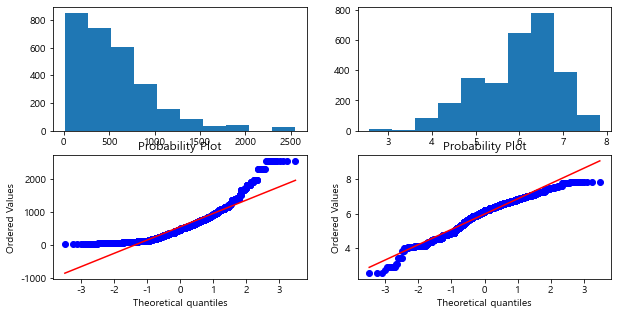

In [11]:

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
ax[0][0].hist(train['등록차량수'])
ax[0][1].hist(np.log(train['등록차량수']))

stats.probplot(train['등록차량수'], plot=ax[1][0])
stats.probplot(np.log(train['등록차량수']), plot=ax[1][1])

In [12]:
all_df = pd.concat([train, test], join='inner', ignore_index=True) #기존 인덱스 겹쳐지지 않게 만들어준다
all_df
all_df.shape

(3877, 36)

In [13]:
all_df.shape

(3877, 36)

## 결측치 처리

### 자격유형

In [14]:
all_df.isnull().sum()

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            2
임대보증금         749
임대료           749
10분내지하철수      245
10분내버스정류장수      0
단지내주차면수         0
10대미만(여자)       0
10대미만(남자)       0
10대(여자)         0
10대(남자)         0
20대(여자)         0
20대(남자)         0
30대(여자)         0
30대(남자)         0
40대(여자)         0
40대(남자)         0
50대(여자)         0
50대(남자)         0
60대(여자)         0
60대(남자)         0
70대(여자)         0
70대(남자)         0
80대(여자)         0
80대(남자)         0
90대(여자)         0
90대(남자)         0
100대(여자)        0
100대(남자)        0
dtype: int64

In [15]:
all_df.loc[all_df['자격유형'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
3259,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010
3454,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,...,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017


In [16]:
grouped = all_df.groupby(['단지코드', '임대건물구분', '지역','공급유형'])
group1 = grouped.get_group( ('C2411', '아파트', '경상남도', '국민임대')  )
group1

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
3256,C2411,962,아파트,경상남도,국민임대,39.43,56,25.0,A,11992000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
3257,C2411,962,아파트,경상남도,국민임대,39.72,336,25.0,A,11992000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
3258,C2411,962,아파트,경상남도,국민임대,39.82,179,25.0,A,11992000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
3259,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
3260,C2411,962,아파트,경상남도,국민임대,51.93,150,25.0,A,21586000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001


In [17]:
group2 = grouped.get_group( ('C2253', '아파트', '강원도', '영구임대')  )
group2

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
3454,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,...,0.088423,0.070014,0.047732,0.03276,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017
3455,C2253,1161,아파트,강원도,영구임대,31.32,239,0.0,C,3731000,...,0.088423,0.070014,0.047732,0.03276,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017
3456,C2253,1161,아파트,강원도,영구임대,31.32,149,0.0,C,3731000,...,0.088423,0.070014,0.047732,0.03276,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017


In [18]:
all_df.loc[ 3259, "자격유형"] = 'A'
all_df.loc[ 3454, "자격유형"] = 'C'

In [19]:
all_df.isnull().sum()

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            0
임대보증금         749
임대료           749
10분내지하철수      245
10분내버스정류장수      0
단지내주차면수         0
10대미만(여자)       0
10대미만(남자)       0
10대(여자)         0
10대(남자)         0
20대(여자)         0
20대(남자)         0
30대(여자)         0
30대(남자)         0
40대(여자)         0
40대(남자)         0
50대(여자)         0
50대(남자)         0
60대(여자)         0
60대(남자)         0
70대(여자)         0
70대(남자)         0
80대(여자)         0
80대(남자)         0
90대(여자)         0
90대(남자)         0
100대(여자)        0
100대(남자)        0
dtype: int64

### 임대보증금

In [20]:
print(all_df[all_df['임대보증금']=='-'].shape)
# - 값 0으로 바꾸기
all_df.loc[all_df['임대보증금']=='-','임대보증금'] = 0
print('변경후')
print(all_df[all_df['임대보증금']=='-'].shape)

(18, 36)
변경후
(0, 36)


In [21]:
#일단 Nan 0으로 처리
print(all_df['임대보증금'].isnull().sum())
all_df['임대보증금'] = all_df['임대보증금'].fillna(0)
print('변경후')
print(all_df['임대보증금'].isnull().sum())

749
변경후
0


### 임대료

In [22]:
print(all_df[all_df['임대료']=='-'].shape)
# - 값 0으로 바꾸기
all_df.loc[all_df['임대료']=='-','임대료'] = 0
print('변경후')
print(all_df[all_df['임대료']=='-'].shape)

(21, 36)
변경후
(0, 36)


In [23]:
#일단 Nan 0으로 처리
print(all_df['임대료'].isnull().sum())
all_df['임대료'] = all_df['임대료'].fillna(0)
print('변경후')
print(all_df['임대료'].isnull().sum())

749
변경후
0


In [24]:
all_df['임대료'] = all_df['임대료'].astype(int)
all_df['임대보증금'] = all_df['임대보증금'].astype(int)

In [25]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3877 entries, 0 to 3876
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   단지코드        3877 non-null   object 
 1   총세대수        3877 non-null   int64  
 2   임대건물구분      3877 non-null   object 
 3   지역          3877 non-null   object 
 4   공급유형        3877 non-null   object 
 5   전용면적        3877 non-null   float64
 6   전용면적별세대수    3877 non-null   int64  
 7   공가수         3877 non-null   float64
 8   자격유형        3877 non-null   object 
 9   임대보증금       3877 non-null   int32  
 10  임대료         3877 non-null   int32  
 11  10분내지하철수    3632 non-null   float64
 12  10분내버스정류장수  3877 non-null   float64
 13  단지내주차면수     3877 non-null   float64
 14  10대미만(여자)   3877 non-null   float64
 15  10대미만(남자)   3877 non-null   float64
 16  10대(여자)     3877 non-null   float64
 17  10대(남자)     3877 non-null   float64
 18  20대(여자)     3877 non-null   float64
 19  20대(남자)     3877 non-null  

### 10분내 지하철 수

In [26]:
#일단 Nan 0으로 처리
print(all_df['10분내지하철수'].isnull().sum())
all_df['10분내지하철수'] = all_df['10분내지하철수'].fillna(0)
print('변경후')
print(all_df['10분내지하철수'].isnull().sum())

245
변경후
0


In [27]:
# sub_tn = pd.read_csv("data/train(subway).csv")
# sub_tt = pd.read_csv("data/test(subway).csv")

In [28]:
# all_sub_df = pd.concat([sub_tn['지하철수'], sub_tt['지하철수']], join='inner', ignore_index=True) #기존 인덱스 겹쳐지지 않게 만들어준다
# all_sub_df.shape

In [29]:
# all_df['10분내지하철수'] = all_sub_df

In [30]:
# all_df.head()

In [31]:
all_df.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금         0
임대료           0
10분내지하철수      0
10분내버스정류장수    0
단지내주차면수       0
10대미만(여자)     0
10대미만(남자)     0
10대(여자)       0
10대(남자)       0
20대(여자)       0
20대(남자)       0
30대(여자)       0
30대(남자)       0
40대(여자)       0
40대(남자)       0
50대(여자)       0
50대(남자)       0
60대(여자)       0
60대(남자)       0
70대(여자)       0
70대(남자)       0
80대(여자)       0
80대(남자)       0
90대(여자)       0
90대(남자)       0
100대(여자)      0
100대(남자)      0
dtype: int64

In [32]:
all_df.corr()['10분내버스정류장수']

총세대수         -0.001356
전용면적          0.002800
전용면적별세대수      0.040957
공가수           0.038177
임대보증금         0.124743
임대료           0.084311
10분내지하철수      0.057391
10분내버스정류장수    1.000000
단지내주차면수       0.102414
10대미만(여자)     0.149232
10대미만(남자)     0.146037
10대(여자)       0.028896
10대(남자)       0.023680
20대(여자)      -0.029804
20대(남자)      -0.056424
30대(여자)       0.128756
30대(남자)       0.116142
40대(여자)       0.120484
40대(남자)       0.141870
50대(여자)      -0.063712
50대(남자)      -0.137947
60대(여자)      -0.092533
60대(남자)      -0.127703
70대(여자)      -0.091376
70대(남자)      -0.055173
80대(여자)      -0.121266
80대(남자)      -0.047644
90대(여자)      -0.073738
90대(남자)      -0.007165
100대(여자)      0.074504
100대(남자)      0.018021
Name: 10분내버스정류장수, dtype: float64

In [33]:
grouped = train.groupby(['임대건물구분', '지역'])
group1 = grouped.get_group( ('아파트', '경상남도')  )
group1

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,C2225,1206,아파트,경상남도,행복주택,26.17,120,49.0,K,51961000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
359,C2225,1206,아파트,경상남도,행복주택,26.19,16,49.0,K,51961000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
360,C2225,1206,아파트,경상남도,행복주택,36.03,290,49.0,K,72294000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
361,C2225,1206,아파트,경상남도,행복주택,36.03,60,49.0,K,72294000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001


In [34]:
grouped = train.groupby(['임대건물구분', '지역'])
group1 = grouped.get_group( ('아파트', '경상남도')  )
val = group1['10분내버스정류장수'].mean()
val

4.011278195488722

In [35]:
# 데이터 확인 후, 처리
all_df.loc[ all_df['10분내버스정류장수'].isnull(), "10분내버스정류장수"] = val

In [36]:
all_df.loc[ all_df['10분내버스정류장수'].isnull(), :]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)


In [37]:
all_df.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금         0
임대료           0
10분내지하철수      0
10분내버스정류장수    0
단지내주차면수       0
10대미만(여자)     0
10대미만(남자)     0
10대(여자)       0
10대(남자)       0
20대(여자)       0
20대(남자)       0
30대(여자)       0
30대(남자)       0
40대(여자)       0
40대(남자)       0
50대(여자)       0
50대(남자)       0
60대(여자)       0
60대(남자)       0
70대(여자)       0
70대(남자)       0
80대(여자)       0
80대(남자)       0
90대(여자)       0
90대(남자)       0
100대(여자)      0
100대(남자)      0
dtype: int64

In [38]:
all_df.shape

(3877, 36)

# 라벨인코딩

In [39]:
mapping = { 'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 
            'F':6, 'G':7, 'H':8, 'I':9, 'J':10, 
            'K':11, 'L':12, 'M':13, 'N':14, 'O':15  }

all_df['자격유형'] =all_df['자격유형'].map(mapping).astype(int)

In [40]:
all_df.head(100)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,1,9216000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,1,12672000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,1,12672000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,1,18433000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,1,18433000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,C1790,657,상가,경상남도,임대상가,248.56,1,2.0,4,0,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
96,C2109,495,아파트,경상남도,영구임대,26.34,288,2.0,3,3138000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
97,C2109,495,아파트,경상남도,영구임대,30.48,192,2.0,3,3631000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
98,C2109,495,상가,경상남도,임대상가,31.84,1,2.0,4,0,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001


In [41]:
gubun1 = {'아파트':1, '상가':2}
gubun2 = {'경상남도':1, '대전광역시':2, '경기도':3, '전라북도':4, 
          '강원도':5, '광주광역시':6, '충청남도':7, '부산광역시':8, 
          '제주특별자치도':9, '울산광역시':10, '충청북도':11, '전라남도':12, 
          '경상북도':13, '대구광역시':14, '서울특별시':15, '세종특별자치시':16}

gubun3 = {'국민임대':1, '공공임대(50년)':2, '영구임대':3, '임대상가':4, 
          '공공임대(10년)':5, '공공임대(분납)':6, '장기전세':7, '공공분양':8, 
          '행복주택':9, '공공임대(5년)':10}

all_df['임대건물구분_lbl'] = all_df['임대건물구분'].map(gubun1)
all_df['지역_lbl'] = all_df['지역'].map(gubun2)
all_df['공급유형_lbl'] = all_df['공급유형'].map(gubun3)

all_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자),임대건물구분_lbl,지역_lbl,공급유형_lbl
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,1,9216000,...,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,1,1,1
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,1,12672000,...,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,1,1,1
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,1,12672000,...,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,1,1,1
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,1,18433000,...,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,1,1,1
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,1,18433000,...,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3872,C1229,453,아파트,세종특별자치시,행복주택,38.20,68,23.0,10,30101000,...,0.026223,0.013893,0.007086,0.003459,0.001004,0.000279,0.000112,1,16,9
3873,C1229,453,아파트,세종특별자치시,행복주택,38.20,8,23.0,10,30101000,...,0.026223,0.013893,0.007086,0.003459,0.001004,0.000279,0.000112,1,16,9
3874,C1229,453,아파트,세종특별자치시,행복주택,38.25,3,23.0,10,30101000,...,0.026223,0.013893,0.007086,0.003459,0.001004,0.000279,0.000112,1,16,9
3875,C1229,453,아파트,세종특별자치시,행복주택,38.28,4,23.0,10,30101000,...,0.026223,0.013893,0.007086,0.003459,0.001004,0.000279,0.000112,1,16,9


In [42]:
all_df['단지코드'] = all_df['단지코드'].astype("category")
all_df['단지코드_lbl'] = all_df['단지코드'].cat.codes # category가 code로 변환된다.

### 전용면적을 구간화하기
all_df['전용면적별세대수'] = all_df['전용면적별세대수'].astype('float32')

# 전용면적, 공가수, 단지내주차면수
all_df['qcut_총세대수'] = pd.qcut(all_df['총세대수'], 5, labels=False) # 구간을 나눠서 보겠다. (총 세대수에 대해서 구간 분할 해 주기)
all_df.head(10)
all_df['qcut_총세대수'].unique()

array([1, 0, 3, 2, 4], dtype=int64)

# 전용면적별 세대의 합계와 총세대수가 일치하지 않는 오류
* 차이가 14세대 이하인 48개 단지 - ['C1925', 'C1312', 'C2013', 'C1424', 'C2520', 'C2319', 'C1850', 'C1068', 'C2644', 'C2156', C2453', 'C1910', 'C2139', 'C2508', 'C1695', 'C2556', 'C2362', 'C2568', 'C2245', 'C2549', 'C1584', 'C2298', 'C2225', 'C1218', 'C1970', C1732', 'C2433', 'C1894', 'C1156', 'C2142', 'C2186', 'C2411', 'C1812', 'C1030', 'C1749', 'C1349', 'C2043', 'C1229', 'C2363', 'C1414', C2174', 'C2404', 'C1683', 'C1038', 'C2456', 'C1266', 'C1267', 'C2189']
* 차이가 94~452세대인 10개 단지(크기순) - ['C1490', 'C2497', 'C2620', 'C1344', 'C1024', 'C2470', 'C1206', 'C1740', 'C2405', 'C1804’]

#### 차이가 14세대 이하인 48개 단지 : 단지코드_Type =1

In [43]:
group1 = ['C1925', 'C1312', 'C2013', 'C1424', 'C2520', 'C2319', 'C1850', 'C1068', 'C2644', 'C2156', 
          'C2453', 'C1910', 'C2139', 'C2508', 'C1695', 'C2556', 'C2362', 'C2568', 'C2245', 'C2549', 
          'C1584', 'C2298', 'C2225', 'C1218', 'C1970', 'C1732', 'C2433', 'C1894', 'C1156', 'C2142', 
          'C2186', 'C2411', 'C1812', 'C1030', 'C1749', 'C1349', 'C2043', 'C1229', 'C2363', 'C1414', 
          'C2174', 'C2404', 'C1683', 'C1038', 'C2456', 'C1266', 'C1267', 'C2189' ]

for one1 in group1:
    all_df.loc[ all_df['단지코드'] == one1, "단지코드_Type" ] = 1

In [44]:
all_df['단지코드_Type'].unique()

array([nan,  1.])

#### 차이가 94~452세대인 10개단지 처리하기 :  단지코드_Type =2

In [45]:
group2 = ['C1490', 'C2497', 'C2620', 'C1344', 'C1024', 'C2470', 'C1206', 'C1740', 'C2405', 'C1804']
for one2 in group2:
        all_df.loc[all_df['단지코드'] == one2, "단지코드_Type"] = 2

#### 그외 :  단지코드_Type =3

In [46]:
all_df.loc[  all_df['단지코드_Type'].isna(), "단지코드_Type"] = 3
all_df['단지코드_Type'].unique()

array([3., 1., 2.])

### 변수 추가

In [47]:
all_df['환산보증금'] = all_df['임대보증금'].astype(int)+(all_df['임대료'].astype(int)+100)
all_df['환산보증금']

0        9299040
1       12779230
2       12779230
3       18582860
4       18582860
          ...   
3872    30221500
3873    30221500
3874    30221500
3875    30221500
3876    34119030
Name: 환산보증금, Length: 3877, dtype: int32

In [48]:
all_df['주차면수대비총세대수비율'] = all_df['총세대수']/all_df['단지내주차면수']
all_df['거주율'] =1 - (all_df['공가수']/all_df['총세대수'])

((array([-3.56959256, -3.33019321, -3.19803567, ...,  3.19803567,
          3.33019321,  3.56959256]),
  array([2.63905733, 2.63905733, 2.63905733, ..., 7.49498623, 7.49498623,
         7.49498623])),
 (0.7344105105721078, 6.126121425642588, 0.9868157045962277))

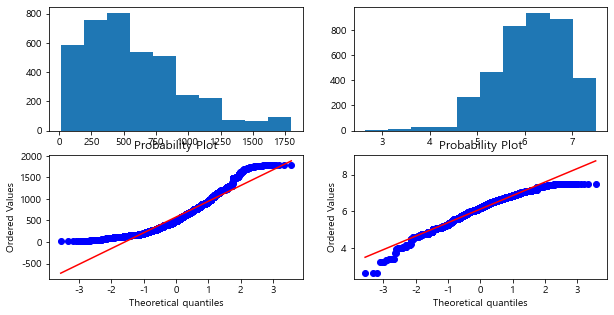

In [49]:
all_df['log_단지내주차면수'] = np.log1p(all_df['단지내주차면수'])
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
ax[0][0].hist(all_df['단지내주차면수'])
ax[0][1].hist(all_df['log_단지내주차면수'])

stats.probplot(all_df['단지내주차면수'], plot=ax[1][0])
stats.probplot(all_df['log_단지내주차면수'], plot=ax[1][1])

((array([-3.56959256, -3.33019321, -3.19803567, ...,  3.19803567,
          3.33019321,  3.56959256]),
  array([3.29583687, 3.29583687, 3.29583687, ..., 7.85282781, 7.85282781,
         7.85282781])),
 (0.6093767949475518, 6.611311889490474, 0.9883341683848889))

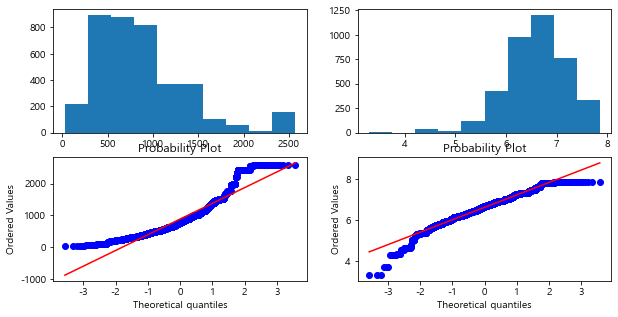

In [50]:
all_df['log_총세대수'] = np.log1p(all_df['총세대수'])
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
ax[0][0].hist(all_df['총세대수'])
ax[0][1].hist(all_df['log_총세대수'])

stats.probplot(all_df['총세대수'], plot=ax[1][0])
stats.probplot(all_df['log_총세대수'], plot=ax[1][1])

((array([-3.56959256, -3.33019321, -3.19803567, ...,  3.19803567,
          3.33019321,  3.56959256]),
  array([0.6931472, 0.6931472, 0.6931472, ..., 7.293698 , 7.3072023,
         7.5315523], dtype=float32)),
 (1.6307518283269595, 3.662091016769409, 0.9441208816516677))

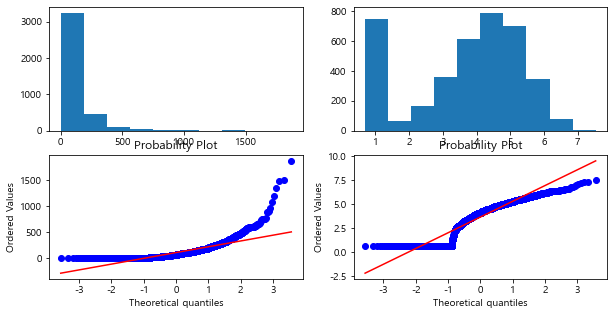

In [51]:
all_df['log_전용면적별세대수'] = np.log1p(all_df['전용면적별세대수'])
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
ax[0][0].hist(all_df['전용면적별세대수'])
ax[0][1].hist(all_df['log_전용면적별세대수'])

stats.probplot(all_df['전용면적별세대수'], plot=ax[1][0])
stats.probplot(all_df['log_전용면적별세대수'], plot=ax[1][1])

(array([172., 260., 329., 272., 176., 579., 609., 774., 585., 121.]),
 array([0.        , 0.40253517, 0.80507034, 1.20760551, 1.61014068,
        2.01267585, 2.41521101, 2.81774618, 3.22028135, 3.62281652,
        4.02535169]),
 <BarContainer object of 10 artists>)

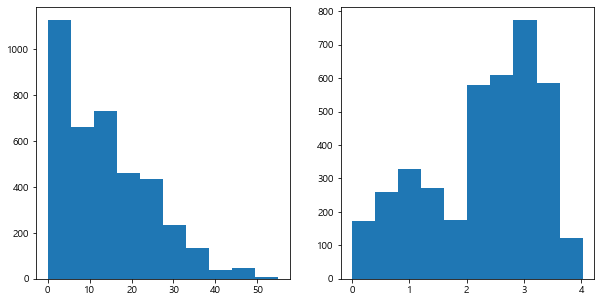

In [52]:
all_df['log_공가수'] = np.log1p(all_df['공가수'])
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].hist(all_df['공가수'])
ax[1].hist(all_df['log_공가수'])

In [53]:
all_df_last = all_df.drop(['임대건물구분', '지역', '공급유형'] , axis=1)
all_df_last

,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,...,단지코드_lbl,qcut_총세대수,단지코드_Type,환산보증금,주차면수대비총세대수비율,거주율,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수
0,C2515,545,33.48,276.0,17.0,1,9216000,82940,0.0,3.0,...,492,1,3.0,9299040,0.873397,0.968807,6.437752,6.302619,5.624018,2.890372
1,C2515,545,39.60,60.0,17.0,1,12672000,107130,0.0,3.0,...,492,1,3.0,12779230,0.873397,0.968807,6.437752,6.302619,4.110874,2.890372
2,C2515,545,39.60,20.0,17.0,1,12672000,107130,0.0,3.0,...,492,1,3.0,12779230,0.873397,0.968807,6.437752,6.302619,3.044523,2.890372
3,C2515,545,46.90,38.0,17.0,1,18433000,149760,0.0,3.0,...,492,1,3.0,18582860,0.873397,0.968807,6.437752,6.302619,3.663562,2.890372
4,C2515,545,46.90,19.0,17.0,1,18433000,149760,0.0,3.0,...,492,1,3.0,18582860,0.873397,0.968807,6.437752,6.302619,2.995732,2.890372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3872,C1229,453,38.20,68.0,23.0,10,30101000,120400,0.0,2.0,...,76,0,1.0,30221500,1.429022,0.949227,5.762051,6.118097,4.234107,3.178054
3873,C1229,453,38.20,8.0,23.0,10,30101000,120400,0.0,2.0,...,76,0,1.0,30221500,1.429022,0.949227,5.762051,6.118097,2.197225,3.178054
3874,C1229,453,38.25,3.0,23.0,10,30101000,120400,0.0,2.0,...,76,0,1.0,30221500,1.429022,0.949227,5.762051,6.118097,1.386294,3.178054
3875,C1229,453,38.28,4.0,23.0,10,30101000,120400,0.0,2.0,...,76,0,1.0,30221500,1.429022,0.949227,5.762051,6.118097,1.609438,3.178054


In [54]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3877 entries, 0 to 3876
Data columns (total 49 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   단지코드          3877 non-null   category
 1   총세대수          3877 non-null   int64   
 2   임대건물구분        3877 non-null   object  
 3   지역            3877 non-null   object  
 4   공급유형          3877 non-null   object  
 5   전용면적          3877 non-null   float64 
 6   전용면적별세대수      3877 non-null   float32 
 7   공가수           3877 non-null   float64 
 8   자격유형          3877 non-null   int32   
 9   임대보증금         3877 non-null   int32   
 10  임대료           3877 non-null   int32   
 11  10분내지하철수      3877 non-null   float64 
 12  10분내버스정류장수    3877 non-null   float64 
 13  단지내주차면수       3877 non-null   float64 
 14  10대미만(여자)     3877 non-null   float64 
 15  10대미만(남자)     3877 non-null   float64 
 16  10대(여자)       3877 non-null   float64 
 17  10대(남자)       3877 non-null   float64 
 18  20대(여자) 

In [55]:
# '총세대수' : 0.333440, '단지내주차면수' : 0.861338, 임대건물구분_lbl : -0.449130
# 전용면적    0.112717, 전용면적별세대수   0.250513, 공가수           0.118910,
# 자격유형         -0.154034, 공급유형_lbl     -0.137277

In [56]:
train.corr()['등록차량수']

총세대수          0.326923
전용면적          0.106366
전용면적별세대수      0.254948
공가수           0.130775
10분내지하철수     -0.101792
10분내버스정류장수    0.110977
단지내주차면수       0.856549
등록차량수         1.000000
10대미만(여자)     0.268142
10대미만(남자)     0.274423
10대(여자)       0.017406
10대(남자)      -0.013654
20대(여자)       0.008058
20대(남자)      -0.138710
30대(여자)       0.384424
30대(남자)       0.369807
40대(여자)       0.186006
40대(남자)       0.320559
50대(여자)      -0.236608
50대(남자)      -0.266656
60대(여자)      -0.191946
60대(남자)      -0.243727
70대(여자)      -0.190950
70대(남자)      -0.147894
80대(여자)      -0.224072
80대(남자)      -0.151342
90대(여자)      -0.180396
90대(남자)      -0.054103
100대(여자)      0.134927
100대(남자)      0.006264
Name: 등록차량수, dtype: float64

(array([3.245e+03, 4.700e+02, 1.060e+02, 4.500e+01, 4.000e+00, 2.000e+00,
        1.000e+00, 3.000e+00, 0.000e+00, 1.000e+00]),
 array([1.0000e+00, 1.8740e+02, 3.7380e+02, 5.6020e+02, 7.4660e+02,
        9.3300e+02, 1.1194e+03, 1.3058e+03, 1.4922e+03, 1.6786e+03,
        1.8650e+03], dtype=float32),
 <BarContainer object of 10 artists>)

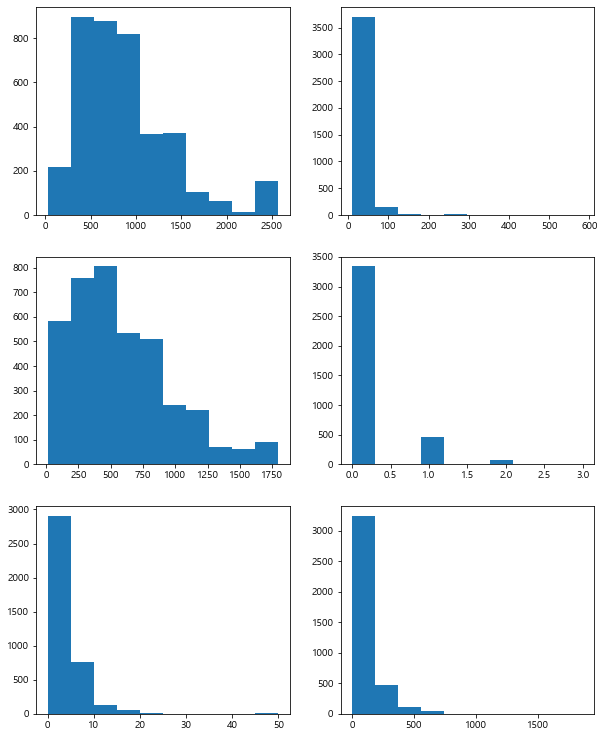

In [57]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,13))

ax[0][0].hist(all_df_last['총세대수'])
ax[0][1].hist(all_df_last['전용면적'])
ax[1][0].hist(all_df_last['단지내주차면수'])
ax[1][1].hist(all_df_last['10분내지하철수'])
ax[2][0].hist(all_df_last['10분내버스정류장수'])
ax[2][1].hist(all_df_last['전용면적별세대수'])

# 원핫 인코딩

In [58]:
# print("dummy 수행 전 shape",all_df_last.shape)
# all_df_last_oh = pd.get_dummies(all_df_last)
# print("dummy 수행 후 shape",all_df_last_oh.shape)

In [59]:
train_df = all_df_last.iloc[0:2869,:]
test_df = all_df_last.iloc[2869:,:]

train_df.shape, test_df.shape

train_df = pd.concat([train_df, train['등록차량수'] ], axis=1)
train_df

,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,...,qcut_총세대수,단지코드_Type,환산보증금,주차면수대비총세대수비율,거주율,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수,등록차량수
0,C2515,545,33.48,276.0,17.0,1,9216000,82940,0.0,3.0,...,1,3.0,9299040,0.873397,0.968807,6.437752,6.302619,5.624018,2.890372,205.0
1,C2515,545,39.60,60.0,17.0,1,12672000,107130,0.0,3.0,...,1,3.0,12779230,0.873397,0.968807,6.437752,6.302619,4.110874,2.890372,205.0
2,C2515,545,39.60,20.0,17.0,1,12672000,107130,0.0,3.0,...,1,3.0,12779230,0.873397,0.968807,6.437752,6.302619,3.044523,2.890372,205.0
3,C2515,545,46.90,38.0,17.0,1,18433000,149760,0.0,3.0,...,1,3.0,18582860,0.873397,0.968807,6.437752,6.302619,3.663562,2.890372,205.0
4,C2515,545,46.90,19.0,17.0,1,18433000,149760,0.0,3.0,...,1,3.0,18582860,0.873397,0.968807,6.437752,6.302619,2.995732,2.890372,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864,C2086,1080,59.94,30.0,7.0,1,39000000,460000,0.0,2.0,...,3,3.0,39460100,0.945709,0.993519,7.041412,6.985642,3.433987,2.079442,1524.0
2865,C2086,1080,74.92,156.0,7.0,1,49000000,550000,0.0,2.0,...,3,3.0,49550100,0.945709,0.993519,7.041412,6.985642,5.056246,2.079442,1524.0
2866,C2086,1080,74.93,78.0,7.0,1,49000000,550000,0.0,2.0,...,3,3.0,49550100,0.945709,0.993519,7.041412,6.985642,4.369448,2.079442,1524.0
2867,C2086,1080,84.88,160.0,7.0,1,61000000,600000,0.0,2.0,...,3,3.0,61600100,0.945709,0.993519,7.041412,6.985642,5.081404,2.079442,1524.0


In [60]:
train_df['log_등록차량수'] = np.log1p(train_df['등록차량수'])

In [61]:
from sklearn.model_selection import train_test_split

print("등록차량수 상관계수 : ", train_df.corr()['등록차량수'])
print()
print("log_등록차량수 상관계수 ; ", train_df.corr()['log_등록차량수'])

등록차량수 상관계수 :  총세대수            0.326923
전용면적            0.106366
전용면적별세대수        0.254948
공가수             0.130775
자격유형           -0.145695
임대보증금           0.412956
임대료             0.530381
10분내지하철수       -0.079587
10분내버스정류장수      0.110977
단지내주차면수         0.856549
10대미만(여자)       0.268142
10대미만(남자)       0.274423
10대(여자)         0.017406
10대(남자)        -0.013654
20대(여자)         0.008058
20대(남자)        -0.138710
30대(여자)         0.384424
30대(남자)         0.369807
40대(여자)         0.186006
40대(남자)         0.320559
50대(여자)        -0.236608
50대(남자)        -0.266656
60대(여자)        -0.191946
60대(남자)        -0.243727
70대(여자)        -0.190950
70대(남자)        -0.147894
80대(여자)        -0.224072
80대(남자)        -0.151342
90대(여자)        -0.180396
90대(남자)        -0.054103
100대(여자)        0.134927
100대(남자)        0.006264
임대건물구분_lbl     -0.449235
지역_lbl          0.044321
공급유형_lbl       -0.158484
단지코드_lbl       -0.097279
qcut_총세대수       0.391915
단지코드_Type       0.106931
환산보증금           0.414723
주차면수대비총세대수비

In [62]:
pd.set_option('display.min_rows',10)

In [63]:
train_df.head(30)

,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,...,단지코드_Type,환산보증금,주차면수대비총세대수비율,거주율,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수,등록차량수,log_등록차량수
0,C2515,545,33.48,276.0,17.0,1,9216000,82940,0.0,3.0,...,3.0,9299040,0.873397,0.968807,6.437752,6.302619,5.624018,2.890372,205.0,5.327876
1,C2515,545,39.60,60.0,17.0,1,12672000,107130,0.0,3.0,...,3.0,12779230,0.873397,0.968807,6.437752,6.302619,4.110874,2.890372,205.0,5.327876
2,C2515,545,39.60,20.0,17.0,1,12672000,107130,0.0,3.0,...,3.0,12779230,0.873397,0.968807,6.437752,6.302619,3.044523,2.890372,205.0,5.327876
3,C2515,545,46.90,38.0,17.0,1,18433000,149760,0.0,3.0,...,3.0,18582860,0.873397,0.968807,6.437752,6.302619,3.663562,2.890372,205.0,5.327876
4,C2515,545,46.90,19.0,17.0,1,18433000,149760,0.0,3.0,...,3.0,18582860,0.873397,0.968807,6.437752,6.302619,2.995732,2.890372,205.0,5.327876
5,C2515,545,51.97,106.0,17.0,1,23042000,190090,0.0,3.0,...,3.0,23232190,0.873397,0.968807,6.437752,6.302619,4.672829,2.890372,205.0,5.327876
6,C2515,545,51.97,26.0,17.0,1,23042000,190090,0.0,3.0,...,3.0,23232190,0.873397,0.968807,6.437752,6.302619,3.295837,2.890372,205.0,5.327876
7,C2576,405,46.90,313.0,19.0,1,19436000,161780,0.0,4.0,...,3.0,19597880,1.368243,0.953086,5.693732,6.006353,5.749393,2.995732,73.0,4.304065
8,C2576,405,59.88,92.0,19.0,1,28252000,235420,0.0,4.0,...,3.0,28487520,1.368243,0.953086,5.693732,6.006353,4.532599,2.995732,73.0,4.304065
9,C2416,560,26.34,360.0,0.0,3,3138000,69820,0.0,5.0,...,3.0,3207920,3.636364,1.000000,5.043425,6.329721,5.888878,0.000000,63.0,4.158883


In [64]:
train_df.shape

(2869, 48)

In [65]:
train_df.isnull().sum()

단지코드            0
총세대수            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            0
임대보증금           0
임대료             0
10분내지하철수        0
10분내버스정류장수      0
단지내주차면수         0
10대미만(여자)       0
10대미만(남자)       0
10대(여자)         0
10대(남자)         0
20대(여자)         0
20대(남자)         0
30대(여자)         0
30대(남자)         0
40대(여자)         0
40대(남자)         0
50대(여자)         0
50대(남자)         0
60대(여자)         0
60대(남자)         0
70대(여자)         0
70대(남자)         0
80대(여자)         0
80대(남자)         0
90대(여자)         0
90대(남자)         0
100대(여자)        0
100대(남자)        0
임대건물구분_lbl      0
지역_lbl          0
공급유형_lbl        0
단지코드_lbl        0
qcut_총세대수       0
단지코드_Type       0
환산보증금           0
주차면수대비총세대수비율    0
거주율             0
log_단지내주차면수     0
log_총세대수        0
log_전용면적별세대수    0
log_공가수         0
등록차량수           0
log_등록차량수       0
dtype: int64

In [66]:
train_df.columns

Index(['단지코드', '총세대수', '전용면적', '전용면적별세대수', '공가수', '자격유형', '임대보증금', '임대료',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
       '10대(여자)', '10대(남자)', '20대(여자)', '20대(남자)', '30대(여자)', '30대(남자)',
       '40대(여자)', '40대(남자)', '50대(여자)', '50대(남자)', '60대(여자)', '60대(남자)',
       '70대(여자)', '70대(남자)', '80대(여자)', '80대(남자)', '90대(여자)', '90대(남자)',
       '100대(여자)', '100대(남자)', '임대건물구분_lbl', '지역_lbl', '공급유형_lbl', '단지코드_lbl',
       'qcut_총세대수', '단지코드_Type', '환산보증금', '주차면수대비총세대수비율', '거주율', 'log_단지내주차면수',
       'log_총세대수', 'log_전용면적별세대수', 'log_공가수', '등록차량수', 'log_등록차량수'],
      dtype='object')

In [67]:
# sel = ['log_총세대수', '전용면적', '공가수', 'log_단지내주차면수',
#        'qcut_총세대수', '자격유형', '전용면적별세대수', '10분내버스정류장수',
#        '임대건물구분_lbl', '공급유형_lbl', '지역_lbl', '단지코드_lbl',
#        '단지코드_Type']
# sel = [ '총세대수', '전용면적', '전용면적별세대수', '공가수', '자격유형',
#        '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
#        '10대(여자)', '10대(남자)', '20대(여자)', '20대(남자)', '30대(여자)', '30대(남자)',
#        '40대(여자)', '40대(남자)', '50대(여자)', '50대(남자)', '60대(여자)', '60대(남자)',
#        '70대(여자)', '70대(남자)', '80대(여자)', '80대(남자)', '90대(여자)', '90대(남자)',
#        '100대(여자)', '100대(남자)', '임대건물구분_lbl', '지역_lbl', '공급유형_lbl', '단지코드_lbl',
#        'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
#        'log_전용면적별세대수', 'log_공가수']
# sel = [ '총세대수', '전용면적', '전용면적별세대수', '공가수', '자격유형',
#        '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
#       '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
#        'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
#        'log_전용면적별세대수', 'log_공가수']
# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
#        '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
#       '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
#        'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
#        'log_전용면적별세대수', '주차면수대비총세대수비율','거주율']
# lable_name = 'log_등록차량수'
sel = [ '총세대수', '전용면적', '공가수', '자격유형',
   '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
  '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl',
    '단지코드_Type']
lable_name = 'log_등록차량수'
X = train_df[sel]
y = train_df[lable_name]
test_X = test_df[sel]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

# 회귀 트리 모델 학습/예측/평가

In [68]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score #교차검증
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import mean_squared_error

In [69]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import mean_absolute_error
def get_mae_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mae = mean_absolute_error(y_test , pred_value)
        print('{0} 모델의 MAE: {1}'.format(key, mae))

xgb_reg = XGBRegressor(n_estimators=20000, learning_rate=0.01, 
                       colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=20000, learning_rate=0.01, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
catm_reg = CatBoostRegressor(n_estimators=20000, learning_rate=0.01 ,random_state= 0,verbose= 1,objective = "MAE")

xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
catm_reg.fit(X_train, y_train)

xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)
catm_pred = catm_reg.predict(X_test)


pred = 0.3 * xgb_pred + 0.3 * lgbm_pred + 0.4 * catm_pred
preds = {'최종 혼합': pred,
         'XGBM': xgb_pred,
         'LGBM': lgbm_pred,
          'CATM' : catm_pred}
  
get_mae_pred(preds)

0:	learn: 0.7020770	total: 155ms	remaining: 51m 31s
1:	learn: 0.6967992	total: 174ms	remaining: 29m 3s
2:	learn: 0.6908185	total: 185ms	remaining: 20m 33s
3:	learn: 0.6852919	total: 195ms	remaining: 16m 15s
4:	learn: 0.6801233	total: 206ms	remaining: 13m 43s
5:	learn: 0.6749369	total: 216ms	remaining: 12m 1s
6:	learn: 0.6703010	total: 227ms	remaining: 10m 47s
7:	learn: 0.6649079	total: 237ms	remaining: 9m 52s
8:	learn: 0.6597326	total: 247ms	remaining: 9m 9s
9:	learn: 0.6541888	total: 259ms	remaining: 8m 37s
10:	learn: 0.6494954	total: 269ms	remaining: 8m 9s
11:	learn: 0.6445206	total: 279ms	remaining: 7m 45s
12:	learn: 0.6398649	total: 290ms	remaining: 7m 26s
13:	learn: 0.6348457	total: 302ms	remaining: 7m 11s
14:	learn: 0.6296375	total: 313ms	remaining: 6m 56s
15:	learn: 0.6252066	total: 323ms	remaining: 6m 43s
16:	learn: 0.6202077	total: 334ms	remaining: 6m 32s
17:	learn: 0.6154706	total: 344ms	remaining: 6m 21s
18:	learn: 0.6104136	total: 354ms	remaining: 6m 12s
19:	learn: 0.606112

170:	learn: 0.2620586	total: 1.97s	remaining: 3m 48s
171:	learn: 0.2611306	total: 1.98s	remaining: 3m 48s
172:	learn: 0.2603035	total: 1.99s	remaining: 3m 48s
173:	learn: 0.2592883	total: 2s	remaining: 3m 48s
174:	learn: 0.2582113	total: 2.01s	remaining: 3m 48s
175:	learn: 0.2572986	total: 2.02s	remaining: 3m 47s
176:	learn: 0.2565255	total: 2.03s	remaining: 3m 47s
177:	learn: 0.2556181	total: 2.04s	remaining: 3m 47s
178:	learn: 0.2546041	total: 2.05s	remaining: 3m 47s
179:	learn: 0.2537594	total: 2.06s	remaining: 3m 47s
180:	learn: 0.2531324	total: 2.08s	remaining: 3m 47s
181:	learn: 0.2521879	total: 2.09s	remaining: 3m 47s
182:	learn: 0.2514909	total: 2.1s	remaining: 3m 47s
183:	learn: 0.2506973	total: 2.11s	remaining: 3m 47s
184:	learn: 0.2499604	total: 2.12s	remaining: 3m 46s
185:	learn: 0.2492361	total: 2.13s	remaining: 3m 46s
186:	learn: 0.2483378	total: 2.14s	remaining: 3m 46s
187:	learn: 0.2475405	total: 2.15s	remaining: 3m 46s
188:	learn: 0.2466714	total: 2.16s	remaining: 3m 4

330:	learn: 0.1787110	total: 3.63s	remaining: 3m 35s
331:	learn: 0.1784494	total: 3.65s	remaining: 3m 36s
332:	learn: 0.1781807	total: 3.69s	remaining: 3m 38s
333:	learn: 0.1779404	total: 3.72s	remaining: 3m 38s
334:	learn: 0.1776588	total: 3.76s	remaining: 3m 40s
335:	learn: 0.1773978	total: 3.78s	remaining: 3m 41s
336:	learn: 0.1770563	total: 3.79s	remaining: 3m 40s
337:	learn: 0.1767891	total: 3.8s	remaining: 3m 41s
338:	learn: 0.1765167	total: 3.82s	remaining: 3m 41s
339:	learn: 0.1762345	total: 3.83s	remaining: 3m 41s
340:	learn: 0.1759561	total: 3.85s	remaining: 3m 42s
341:	learn: 0.1757090	total: 3.86s	remaining: 3m 42s
342:	learn: 0.1755569	total: 3.88s	remaining: 3m 42s
343:	learn: 0.1752940	total: 3.89s	remaining: 3m 42s
344:	learn: 0.1750347	total: 3.9s	remaining: 3m 42s
345:	learn: 0.1748088	total: 3.91s	remaining: 3m 42s
346:	learn: 0.1746240	total: 3.92s	remaining: 3m 42s
347:	learn: 0.1743962	total: 3.94s	remaining: 3m 42s
348:	learn: 0.1741925	total: 3.95s	remaining: 3m

499:	learn: 0.1488694	total: 5.62s	remaining: 3m 39s
500:	learn: 0.1487712	total: 5.63s	remaining: 3m 39s
501:	learn: 0.1486795	total: 5.64s	remaining: 3m 39s
502:	learn: 0.1485799	total: 5.65s	remaining: 3m 39s
503:	learn: 0.1484560	total: 5.66s	remaining: 3m 39s
504:	learn: 0.1482991	total: 5.67s	remaining: 3m 39s
505:	learn: 0.1482013	total: 5.68s	remaining: 3m 38s
506:	learn: 0.1480790	total: 5.69s	remaining: 3m 38s
507:	learn: 0.1479746	total: 5.71s	remaining: 3m 38s
508:	learn: 0.1478672	total: 5.72s	remaining: 3m 38s
509:	learn: 0.1477546	total: 5.73s	remaining: 3m 38s
510:	learn: 0.1476474	total: 5.74s	remaining: 3m 38s
511:	learn: 0.1475144	total: 5.75s	remaining: 3m 38s
512:	learn: 0.1474268	total: 5.76s	remaining: 3m 38s
513:	learn: 0.1473342	total: 5.77s	remaining: 3m 38s
514:	learn: 0.1472451	total: 5.78s	remaining: 3m 38s
515:	learn: 0.1470387	total: 5.79s	remaining: 3m 38s
516:	learn: 0.1468730	total: 5.8s	remaining: 3m 38s
517:	learn: 0.1467201	total: 5.82s	remaining: 3

656:	learn: 0.1337890	total: 7.27s	remaining: 3m 34s
657:	learn: 0.1336911	total: 7.28s	remaining: 3m 34s
658:	learn: 0.1336427	total: 7.29s	remaining: 3m 34s
659:	learn: 0.1335209	total: 7.3s	remaining: 3m 34s
660:	learn: 0.1334667	total: 7.31s	remaining: 3m 33s
661:	learn: 0.1333963	total: 7.32s	remaining: 3m 33s
662:	learn: 0.1333166	total: 7.33s	remaining: 3m 33s
663:	learn: 0.1332754	total: 7.35s	remaining: 3m 33s
664:	learn: 0.1331904	total: 7.36s	remaining: 3m 33s
665:	learn: 0.1330537	total: 7.37s	remaining: 3m 33s
666:	learn: 0.1329683	total: 7.38s	remaining: 3m 33s
667:	learn: 0.1328847	total: 7.39s	remaining: 3m 33s
668:	learn: 0.1328197	total: 7.4s	remaining: 3m 33s
669:	learn: 0.1326836	total: 7.41s	remaining: 3m 33s
670:	learn: 0.1326256	total: 7.42s	remaining: 3m 33s
671:	learn: 0.1325829	total: 7.43s	remaining: 3m 33s
672:	learn: 0.1325312	total: 7.44s	remaining: 3m 33s
673:	learn: 0.1324830	total: 7.45s	remaining: 3m 33s
674:	learn: 0.1324196	total: 7.46s	remaining: 3m

813:	learn: 0.1238498	total: 9.1s	remaining: 3m 34s
814:	learn: 0.1237973	total: 9.11s	remaining: 3m 34s
815:	learn: 0.1237647	total: 9.12s	remaining: 3m 34s
816:	learn: 0.1237111	total: 9.13s	remaining: 3m 34s
817:	learn: 0.1236533	total: 9.14s	remaining: 3m 34s
818:	learn: 0.1236278	total: 9.14s	remaining: 3m 34s
819:	learn: 0.1235966	total: 9.15s	remaining: 3m 34s
820:	learn: 0.1235728	total: 9.17s	remaining: 3m 34s
821:	learn: 0.1235383	total: 9.18s	remaining: 3m 34s
822:	learn: 0.1235065	total: 9.19s	remaining: 3m 34s
823:	learn: 0.1234765	total: 9.2s	remaining: 3m 34s
824:	learn: 0.1234019	total: 9.21s	remaining: 3m 34s
825:	learn: 0.1233624	total: 9.22s	remaining: 3m 33s
826:	learn: 0.1233205	total: 9.23s	remaining: 3m 33s
827:	learn: 0.1232305	total: 9.24s	remaining: 3m 33s
828:	learn: 0.1232010	total: 9.25s	remaining: 3m 33s
829:	learn: 0.1231491	total: 9.26s	remaining: 3m 33s
830:	learn: 0.1230632	total: 9.27s	remaining: 3m 33s
831:	learn: 0.1229797	total: 9.28s	remaining: 3m

983:	learn: 0.1149648	total: 10.9s	remaining: 3m 30s
984:	learn: 0.1149441	total: 10.9s	remaining: 3m 30s
985:	learn: 0.1149026	total: 10.9s	remaining: 3m 30s
986:	learn: 0.1148813	total: 10.9s	remaining: 3m 30s
987:	learn: 0.1148433	total: 10.9s	remaining: 3m 30s
988:	learn: 0.1147540	total: 11s	remaining: 3m 30s
989:	learn: 0.1146247	total: 11s	remaining: 3m 30s
990:	learn: 0.1145834	total: 11s	remaining: 3m 30s
991:	learn: 0.1145598	total: 11s	remaining: 3m 30s
992:	learn: 0.1145311	total: 11s	remaining: 3m 30s
993:	learn: 0.1145054	total: 11s	remaining: 3m 30s
994:	learn: 0.1144854	total: 11s	remaining: 3m 30s
995:	learn: 0.1144522	total: 11s	remaining: 3m 30s
996:	learn: 0.1143672	total: 11s	remaining: 3m 30s
997:	learn: 0.1143322	total: 11.1s	remaining: 3m 30s
998:	learn: 0.1142959	total: 11.1s	remaining: 3m 30s
999:	learn: 0.1142470	total: 11.1s	remaining: 3m 30s
1000:	learn: 0.1142215	total: 11.1s	remaining: 3m 30s
1001:	learn: 0.1141257	total: 11.1s	remaining: 3m 30s
1002:	lea

1139:	learn: 0.1074701	total: 12.5s	remaining: 3m 27s
1140:	learn: 0.1074350	total: 12.5s	remaining: 3m 27s
1141:	learn: 0.1074137	total: 12.6s	remaining: 3m 27s
1142:	learn: 0.1073626	total: 12.6s	remaining: 3m 27s
1143:	learn: 0.1072849	total: 12.6s	remaining: 3m 27s
1144:	learn: 0.1072697	total: 12.6s	remaining: 3m 27s
1145:	learn: 0.1072413	total: 12.6s	remaining: 3m 27s
1146:	learn: 0.1072117	total: 12.6s	remaining: 3m 27s
1147:	learn: 0.1071679	total: 12.6s	remaining: 3m 27s
1148:	learn: 0.1071336	total: 12.6s	remaining: 3m 27s
1149:	learn: 0.1070905	total: 12.6s	remaining: 3m 27s
1150:	learn: 0.1070627	total: 12.7s	remaining: 3m 27s
1151:	learn: 0.1069706	total: 12.7s	remaining: 3m 27s
1152:	learn: 0.1069596	total: 12.7s	remaining: 3m 27s
1153:	learn: 0.1069284	total: 12.7s	remaining: 3m 27s
1154:	learn: 0.1068037	total: 12.7s	remaining: 3m 27s
1155:	learn: 0.1067737	total: 12.7s	remaining: 3m 27s
1156:	learn: 0.1067418	total: 12.7s	remaining: 3m 27s
1157:	learn: 0.1067111	total

1298:	learn: 0.1006892	total: 14.2s	remaining: 3m 24s
1299:	learn: 0.1006169	total: 14.2s	remaining: 3m 24s
1300:	learn: 0.1005819	total: 14.2s	remaining: 3m 24s
1301:	learn: 0.1005516	total: 14.2s	remaining: 3m 24s
1302:	learn: 0.1005258	total: 14.2s	remaining: 3m 24s
1303:	learn: 0.1004811	total: 14.2s	remaining: 3m 24s
1304:	learn: 0.1004719	total: 14.3s	remaining: 3m 24s
1305:	learn: 0.1004463	total: 14.3s	remaining: 3m 24s
1306:	learn: 0.1003913	total: 14.3s	remaining: 3m 24s
1307:	learn: 0.1003542	total: 14.3s	remaining: 3m 24s
1308:	learn: 0.1003244	total: 14.3s	remaining: 3m 24s
1309:	learn: 0.1003119	total: 14.3s	remaining: 3m 24s
1310:	learn: 0.1002956	total: 14.3s	remaining: 3m 24s
1311:	learn: 0.1002235	total: 14.3s	remaining: 3m 24s
1312:	learn: 0.1002040	total: 14.3s	remaining: 3m 24s
1313:	learn: 0.1001220	total: 14.3s	remaining: 3m 24s
1314:	learn: 0.1000473	total: 14.4s	remaining: 3m 24s
1315:	learn: 0.1000016	total: 14.4s	remaining: 3m 24s
1316:	learn: 0.0999648	total

1456:	learn: 0.0952076	total: 15.9s	remaining: 3m 21s
1457:	learn: 0.0951967	total: 15.9s	remaining: 3m 21s
1458:	learn: 0.0951725	total: 15.9s	remaining: 3m 21s
1459:	learn: 0.0951599	total: 15.9s	remaining: 3m 21s
1460:	learn: 0.0951401	total: 15.9s	remaining: 3m 21s
1461:	learn: 0.0951102	total: 15.9s	remaining: 3m 21s
1462:	learn: 0.0950763	total: 15.9s	remaining: 3m 21s
1463:	learn: 0.0950556	total: 15.9s	remaining: 3m 21s
1464:	learn: 0.0950435	total: 15.9s	remaining: 3m 21s
1465:	learn: 0.0950372	total: 15.9s	remaining: 3m 21s
1466:	learn: 0.0950024	total: 16s	remaining: 3m 21s
1467:	learn: 0.0949348	total: 16s	remaining: 3m 21s
1468:	learn: 0.0949133	total: 16s	remaining: 3m 21s
1469:	learn: 0.0948708	total: 16s	remaining: 3m 21s
1470:	learn: 0.0948634	total: 16s	remaining: 3m 21s
1471:	learn: 0.0948339	total: 16s	remaining: 3m 21s
1472:	learn: 0.0948037	total: 16s	remaining: 3m 21s
1473:	learn: 0.0947891	total: 16s	remaining: 3m 21s
1474:	learn: 0.0947574	total: 16s	remaining:

1614:	learn: 0.0906671	total: 17.5s	remaining: 3m 19s
1615:	learn: 0.0905803	total: 17.5s	remaining: 3m 19s
1616:	learn: 0.0905279	total: 17.5s	remaining: 3m 19s
1617:	learn: 0.0904343	total: 17.5s	remaining: 3m 19s
1618:	learn: 0.0904001	total: 17.6s	remaining: 3m 19s
1619:	learn: 0.0903894	total: 17.6s	remaining: 3m 19s
1620:	learn: 0.0903682	total: 17.6s	remaining: 3m 19s
1621:	learn: 0.0903639	total: 17.6s	remaining: 3m 19s
1622:	learn: 0.0903586	total: 17.6s	remaining: 3m 19s
1623:	learn: 0.0903495	total: 17.6s	remaining: 3m 19s
1624:	learn: 0.0903432	total: 17.6s	remaining: 3m 19s
1625:	learn: 0.0903343	total: 17.6s	remaining: 3m 19s
1626:	learn: 0.0903032	total: 17.6s	remaining: 3m 19s
1627:	learn: 0.0902688	total: 17.7s	remaining: 3m 19s
1628:	learn: 0.0902592	total: 17.7s	remaining: 3m 19s
1629:	learn: 0.0902502	total: 17.7s	remaining: 3m 19s
1630:	learn: 0.0902314	total: 17.7s	remaining: 3m 19s
1631:	learn: 0.0902213	total: 17.7s	remaining: 3m 19s
1632:	learn: 0.0901807	total

1771:	learn: 0.0869325	total: 19.1s	remaining: 3m 16s
1772:	learn: 0.0868767	total: 19.2s	remaining: 3m 16s
1773:	learn: 0.0868698	total: 19.2s	remaining: 3m 16s
1774:	learn: 0.0868642	total: 19.2s	remaining: 3m 16s
1775:	learn: 0.0868407	total: 19.2s	remaining: 3m 16s
1776:	learn: 0.0868166	total: 19.2s	remaining: 3m 16s
1777:	learn: 0.0868045	total: 19.2s	remaining: 3m 17s
1778:	learn: 0.0867868	total: 19.2s	remaining: 3m 17s
1779:	learn: 0.0867656	total: 19.2s	remaining: 3m 17s
1780:	learn: 0.0867461	total: 19.3s	remaining: 3m 17s
1781:	learn: 0.0867376	total: 19.3s	remaining: 3m 17s
1782:	learn: 0.0866796	total: 19.3s	remaining: 3m 16s
1783:	learn: 0.0866596	total: 19.3s	remaining: 3m 16s
1784:	learn: 0.0866535	total: 19.3s	remaining: 3m 16s
1785:	learn: 0.0866340	total: 19.3s	remaining: 3m 16s
1786:	learn: 0.0866031	total: 19.3s	remaining: 3m 16s
1787:	learn: 0.0865980	total: 19.3s	remaining: 3m 16s
1788:	learn: 0.0865906	total: 19.3s	remaining: 3m 16s
1789:	learn: 0.0865861	total

1930:	learn: 0.0829163	total: 20.8s	remaining: 3m 14s
1931:	learn: 0.0829061	total: 20.8s	remaining: 3m 14s
1932:	learn: 0.0828828	total: 20.8s	remaining: 3m 14s
1933:	learn: 0.0828504	total: 20.9s	remaining: 3m 14s
1934:	learn: 0.0828330	total: 20.9s	remaining: 3m 14s
1935:	learn: 0.0827945	total: 20.9s	remaining: 3m 14s
1936:	learn: 0.0827605	total: 20.9s	remaining: 3m 14s
1937:	learn: 0.0827428	total: 20.9s	remaining: 3m 14s
1938:	learn: 0.0827298	total: 20.9s	remaining: 3m 14s
1939:	learn: 0.0827252	total: 20.9s	remaining: 3m 14s
1940:	learn: 0.0827001	total: 20.9s	remaining: 3m 14s
1941:	learn: 0.0826862	total: 20.9s	remaining: 3m 14s
1942:	learn: 0.0826637	total: 21s	remaining: 3m 14s
1943:	learn: 0.0826569	total: 21s	remaining: 3m 14s
1944:	learn: 0.0826306	total: 21s	remaining: 3m 14s
1945:	learn: 0.0826037	total: 21s	remaining: 3m 14s
1946:	learn: 0.0825978	total: 21s	remaining: 3m 14s
1947:	learn: 0.0825902	total: 21s	remaining: 3m 14s
1948:	learn: 0.0825666	total: 21s	remain

2087:	learn: 0.0795620	total: 22.5s	remaining: 3m 12s
2088:	learn: 0.0795131	total: 22.5s	remaining: 3m 12s
2089:	learn: 0.0794850	total: 22.5s	remaining: 3m 12s
2090:	learn: 0.0794735	total: 22.5s	remaining: 3m 12s
2091:	learn: 0.0794520	total: 22.5s	remaining: 3m 12s
2092:	learn: 0.0794473	total: 22.5s	remaining: 3m 12s
2093:	learn: 0.0794165	total: 22.5s	remaining: 3m 12s
2094:	learn: 0.0793722	total: 22.5s	remaining: 3m 12s
2095:	learn: 0.0793189	total: 22.5s	remaining: 3m 12s
2096:	learn: 0.0793004	total: 22.6s	remaining: 3m 12s
2097:	learn: 0.0792952	total: 22.6s	remaining: 3m 12s
2098:	learn: 0.0792819	total: 22.6s	remaining: 3m 12s
2099:	learn: 0.0792585	total: 22.6s	remaining: 3m 12s
2100:	learn: 0.0792266	total: 22.6s	remaining: 3m 12s
2101:	learn: 0.0792168	total: 22.6s	remaining: 3m 12s
2102:	learn: 0.0792072	total: 22.6s	remaining: 3m 12s
2103:	learn: 0.0791656	total: 22.6s	remaining: 3m 12s
2104:	learn: 0.0791478	total: 22.6s	remaining: 3m 12s
2105:	learn: 0.0791272	total

2246:	learn: 0.0767587	total: 24.1s	remaining: 3m 10s
2247:	learn: 0.0767397	total: 24.1s	remaining: 3m 10s
2248:	learn: 0.0767329	total: 24.1s	remaining: 3m 10s
2249:	learn: 0.0767255	total: 24.1s	remaining: 3m 10s
2250:	learn: 0.0767018	total: 24.2s	remaining: 3m 10s
2251:	learn: 0.0766847	total: 24.2s	remaining: 3m 10s
2252:	learn: 0.0766526	total: 24.2s	remaining: 3m 10s
2253:	learn: 0.0766507	total: 24.2s	remaining: 3m 10s
2254:	learn: 0.0766477	total: 24.2s	remaining: 3m 10s
2255:	learn: 0.0766412	total: 24.2s	remaining: 3m 10s
2256:	learn: 0.0766310	total: 24.2s	remaining: 3m 10s
2257:	learn: 0.0766226	total: 24.2s	remaining: 3m 10s
2258:	learn: 0.0766158	total: 24.2s	remaining: 3m 10s
2259:	learn: 0.0766049	total: 24.2s	remaining: 3m 10s
2260:	learn: 0.0765945	total: 24.3s	remaining: 3m 10s
2261:	learn: 0.0765821	total: 24.3s	remaining: 3m 10s
2262:	learn: 0.0765812	total: 24.3s	remaining: 3m 10s
2263:	learn: 0.0765695	total: 24.3s	remaining: 3m 10s
2264:	learn: 0.0765340	total

2403:	learn: 0.0741590	total: 25.8s	remaining: 3m 8s
2404:	learn: 0.0741564	total: 25.8s	remaining: 3m 8s
2405:	learn: 0.0741524	total: 25.8s	remaining: 3m 8s
2406:	learn: 0.0741328	total: 25.8s	remaining: 3m 8s
2407:	learn: 0.0741273	total: 25.8s	remaining: 3m 8s
2408:	learn: 0.0741250	total: 25.8s	remaining: 3m 8s
2409:	learn: 0.0741090	total: 25.8s	remaining: 3m 8s
2410:	learn: 0.0740686	total: 25.8s	remaining: 3m 8s
2411:	learn: 0.0740547	total: 25.9s	remaining: 3m 8s
2412:	learn: 0.0740496	total: 25.9s	remaining: 3m 8s
2413:	learn: 0.0740484	total: 25.9s	remaining: 3m 8s
2414:	learn: 0.0740394	total: 25.9s	remaining: 3m 8s
2415:	learn: 0.0740279	total: 25.9s	remaining: 3m 8s
2416:	learn: 0.0740084	total: 25.9s	remaining: 3m 8s
2417:	learn: 0.0740039	total: 25.9s	remaining: 3m 8s
2418:	learn: 0.0739960	total: 25.9s	remaining: 3m 8s
2419:	learn: 0.0739871	total: 25.9s	remaining: 3m 8s
2420:	learn: 0.0739850	total: 25.9s	remaining: 3m 8s
2421:	learn: 0.0739814	total: 26s	remaining: 3

2562:	learn: 0.0723001	total: 27.4s	remaining: 3m 6s
2563:	learn: 0.0722973	total: 27.4s	remaining: 3m 6s
2564:	learn: 0.0722956	total: 27.4s	remaining: 3m 6s
2565:	learn: 0.0722920	total: 27.4s	remaining: 3m 6s
2566:	learn: 0.0722812	total: 27.5s	remaining: 3m 6s
2567:	learn: 0.0722570	total: 27.5s	remaining: 3m 6s
2568:	learn: 0.0722541	total: 27.5s	remaining: 3m 6s
2569:	learn: 0.0722489	total: 27.5s	remaining: 3m 6s
2570:	learn: 0.0722442	total: 27.5s	remaining: 3m 6s
2571:	learn: 0.0722178	total: 27.5s	remaining: 3m 6s
2572:	learn: 0.0722067	total: 27.5s	remaining: 3m 6s
2573:	learn: 0.0722026	total: 27.5s	remaining: 3m 6s
2574:	learn: 0.0721804	total: 27.5s	remaining: 3m 6s
2575:	learn: 0.0721727	total: 27.5s	remaining: 3m 6s
2576:	learn: 0.0721662	total: 27.6s	remaining: 3m 6s
2577:	learn: 0.0721604	total: 27.6s	remaining: 3m 6s
2578:	learn: 0.0721358	total: 27.6s	remaining: 3m 6s
2579:	learn: 0.0721243	total: 27.6s	remaining: 3m 6s
2580:	learn: 0.0721177	total: 27.6s	remaining:

2718:	learn: 0.0703216	total: 29.1s	remaining: 3m 4s
2719:	learn: 0.0703157	total: 29.1s	remaining: 3m 4s
2720:	learn: 0.0702880	total: 29.1s	remaining: 3m 4s
2721:	learn: 0.0702828	total: 29.1s	remaining: 3m 4s
2722:	learn: 0.0702777	total: 29.1s	remaining: 3m 4s
2723:	learn: 0.0702547	total: 29.1s	remaining: 3m 4s
2724:	learn: 0.0702227	total: 29.1s	remaining: 3m 4s
2725:	learn: 0.0702183	total: 29.1s	remaining: 3m 4s
2726:	learn: 0.0701878	total: 29.2s	remaining: 3m 4s
2727:	learn: 0.0701835	total: 29.2s	remaining: 3m 4s
2728:	learn: 0.0701700	total: 29.2s	remaining: 3m 4s
2729:	learn: 0.0701487	total: 29.2s	remaining: 3m 4s
2730:	learn: 0.0701476	total: 29.2s	remaining: 3m 4s
2731:	learn: 0.0701443	total: 29.2s	remaining: 3m 4s
2732:	learn: 0.0701358	total: 29.2s	remaining: 3m 4s
2733:	learn: 0.0701249	total: 29.2s	remaining: 3m 4s
2734:	learn: 0.0701123	total: 29.2s	remaining: 3m 4s
2735:	learn: 0.0700735	total: 29.2s	remaining: 3m 4s
2736:	learn: 0.0700612	total: 29.3s	remaining:

2874:	learn: 0.0677219	total: 30.7s	remaining: 3m 2s
2875:	learn: 0.0676929	total: 30.7s	remaining: 3m 2s
2876:	learn: 0.0676917	total: 30.7s	remaining: 3m 2s
2877:	learn: 0.0676892	total: 30.7s	remaining: 3m 2s
2878:	learn: 0.0676700	total: 30.8s	remaining: 3m 2s
2879:	learn: 0.0676467	total: 30.8s	remaining: 3m 2s
2880:	learn: 0.0676309	total: 30.8s	remaining: 3m 2s
2881:	learn: 0.0676178	total: 30.8s	remaining: 3m 2s
2882:	learn: 0.0675984	total: 30.8s	remaining: 3m 2s
2883:	learn: 0.0675886	total: 30.8s	remaining: 3m 2s
2884:	learn: 0.0675853	total: 30.8s	remaining: 3m 2s
2885:	learn: 0.0675613	total: 30.8s	remaining: 3m 2s
2886:	learn: 0.0675538	total: 30.8s	remaining: 3m 2s
2887:	learn: 0.0675431	total: 30.9s	remaining: 3m 2s
2888:	learn: 0.0675368	total: 30.9s	remaining: 3m 2s
2889:	learn: 0.0675252	total: 30.9s	remaining: 3m 2s
2890:	learn: 0.0675209	total: 30.9s	remaining: 3m 2s
2891:	learn: 0.0675157	total: 30.9s	remaining: 3m 2s
2892:	learn: 0.0675097	total: 30.9s	remaining:

3032:	learn: 0.0659224	total: 32.4s	remaining: 3m 1s
3033:	learn: 0.0659138	total: 32.4s	remaining: 3m 1s
3034:	learn: 0.0658574	total: 32.4s	remaining: 3m 1s
3035:	learn: 0.0658418	total: 32.4s	remaining: 3m 1s
3036:	learn: 0.0658012	total: 32.4s	remaining: 3m 1s
3037:	learn: 0.0657959	total: 32.4s	remaining: 3m 1s
3038:	learn: 0.0657845	total: 32.4s	remaining: 3m 1s
3039:	learn: 0.0657814	total: 32.4s	remaining: 3m 1s
3040:	learn: 0.0657754	total: 32.5s	remaining: 3m
3041:	learn: 0.0657661	total: 32.5s	remaining: 3m
3042:	learn: 0.0657544	total: 32.5s	remaining: 3m
3043:	learn: 0.0657451	total: 32.5s	remaining: 3m
3044:	learn: 0.0657375	total: 32.5s	remaining: 3m
3045:	learn: 0.0657340	total: 32.5s	remaining: 3m
3046:	learn: 0.0657145	total: 32.5s	remaining: 3m
3047:	learn: 0.0657139	total: 32.5s	remaining: 3m
3048:	learn: 0.0657057	total: 32.5s	remaining: 3m
3049:	learn: 0.0656876	total: 32.5s	remaining: 3m
3050:	learn: 0.0656729	total: 32.6s	remaining: 3m
3051:	learn: 0.0656676	tot

3204:	learn: 0.0642086	total: 34.2s	remaining: 2m 59s
3205:	learn: 0.0641926	total: 34.2s	remaining: 2m 59s
3206:	learn: 0.0641835	total: 34.2s	remaining: 2m 59s
3207:	learn: 0.0641809	total: 34.2s	remaining: 2m 59s
3208:	learn: 0.0641759	total: 34.2s	remaining: 2m 59s
3209:	learn: 0.0641700	total: 34.2s	remaining: 2m 59s
3210:	learn: 0.0641664	total: 34.3s	remaining: 2m 59s
3211:	learn: 0.0641661	total: 34.3s	remaining: 2m 59s
3212:	learn: 0.0641566	total: 34.3s	remaining: 2m 59s
3213:	learn: 0.0641381	total: 34.3s	remaining: 2m 59s
3214:	learn: 0.0641184	total: 34.3s	remaining: 2m 59s
3215:	learn: 0.0641151	total: 34.3s	remaining: 2m 59s
3216:	learn: 0.0641079	total: 34.3s	remaining: 2m 59s
3217:	learn: 0.0641051	total: 34.3s	remaining: 2m 59s
3218:	learn: 0.0640981	total: 34.3s	remaining: 2m 59s
3219:	learn: 0.0640908	total: 34.4s	remaining: 2m 59s
3220:	learn: 0.0640849	total: 34.4s	remaining: 2m 58s
3221:	learn: 0.0640754	total: 34.4s	remaining: 2m 58s
3222:	learn: 0.0640691	total

3361:	learn: 0.0630770	total: 35.8s	remaining: 2m 57s
3362:	learn: 0.0630640	total: 35.9s	remaining: 2m 57s
3363:	learn: 0.0630635	total: 35.9s	remaining: 2m 57s
3364:	learn: 0.0630609	total: 35.9s	remaining: 2m 57s
3365:	learn: 0.0630317	total: 35.9s	remaining: 2m 57s
3366:	learn: 0.0630036	total: 35.9s	remaining: 2m 57s
3367:	learn: 0.0630009	total: 35.9s	remaining: 2m 57s
3368:	learn: 0.0630000	total: 35.9s	remaining: 2m 57s
3369:	learn: 0.0629888	total: 35.9s	remaining: 2m 57s
3370:	learn: 0.0629874	total: 35.9s	remaining: 2m 57s
3371:	learn: 0.0629865	total: 36s	remaining: 2m 57s
3372:	learn: 0.0629794	total: 36s	remaining: 2m 57s
3373:	learn: 0.0629782	total: 36s	remaining: 2m 57s
3374:	learn: 0.0629644	total: 36s	remaining: 2m 57s
3375:	learn: 0.0629602	total: 36s	remaining: 2m 57s
3376:	learn: 0.0629519	total: 36s	remaining: 2m 57s
3377:	learn: 0.0629438	total: 36s	remaining: 2m 57s
3378:	learn: 0.0629329	total: 36s	remaining: 2m 57s
3379:	learn: 0.0629257	total: 36s	remaining:

3519:	learn: 0.0617299	total: 37.5s	remaining: 2m 55s
3520:	learn: 0.0617281	total: 37.5s	remaining: 2m 55s
3521:	learn: 0.0617266	total: 37.5s	remaining: 2m 55s
3522:	learn: 0.0617215	total: 37.5s	remaining: 2m 55s
3523:	learn: 0.0617210	total: 37.5s	remaining: 2m 55s
3524:	learn: 0.0617130	total: 37.6s	remaining: 2m 55s
3525:	learn: 0.0617116	total: 37.6s	remaining: 2m 55s
3526:	learn: 0.0617075	total: 37.6s	remaining: 2m 55s
3527:	learn: 0.0617043	total: 37.6s	remaining: 2m 55s
3528:	learn: 0.0617032	total: 37.6s	remaining: 2m 55s
3529:	learn: 0.0616993	total: 37.6s	remaining: 2m 55s
3530:	learn: 0.0616951	total: 37.6s	remaining: 2m 55s
3531:	learn: 0.0616935	total: 37.6s	remaining: 2m 55s
3532:	learn: 0.0616926	total: 37.6s	remaining: 2m 55s
3533:	learn: 0.0616908	total: 37.6s	remaining: 2m 55s
3534:	learn: 0.0616858	total: 37.7s	remaining: 2m 55s
3535:	learn: 0.0616842	total: 37.7s	remaining: 2m 55s
3536:	learn: 0.0616793	total: 37.7s	remaining: 2m 55s
3537:	learn: 0.0616738	total

3677:	learn: 0.0606035	total: 39.2s	remaining: 2m 53s
3678:	learn: 0.0605958	total: 39.2s	remaining: 2m 53s
3679:	learn: 0.0605939	total: 39.2s	remaining: 2m 53s
3680:	learn: 0.0605910	total: 39.2s	remaining: 2m 53s
3681:	learn: 0.0605896	total: 39.2s	remaining: 2m 53s
3682:	learn: 0.0605824	total: 39.2s	remaining: 2m 53s
3683:	learn: 0.0605812	total: 39.2s	remaining: 2m 53s
3684:	learn: 0.0605806	total: 39.2s	remaining: 2m 53s
3685:	learn: 0.0605655	total: 39.2s	remaining: 2m 53s
3686:	learn: 0.0605143	total: 39.3s	remaining: 2m 53s
3687:	learn: 0.0604997	total: 39.3s	remaining: 2m 53s
3688:	learn: 0.0604671	total: 39.3s	remaining: 2m 53s
3689:	learn: 0.0604646	total: 39.3s	remaining: 2m 53s
3690:	learn: 0.0604438	total: 39.3s	remaining: 2m 53s
3691:	learn: 0.0604345	total: 39.3s	remaining: 2m 53s
3692:	learn: 0.0604176	total: 39.3s	remaining: 2m 53s
3693:	learn: 0.0604161	total: 39.3s	remaining: 2m 53s
3694:	learn: 0.0604091	total: 39.3s	remaining: 2m 53s
3695:	learn: 0.0604082	total

3836:	learn: 0.0591844	total: 40.8s	remaining: 2m 51s
3837:	learn: 0.0591747	total: 40.8s	remaining: 2m 51s
3838:	learn: 0.0591717	total: 40.8s	remaining: 2m 51s
3839:	learn: 0.0591706	total: 40.9s	remaining: 2m 51s
3840:	learn: 0.0591686	total: 40.9s	remaining: 2m 51s
3841:	learn: 0.0591633	total: 40.9s	remaining: 2m 51s
3842:	learn: 0.0591415	total: 40.9s	remaining: 2m 51s
3843:	learn: 0.0591326	total: 40.9s	remaining: 2m 51s
3844:	learn: 0.0591299	total: 40.9s	remaining: 2m 51s
3845:	learn: 0.0591235	total: 40.9s	remaining: 2m 51s
3846:	learn: 0.0591213	total: 40.9s	remaining: 2m 51s
3847:	learn: 0.0591185	total: 40.9s	remaining: 2m 51s
3848:	learn: 0.0591036	total: 40.9s	remaining: 2m 51s
3849:	learn: 0.0590874	total: 41s	remaining: 2m 51s
3850:	learn: 0.0590863	total: 41s	remaining: 2m 51s
3851:	learn: 0.0590720	total: 41s	remaining: 2m 51s
3852:	learn: 0.0590575	total: 41s	remaining: 2m 51s
3853:	learn: 0.0590160	total: 41s	remaining: 2m 51s
3854:	learn: 0.0590022	total: 41s	rema

3992:	learn: 0.0578609	total: 42.5s	remaining: 2m 50s
3993:	learn: 0.0578599	total: 42.5s	remaining: 2m 50s
3994:	learn: 0.0578568	total: 42.5s	remaining: 2m 50s
3995:	learn: 0.0578441	total: 42.5s	remaining: 2m 50s
3996:	learn: 0.0578360	total: 42.5s	remaining: 2m 50s
3997:	learn: 0.0578325	total: 42.5s	remaining: 2m 50s
3998:	learn: 0.0578310	total: 42.5s	remaining: 2m 50s
3999:	learn: 0.0578186	total: 42.5s	remaining: 2m 50s
4000:	learn: 0.0578010	total: 42.6s	remaining: 2m 50s
4001:	learn: 0.0577997	total: 42.6s	remaining: 2m 50s
4002:	learn: 0.0577980	total: 42.6s	remaining: 2m 50s
4003:	learn: 0.0577935	total: 42.6s	remaining: 2m 50s
4004:	learn: 0.0577876	total: 42.6s	remaining: 2m 50s
4005:	learn: 0.0577848	total: 42.6s	remaining: 2m 50s
4006:	learn: 0.0577743	total: 42.6s	remaining: 2m 50s
4007:	learn: 0.0577695	total: 42.6s	remaining: 2m 50s
4008:	learn: 0.0577537	total: 42.6s	remaining: 2m 50s
4009:	learn: 0.0577041	total: 42.7s	remaining: 2m 50s
4010:	learn: 0.0576990	total

4145:	learn: 0.0567461	total: 44.1s	remaining: 2m 48s
4146:	learn: 0.0567202	total: 44.1s	remaining: 2m 48s
4147:	learn: 0.0567144	total: 44.1s	remaining: 2m 48s
4148:	learn: 0.0567126	total: 44.1s	remaining: 2m 48s
4149:	learn: 0.0567105	total: 44.2s	remaining: 2m 48s
4150:	learn: 0.0567085	total: 44.2s	remaining: 2m 48s
4151:	learn: 0.0567082	total: 44.2s	remaining: 2m 48s
4152:	learn: 0.0567065	total: 44.2s	remaining: 2m 48s
4153:	learn: 0.0567024	total: 44.2s	remaining: 2m 48s
4154:	learn: 0.0566951	total: 44.2s	remaining: 2m 48s
4155:	learn: 0.0566919	total: 44.2s	remaining: 2m 48s
4156:	learn: 0.0566872	total: 44.2s	remaining: 2m 48s
4157:	learn: 0.0566712	total: 44.2s	remaining: 2m 48s
4158:	learn: 0.0566518	total: 44.3s	remaining: 2m 48s
4159:	learn: 0.0566465	total: 44.3s	remaining: 2m 48s
4160:	learn: 0.0566449	total: 44.3s	remaining: 2m 48s
4161:	learn: 0.0566397	total: 44.3s	remaining: 2m 48s
4162:	learn: 0.0566379	total: 44.3s	remaining: 2m 48s
4163:	learn: 0.0566348	total

4302:	learn: 0.0556419	total: 46.1s	remaining: 2m 48s
4303:	learn: 0.0556367	total: 46.1s	remaining: 2m 48s
4304:	learn: 0.0556364	total: 46.1s	remaining: 2m 48s
4305:	learn: 0.0556324	total: 46.1s	remaining: 2m 48s
4306:	learn: 0.0556291	total: 46.1s	remaining: 2m 48s
4307:	learn: 0.0556246	total: 46.1s	remaining: 2m 48s
4308:	learn: 0.0556088	total: 46.1s	remaining: 2m 48s
4309:	learn: 0.0556006	total: 46.1s	remaining: 2m 47s
4310:	learn: 0.0555975	total: 46.2s	remaining: 2m 47s
4311:	learn: 0.0555934	total: 46.2s	remaining: 2m 47s
4312:	learn: 0.0555928	total: 46.2s	remaining: 2m 47s
4313:	learn: 0.0555471	total: 46.2s	remaining: 2m 47s
4314:	learn: 0.0555452	total: 46.2s	remaining: 2m 47s
4315:	learn: 0.0555434	total: 46.2s	remaining: 2m 47s
4316:	learn: 0.0555346	total: 46.2s	remaining: 2m 47s
4317:	learn: 0.0555294	total: 46.2s	remaining: 2m 47s
4318:	learn: 0.0555257	total: 46.3s	remaining: 2m 47s
4319:	learn: 0.0555073	total: 46.3s	remaining: 2m 47s
4320:	learn: 0.0554838	total

4469:	learn: 0.0544243	total: 48.1s	remaining: 2m 46s
4470:	learn: 0.0544157	total: 48.1s	remaining: 2m 46s
4471:	learn: 0.0544134	total: 48.1s	remaining: 2m 46s
4472:	learn: 0.0544123	total: 48.1s	remaining: 2m 46s
4473:	learn: 0.0544084	total: 48.1s	remaining: 2m 46s
4474:	learn: 0.0544002	total: 48.1s	remaining: 2m 46s
4475:	learn: 0.0543781	total: 48.1s	remaining: 2m 46s
4476:	learn: 0.0543751	total: 48.1s	remaining: 2m 46s
4477:	learn: 0.0543542	total: 48.1s	remaining: 2m 46s
4478:	learn: 0.0543529	total: 48.2s	remaining: 2m 46s
4479:	learn: 0.0543443	total: 48.2s	remaining: 2m 46s
4480:	learn: 0.0543342	total: 48.2s	remaining: 2m 46s
4481:	learn: 0.0543265	total: 48.2s	remaining: 2m 46s
4482:	learn: 0.0543161	total: 48.2s	remaining: 2m 46s
4483:	learn: 0.0543120	total: 48.2s	remaining: 2m 46s
4484:	learn: 0.0543095	total: 48.2s	remaining: 2m 46s
4485:	learn: 0.0543048	total: 48.2s	remaining: 2m 46s
4486:	learn: 0.0543033	total: 48.2s	remaining: 2m 46s
4487:	learn: 0.0542949	total

4634:	learn: 0.0534332	total: 49.9s	remaining: 2m 45s
4635:	learn: 0.0534075	total: 49.9s	remaining: 2m 45s
4636:	learn: 0.0534067	total: 49.9s	remaining: 2m 45s
4637:	learn: 0.0534046	total: 49.9s	remaining: 2m 45s
4638:	learn: 0.0533951	total: 49.9s	remaining: 2m 45s
4639:	learn: 0.0533940	total: 49.9s	remaining: 2m 45s
4640:	learn: 0.0533932	total: 49.9s	remaining: 2m 45s
4641:	learn: 0.0533798	total: 49.9s	remaining: 2m 45s
4642:	learn: 0.0533790	total: 50s	remaining: 2m 45s
4643:	learn: 0.0533781	total: 50s	remaining: 2m 45s
4644:	learn: 0.0533759	total: 50s	remaining: 2m 45s
4645:	learn: 0.0533742	total: 50s	remaining: 2m 45s
4646:	learn: 0.0533658	total: 50s	remaining: 2m 45s
4647:	learn: 0.0533650	total: 50s	remaining: 2m 45s
4648:	learn: 0.0533637	total: 50s	remaining: 2m 45s
4649:	learn: 0.0533533	total: 50s	remaining: 2m 45s
4650:	learn: 0.0533453	total: 50s	remaining: 2m 45s
4651:	learn: 0.0533424	total: 50.1s	remaining: 2m 45s
4652:	learn: 0.0533403	total: 50.1s	remaining:

4801:	learn: 0.0522163	total: 51.7s	remaining: 2m 43s
4802:	learn: 0.0522094	total: 51.7s	remaining: 2m 43s
4803:	learn: 0.0522076	total: 51.7s	remaining: 2m 43s
4804:	learn: 0.0522037	total: 51.7s	remaining: 2m 43s
4805:	learn: 0.0522023	total: 51.7s	remaining: 2m 43s
4806:	learn: 0.0521905	total: 51.7s	remaining: 2m 43s
4807:	learn: 0.0521859	total: 51.7s	remaining: 2m 43s
4808:	learn: 0.0521747	total: 51.8s	remaining: 2m 43s
4809:	learn: 0.0521698	total: 51.8s	remaining: 2m 43s
4810:	learn: 0.0521689	total: 51.8s	remaining: 2m 43s
4811:	learn: 0.0521672	total: 51.8s	remaining: 2m 43s
4812:	learn: 0.0521649	total: 51.8s	remaining: 2m 43s
4813:	learn: 0.0521632	total: 51.8s	remaining: 2m 43s
4814:	learn: 0.0521562	total: 51.8s	remaining: 2m 43s
4815:	learn: 0.0521534	total: 51.8s	remaining: 2m 43s
4816:	learn: 0.0521439	total: 51.8s	remaining: 2m 43s
4817:	learn: 0.0521293	total: 51.8s	remaining: 2m 43s
4818:	learn: 0.0521139	total: 51.9s	remaining: 2m 43s
4819:	learn: 0.0521063	total

4969:	learn: 0.0511835	total: 53.5s	remaining: 2m 41s
4970:	learn: 0.0511819	total: 53.5s	remaining: 2m 41s
4971:	learn: 0.0511802	total: 53.5s	remaining: 2m 41s
4972:	learn: 0.0511781	total: 53.5s	remaining: 2m 41s
4973:	learn: 0.0511667	total: 53.5s	remaining: 2m 41s
4974:	learn: 0.0511657	total: 53.5s	remaining: 2m 41s
4975:	learn: 0.0511632	total: 53.6s	remaining: 2m 41s
4976:	learn: 0.0511585	total: 53.6s	remaining: 2m 41s
4977:	learn: 0.0511552	total: 53.6s	remaining: 2m 41s
4978:	learn: 0.0511484	total: 53.6s	remaining: 2m 41s
4979:	learn: 0.0511477	total: 53.6s	remaining: 2m 41s
4980:	learn: 0.0511429	total: 53.6s	remaining: 2m 41s
4981:	learn: 0.0511406	total: 53.6s	remaining: 2m 41s
4982:	learn: 0.0511340	total: 53.6s	remaining: 2m 41s
4983:	learn: 0.0511288	total: 53.6s	remaining: 2m 41s
4984:	learn: 0.0511274	total: 53.7s	remaining: 2m 41s
4985:	learn: 0.0511213	total: 53.7s	remaining: 2m 41s
4986:	learn: 0.0511205	total: 53.7s	remaining: 2m 41s
4987:	learn: 0.0511128	total

5124:	learn: 0.0500859	total: 55.1s	remaining: 2m 40s
5125:	learn: 0.0500780	total: 55.2s	remaining: 2m 40s
5126:	learn: 0.0500531	total: 55.2s	remaining: 2m 40s
5127:	learn: 0.0500288	total: 55.2s	remaining: 2m 40s
5128:	learn: 0.0500230	total: 55.2s	remaining: 2m 40s
5129:	learn: 0.0500209	total: 55.2s	remaining: 2m 39s
5130:	learn: 0.0500187	total: 55.2s	remaining: 2m 39s
5131:	learn: 0.0500163	total: 55.2s	remaining: 2m 39s
5132:	learn: 0.0500052	total: 55.2s	remaining: 2m 39s
5133:	learn: 0.0499960	total: 55.2s	remaining: 2m 39s
5134:	learn: 0.0499947	total: 55.2s	remaining: 2m 39s
5135:	learn: 0.0499939	total: 55.3s	remaining: 2m 39s
5136:	learn: 0.0499884	total: 55.3s	remaining: 2m 39s
5137:	learn: 0.0499776	total: 55.3s	remaining: 2m 39s
5138:	learn: 0.0499691	total: 55.3s	remaining: 2m 39s
5139:	learn: 0.0499684	total: 55.3s	remaining: 2m 39s
5140:	learn: 0.0499546	total: 55.3s	remaining: 2m 39s
5141:	learn: 0.0499523	total: 55.3s	remaining: 2m 39s
5142:	learn: 0.0499518	total

5284:	learn: 0.0492851	total: 56.8s	remaining: 2m 38s
5285:	learn: 0.0492643	total: 56.8s	remaining: 2m 38s
5286:	learn: 0.0492635	total: 56.8s	remaining: 2m 38s
5287:	learn: 0.0492617	total: 56.8s	remaining: 2m 38s
5288:	learn: 0.0492479	total: 56.9s	remaining: 2m 38s
5289:	learn: 0.0492395	total: 56.9s	remaining: 2m 38s
5290:	learn: 0.0492392	total: 56.9s	remaining: 2m 38s
5291:	learn: 0.0492387	total: 56.9s	remaining: 2m 38s
5292:	learn: 0.0492385	total: 56.9s	remaining: 2m 38s
5293:	learn: 0.0492172	total: 56.9s	remaining: 2m 38s
5294:	learn: 0.0492144	total: 56.9s	remaining: 2m 38s
5295:	learn: 0.0491973	total: 56.9s	remaining: 2m 38s
5296:	learn: 0.0491701	total: 56.9s	remaining: 2m 38s
5297:	learn: 0.0491596	total: 57s	remaining: 2m 38s
5298:	learn: 0.0491568	total: 57s	remaining: 2m 38s
5299:	learn: 0.0491563	total: 57s	remaining: 2m 38s
5300:	learn: 0.0491561	total: 57s	remaining: 2m 38s
5301:	learn: 0.0491398	total: 57s	remaining: 2m 37s
5302:	learn: 0.0491334	total: 57s	rema

5443:	learn: 0.0484027	total: 58.5s	remaining: 2m 36s
5444:	learn: 0.0483952	total: 58.5s	remaining: 2m 36s
5445:	learn: 0.0483878	total: 58.5s	remaining: 2m 36s
5446:	learn: 0.0483865	total: 58.5s	remaining: 2m 36s
5447:	learn: 0.0483848	total: 58.5s	remaining: 2m 36s
5448:	learn: 0.0483571	total: 58.5s	remaining: 2m 36s
5449:	learn: 0.0483168	total: 58.5s	remaining: 2m 36s
5450:	learn: 0.0483166	total: 58.6s	remaining: 2m 36s
5451:	learn: 0.0482943	total: 58.6s	remaining: 2m 36s
5452:	learn: 0.0482880	total: 58.6s	remaining: 2m 36s
5453:	learn: 0.0482797	total: 58.6s	remaining: 2m 36s
5454:	learn: 0.0482602	total: 58.6s	remaining: 2m 36s
5455:	learn: 0.0482574	total: 58.6s	remaining: 2m 36s
5456:	learn: 0.0482518	total: 58.6s	remaining: 2m 36s
5457:	learn: 0.0482474	total: 58.6s	remaining: 2m 36s
5458:	learn: 0.0482438	total: 58.6s	remaining: 2m 36s
5459:	learn: 0.0482257	total: 58.7s	remaining: 2m 36s
5460:	learn: 0.0482097	total: 58.7s	remaining: 2m 36s
5461:	learn: 0.0482047	total

5596:	learn: 0.0475623	total: 1m	remaining: 2m 34s
5597:	learn: 0.0475621	total: 1m	remaining: 2m 34s
5598:	learn: 0.0475603	total: 1m	remaining: 2m 34s
5599:	learn: 0.0475565	total: 1m	remaining: 2m 34s
5600:	learn: 0.0475450	total: 1m	remaining: 2m 34s
5601:	learn: 0.0475241	total: 1m	remaining: 2m 34s
5602:	learn: 0.0475113	total: 1m	remaining: 2m 34s
5603:	learn: 0.0475093	total: 1m	remaining: 2m 34s
5604:	learn: 0.0475061	total: 1m	remaining: 2m 34s
5605:	learn: 0.0474991	total: 1m	remaining: 2m 34s
5606:	learn: 0.0474978	total: 1m	remaining: 2m 34s
5607:	learn: 0.0474946	total: 1m	remaining: 2m 34s
5608:	learn: 0.0474941	total: 1m	remaining: 2m 34s
5609:	learn: 0.0474911	total: 1m	remaining: 2m 34s
5610:	learn: 0.0474896	total: 1m	remaining: 2m 34s
5611:	learn: 0.0474815	total: 1m	remaining: 2m 34s
5612:	learn: 0.0474804	total: 1m	remaining: 2m 34s
5613:	learn: 0.0474797	total: 1m	remaining: 2m 34s
5614:	learn: 0.0474782	total: 1m	remaining: 2m 34s
5615:	learn: 0.0474735	total: 1

5753:	learn: 0.0468932	total: 1m 1s	remaining: 2m 32s
5754:	learn: 0.0468915	total: 1m 1s	remaining: 2m 32s
5755:	learn: 0.0468905	total: 1m 1s	remaining: 2m 32s
5756:	learn: 0.0468890	total: 1m 1s	remaining: 2m 32s
5757:	learn: 0.0468872	total: 1m 1s	remaining: 2m 32s
5758:	learn: 0.0468852	total: 1m 1s	remaining: 2m 32s
5759:	learn: 0.0468829	total: 1m 1s	remaining: 2m 32s
5760:	learn: 0.0468763	total: 1m 1s	remaining: 2m 32s
5761:	learn: 0.0468744	total: 1m 1s	remaining: 2m 32s
5762:	learn: 0.0468688	total: 1m 1s	remaining: 2m 32s
5763:	learn: 0.0468661	total: 1m 1s	remaining: 2m 32s
5764:	learn: 0.0468654	total: 1m 1s	remaining: 2m 32s
5765:	learn: 0.0468636	total: 1m 1s	remaining: 2m 32s
5766:	learn: 0.0468623	total: 1m 1s	remaining: 2m 32s
5767:	learn: 0.0468334	total: 1m 1s	remaining: 2m 32s
5768:	learn: 0.0468328	total: 1m 1s	remaining: 2m 32s
5769:	learn: 0.0468309	total: 1m 1s	remaining: 2m 32s
5770:	learn: 0.0468303	total: 1m 1s	remaining: 2m 32s
5771:	learn: 0.0468248	total

5905:	learn: 0.0462874	total: 1m 3s	remaining: 2m 31s
5906:	learn: 0.0462868	total: 1m 3s	remaining: 2m 31s
5907:	learn: 0.0462863	total: 1m 3s	remaining: 2m 31s
5908:	learn: 0.0462790	total: 1m 3s	remaining: 2m 31s
5909:	learn: 0.0462690	total: 1m 3s	remaining: 2m 31s
5910:	learn: 0.0462676	total: 1m 3s	remaining: 2m 31s
5911:	learn: 0.0462673	total: 1m 3s	remaining: 2m 31s
5912:	learn: 0.0462670	total: 1m 3s	remaining: 2m 31s
5913:	learn: 0.0462460	total: 1m 3s	remaining: 2m 31s
5914:	learn: 0.0462430	total: 1m 3s	remaining: 2m 31s
5915:	learn: 0.0462342	total: 1m 3s	remaining: 2m 31s
5916:	learn: 0.0462325	total: 1m 3s	remaining: 2m 31s
5917:	learn: 0.0462307	total: 1m 3s	remaining: 2m 31s
5918:	learn: 0.0462289	total: 1m 3s	remaining: 2m 31s
5919:	learn: 0.0462202	total: 1m 3s	remaining: 2m 31s
5920:	learn: 0.0462186	total: 1m 3s	remaining: 2m 31s
5921:	learn: 0.0462184	total: 1m 3s	remaining: 2m 31s
5922:	learn: 0.0462170	total: 1m 3s	remaining: 2m 31s
5923:	learn: 0.0462156	total

6058:	learn: 0.0455562	total: 1m 5s	remaining: 2m 30s
6059:	learn: 0.0455532	total: 1m 5s	remaining: 2m 30s
6060:	learn: 0.0455528	total: 1m 5s	remaining: 2m 30s
6061:	learn: 0.0455448	total: 1m 5s	remaining: 2m 30s
6062:	learn: 0.0455424	total: 1m 5s	remaining: 2m 30s
6063:	learn: 0.0455417	total: 1m 5s	remaining: 2m 30s
6064:	learn: 0.0455408	total: 1m 5s	remaining: 2m 30s
6065:	learn: 0.0455401	total: 1m 5s	remaining: 2m 30s
6066:	learn: 0.0455393	total: 1m 5s	remaining: 2m 30s
6067:	learn: 0.0455355	total: 1m 5s	remaining: 2m 30s
6068:	learn: 0.0455347	total: 1m 5s	remaining: 2m 30s
6069:	learn: 0.0455341	total: 1m 5s	remaining: 2m 30s
6070:	learn: 0.0455310	total: 1m 5s	remaining: 2m 30s
6071:	learn: 0.0455302	total: 1m 5s	remaining: 2m 30s
6072:	learn: 0.0455298	total: 1m 5s	remaining: 2m 30s
6073:	learn: 0.0455293	total: 1m 5s	remaining: 2m 30s
6074:	learn: 0.0455279	total: 1m 5s	remaining: 2m 29s
6075:	learn: 0.0455264	total: 1m 5s	remaining: 2m 29s
6076:	learn: 0.0455256	total

6223:	learn: 0.0448271	total: 1m 7s	remaining: 2m 28s
6224:	learn: 0.0448249	total: 1m 7s	remaining: 2m 28s
6225:	learn: 0.0448232	total: 1m 7s	remaining: 2m 28s
6226:	learn: 0.0448201	total: 1m 7s	remaining: 2m 28s
6227:	learn: 0.0448173	total: 1m 7s	remaining: 2m 28s
6228:	learn: 0.0448132	total: 1m 7s	remaining: 2m 28s
6229:	learn: 0.0448126	total: 1m 7s	remaining: 2m 28s
6230:	learn: 0.0448121	total: 1m 7s	remaining: 2m 28s
6231:	learn: 0.0448071	total: 1m 7s	remaining: 2m 28s
6232:	learn: 0.0448061	total: 1m 7s	remaining: 2m 28s
6233:	learn: 0.0447997	total: 1m 7s	remaining: 2m 28s
6234:	learn: 0.0447887	total: 1m 7s	remaining: 2m 28s
6235:	learn: 0.0447860	total: 1m 7s	remaining: 2m 28s
6236:	learn: 0.0447834	total: 1m 7s	remaining: 2m 28s
6237:	learn: 0.0447832	total: 1m 7s	remaining: 2m 28s
6238:	learn: 0.0447819	total: 1m 7s	remaining: 2m 28s
6239:	learn: 0.0447789	total: 1m 7s	remaining: 2m 28s
6240:	learn: 0.0447747	total: 1m 7s	remaining: 2m 28s
6241:	learn: 0.0447705	total

6378:	learn: 0.0440631	total: 1m 8s	remaining: 2m 27s
6379:	learn: 0.0440525	total: 1m 8s	remaining: 2m 27s
6380:	learn: 0.0440398	total: 1m 8s	remaining: 2m 27s
6381:	learn: 0.0440355	total: 1m 8s	remaining: 2m 27s
6382:	learn: 0.0440334	total: 1m 8s	remaining: 2m 27s
6383:	learn: 0.0440257	total: 1m 8s	remaining: 2m 27s
6384:	learn: 0.0440248	total: 1m 8s	remaining: 2m 27s
6385:	learn: 0.0440234	total: 1m 8s	remaining: 2m 27s
6386:	learn: 0.0440230	total: 1m 8s	remaining: 2m 27s
6387:	learn: 0.0440218	total: 1m 8s	remaining: 2m 27s
6388:	learn: 0.0440176	total: 1m 8s	remaining: 2m 26s
6389:	learn: 0.0440161	total: 1m 9s	remaining: 2m 26s
6390:	learn: 0.0440152	total: 1m 9s	remaining: 2m 26s
6391:	learn: 0.0440151	total: 1m 9s	remaining: 2m 26s
6392:	learn: 0.0440132	total: 1m 9s	remaining: 2m 26s
6393:	learn: 0.0440028	total: 1m 9s	remaining: 2m 26s
6394:	learn: 0.0440018	total: 1m 9s	remaining: 2m 26s
6395:	learn: 0.0439947	total: 1m 9s	remaining: 2m 26s
6396:	learn: 0.0439916	total

6533:	learn: 0.0434415	total: 1m 10s	remaining: 2m 25s
6534:	learn: 0.0434406	total: 1m 10s	remaining: 2m 25s
6535:	learn: 0.0434391	total: 1m 10s	remaining: 2m 25s
6536:	learn: 0.0434373	total: 1m 10s	remaining: 2m 25s
6537:	learn: 0.0434330	total: 1m 10s	remaining: 2m 25s
6538:	learn: 0.0434282	total: 1m 10s	remaining: 2m 25s
6539:	learn: 0.0434191	total: 1m 10s	remaining: 2m 25s
6540:	learn: 0.0434188	total: 1m 10s	remaining: 2m 25s
6541:	learn: 0.0434155	total: 1m 10s	remaining: 2m 25s
6542:	learn: 0.0434147	total: 1m 10s	remaining: 2m 25s
6543:	learn: 0.0434123	total: 1m 10s	remaining: 2m 25s
6544:	learn: 0.0434010	total: 1m 10s	remaining: 2m 25s
6545:	learn: 0.0433997	total: 1m 10s	remaining: 2m 25s
6546:	learn: 0.0433890	total: 1m 10s	remaining: 2m 25s
6547:	learn: 0.0433866	total: 1m 10s	remaining: 2m 25s
6548:	learn: 0.0433848	total: 1m 10s	remaining: 2m 25s
6549:	learn: 0.0433835	total: 1m 10s	remaining: 2m 25s
6550:	learn: 0.0433731	total: 1m 10s	remaining: 2m 25s
6551:	lear

6695:	learn: 0.0425920	total: 1m 12s	remaining: 2m 24s
6696:	learn: 0.0425804	total: 1m 12s	remaining: 2m 24s
6697:	learn: 0.0425732	total: 1m 12s	remaining: 2m 24s
6698:	learn: 0.0425727	total: 1m 12s	remaining: 2m 24s
6699:	learn: 0.0425597	total: 1m 12s	remaining: 2m 24s
6700:	learn: 0.0425574	total: 1m 12s	remaining: 2m 24s
6701:	learn: 0.0425560	total: 1m 12s	remaining: 2m 24s
6702:	learn: 0.0425551	total: 1m 12s	remaining: 2m 24s
6703:	learn: 0.0425477	total: 1m 12s	remaining: 2m 24s
6704:	learn: 0.0425462	total: 1m 12s	remaining: 2m 24s
6705:	learn: 0.0425443	total: 1m 12s	remaining: 2m 24s
6706:	learn: 0.0425440	total: 1m 12s	remaining: 2m 24s
6707:	learn: 0.0425435	total: 1m 12s	remaining: 2m 24s
6708:	learn: 0.0425376	total: 1m 12s	remaining: 2m 24s
6709:	learn: 0.0425330	total: 1m 12s	remaining: 2m 24s
6710:	learn: 0.0425325	total: 1m 12s	remaining: 2m 24s
6711:	learn: 0.0425274	total: 1m 12s	remaining: 2m 24s
6712:	learn: 0.0425269	total: 1m 12s	remaining: 2m 23s
6713:	lear

6858:	learn: 0.0418849	total: 1m 14s	remaining: 2m 22s
6859:	learn: 0.0418803	total: 1m 14s	remaining: 2m 22s
6860:	learn: 0.0418776	total: 1m 14s	remaining: 2m 22s
6861:	learn: 0.0418683	total: 1m 14s	remaining: 2m 22s
6862:	learn: 0.0418681	total: 1m 14s	remaining: 2m 22s
6863:	learn: 0.0418491	total: 1m 14s	remaining: 2m 22s
6864:	learn: 0.0418489	total: 1m 14s	remaining: 2m 22s
6865:	learn: 0.0418484	total: 1m 14s	remaining: 2m 22s
6866:	learn: 0.0418397	total: 1m 14s	remaining: 2m 22s
6867:	learn: 0.0418397	total: 1m 14s	remaining: 2m 22s
6868:	learn: 0.0418297	total: 1m 14s	remaining: 2m 22s
6869:	learn: 0.0418270	total: 1m 14s	remaining: 2m 22s
6870:	learn: 0.0418264	total: 1m 14s	remaining: 2m 22s
6871:	learn: 0.0418241	total: 1m 14s	remaining: 2m 22s
6872:	learn: 0.0418230	total: 1m 14s	remaining: 2m 22s
6873:	learn: 0.0418228	total: 1m 14s	remaining: 2m 22s
6874:	learn: 0.0418212	total: 1m 14s	remaining: 2m 22s
6875:	learn: 0.0418200	total: 1m 14s	remaining: 2m 22s
6876:	lear

7009:	learn: 0.0412448	total: 1m 16s	remaining: 2m 20s
7010:	learn: 0.0412437	total: 1m 16s	remaining: 2m 20s
7011:	learn: 0.0412428	total: 1m 16s	remaining: 2m 20s
7012:	learn: 0.0412421	total: 1m 16s	remaining: 2m 20s
7013:	learn: 0.0412420	total: 1m 16s	remaining: 2m 20s
7014:	learn: 0.0412409	total: 1m 16s	remaining: 2m 20s
7015:	learn: 0.0412230	total: 1m 16s	remaining: 2m 20s
7016:	learn: 0.0412227	total: 1m 16s	remaining: 2m 20s
7017:	learn: 0.0412204	total: 1m 16s	remaining: 2m 20s
7018:	learn: 0.0412173	total: 1m 16s	remaining: 2m 20s
7019:	learn: 0.0412167	total: 1m 16s	remaining: 2m 20s
7020:	learn: 0.0412157	total: 1m 16s	remaining: 2m 20s
7021:	learn: 0.0412152	total: 1m 16s	remaining: 2m 20s
7022:	learn: 0.0412143	total: 1m 16s	remaining: 2m 20s
7023:	learn: 0.0412115	total: 1m 16s	remaining: 2m 20s
7024:	learn: 0.0412104	total: 1m 16s	remaining: 2m 20s
7025:	learn: 0.0412089	total: 1m 16s	remaining: 2m 20s
7026:	learn: 0.0412084	total: 1m 16s	remaining: 2m 20s
7027:	lear

7158:	learn: 0.0407669	total: 1m 17s	remaining: 2m 19s
7159:	learn: 0.0407645	total: 1m 18s	remaining: 2m 19s
7160:	learn: 0.0407643	total: 1m 18s	remaining: 2m 19s
7161:	learn: 0.0407621	total: 1m 18s	remaining: 2m 19s
7162:	learn: 0.0407602	total: 1m 18s	remaining: 2m 19s
7163:	learn: 0.0407578	total: 1m 18s	remaining: 2m 19s
7164:	learn: 0.0407573	total: 1m 18s	remaining: 2m 19s
7165:	learn: 0.0407551	total: 1m 18s	remaining: 2m 19s
7166:	learn: 0.0407549	total: 1m 18s	remaining: 2m 19s
7167:	learn: 0.0407545	total: 1m 18s	remaining: 2m 19s
7168:	learn: 0.0407539	total: 1m 18s	remaining: 2m 19s
7169:	learn: 0.0407519	total: 1m 18s	remaining: 2m 19s
7170:	learn: 0.0407485	total: 1m 18s	remaining: 2m 19s
7171:	learn: 0.0407479	total: 1m 18s	remaining: 2m 19s
7172:	learn: 0.0407478	total: 1m 18s	remaining: 2m 19s
7173:	learn: 0.0407466	total: 1m 18s	remaining: 2m 19s
7174:	learn: 0.0407429	total: 1m 18s	remaining: 2m 19s
7175:	learn: 0.0407376	total: 1m 18s	remaining: 2m 19s
7176:	lear

7318:	learn: 0.0403776	total: 1m 19s	remaining: 2m 18s
7319:	learn: 0.0403770	total: 1m 19s	remaining: 2m 18s
7320:	learn: 0.0403764	total: 1m 19s	remaining: 2m 18s
7321:	learn: 0.0403586	total: 1m 19s	remaining: 2m 18s
7322:	learn: 0.0403566	total: 1m 19s	remaining: 2m 18s
7323:	learn: 0.0403561	total: 1m 19s	remaining: 2m 18s
7324:	learn: 0.0403559	total: 1m 19s	remaining: 2m 18s
7325:	learn: 0.0403555	total: 1m 19s	remaining: 2m 18s
7326:	learn: 0.0403530	total: 1m 19s	remaining: 2m 18s
7327:	learn: 0.0403528	total: 1m 19s	remaining: 2m 18s
7328:	learn: 0.0403519	total: 1m 19s	remaining: 2m 18s
7329:	learn: 0.0403517	total: 1m 19s	remaining: 2m 18s
7330:	learn: 0.0403507	total: 1m 19s	remaining: 2m 18s
7331:	learn: 0.0403503	total: 1m 19s	remaining: 2m 18s
7332:	learn: 0.0403483	total: 1m 19s	remaining: 2m 18s
7333:	learn: 0.0403479	total: 1m 19s	remaining: 2m 18s
7334:	learn: 0.0403472	total: 1m 19s	remaining: 2m 18s
7335:	learn: 0.0403472	total: 1m 19s	remaining: 2m 18s
7336:	lear

7478:	learn: 0.0399635	total: 1m 21s	remaining: 2m 16s
7479:	learn: 0.0399628	total: 1m 21s	remaining: 2m 16s
7480:	learn: 0.0399581	total: 1m 21s	remaining: 2m 16s
7481:	learn: 0.0399561	total: 1m 21s	remaining: 2m 16s
7482:	learn: 0.0399519	total: 1m 21s	remaining: 2m 16s
7483:	learn: 0.0399326	total: 1m 21s	remaining: 2m 16s
7484:	learn: 0.0399322	total: 1m 21s	remaining: 2m 16s
7485:	learn: 0.0399276	total: 1m 21s	remaining: 2m 16s
7486:	learn: 0.0399263	total: 1m 21s	remaining: 2m 16s
7487:	learn: 0.0399252	total: 1m 21s	remaining: 2m 16s
7488:	learn: 0.0399231	total: 1m 21s	remaining: 2m 16s
7489:	learn: 0.0399223	total: 1m 21s	remaining: 2m 16s
7490:	learn: 0.0399196	total: 1m 21s	remaining: 2m 16s
7491:	learn: 0.0399169	total: 1m 21s	remaining: 2m 16s
7492:	learn: 0.0399165	total: 1m 21s	remaining: 2m 16s
7493:	learn: 0.0399153	total: 1m 21s	remaining: 2m 16s
7494:	learn: 0.0399098	total: 1m 21s	remaining: 2m 16s
7495:	learn: 0.0399069	total: 1m 21s	remaining: 2m 16s
7496:	lear

7627:	learn: 0.0394477	total: 1m 23s	remaining: 2m 15s
7628:	learn: 0.0394454	total: 1m 23s	remaining: 2m 15s
7629:	learn: 0.0394438	total: 1m 23s	remaining: 2m 15s
7630:	learn: 0.0394432	total: 1m 23s	remaining: 2m 15s
7631:	learn: 0.0394273	total: 1m 23s	remaining: 2m 15s
7632:	learn: 0.0394252	total: 1m 23s	remaining: 2m 15s
7633:	learn: 0.0394242	total: 1m 23s	remaining: 2m 15s
7634:	learn: 0.0394231	total: 1m 23s	remaining: 2m 15s
7635:	learn: 0.0394226	total: 1m 23s	remaining: 2m 15s
7636:	learn: 0.0394221	total: 1m 23s	remaining: 2m 15s
7637:	learn: 0.0394218	total: 1m 23s	remaining: 2m 15s
7638:	learn: 0.0394155	total: 1m 23s	remaining: 2m 15s
7639:	learn: 0.0394149	total: 1m 23s	remaining: 2m 15s
7640:	learn: 0.0394133	total: 1m 23s	remaining: 2m 15s
7641:	learn: 0.0394099	total: 1m 23s	remaining: 2m 15s
7642:	learn: 0.0394071	total: 1m 23s	remaining: 2m 15s
7643:	learn: 0.0394069	total: 1m 23s	remaining: 2m 15s
7644:	learn: 0.0394043	total: 1m 23s	remaining: 2m 15s
7645:	lear

7787:	learn: 0.0390328	total: 1m 25s	remaining: 2m 13s
7788:	learn: 0.0390318	total: 1m 25s	remaining: 2m 13s
7789:	learn: 0.0390309	total: 1m 25s	remaining: 2m 13s
7790:	learn: 0.0390284	total: 1m 25s	remaining: 2m 13s
7791:	learn: 0.0390271	total: 1m 25s	remaining: 2m 13s
7792:	learn: 0.0390258	total: 1m 25s	remaining: 2m 13s
7793:	learn: 0.0390247	total: 1m 25s	remaining: 2m 13s
7794:	learn: 0.0390212	total: 1m 25s	remaining: 2m 13s
7795:	learn: 0.0390210	total: 1m 25s	remaining: 2m 13s
7796:	learn: 0.0390170	total: 1m 25s	remaining: 2m 13s
7797:	learn: 0.0390120	total: 1m 25s	remaining: 2m 13s
7798:	learn: 0.0390019	total: 1m 25s	remaining: 2m 13s
7799:	learn: 0.0390011	total: 1m 25s	remaining: 2m 13s
7800:	learn: 0.0389927	total: 1m 25s	remaining: 2m 13s
7801:	learn: 0.0389921	total: 1m 25s	remaining: 2m 13s
7802:	learn: 0.0389912	total: 1m 25s	remaining: 2m 13s
7803:	learn: 0.0389904	total: 1m 25s	remaining: 2m 13s
7804:	learn: 0.0389900	total: 1m 25s	remaining: 2m 13s
7805:	lear

7948:	learn: 0.0387608	total: 1m 26s	remaining: 2m 11s
7949:	learn: 0.0387548	total: 1m 27s	remaining: 2m 11s
7950:	learn: 0.0387544	total: 1m 27s	remaining: 2m 11s
7951:	learn: 0.0387537	total: 1m 27s	remaining: 2m 11s
7952:	learn: 0.0387535	total: 1m 27s	remaining: 2m 11s
7953:	learn: 0.0387524	total: 1m 27s	remaining: 2m 11s
7954:	learn: 0.0387523	total: 1m 27s	remaining: 2m 11s
7955:	learn: 0.0387375	total: 1m 27s	remaining: 2m 11s
7956:	learn: 0.0387352	total: 1m 27s	remaining: 2m 11s
7957:	learn: 0.0387321	total: 1m 27s	remaining: 2m 11s
7958:	learn: 0.0387319	total: 1m 27s	remaining: 2m 11s
7959:	learn: 0.0387279	total: 1m 27s	remaining: 2m 11s
7960:	learn: 0.0387263	total: 1m 27s	remaining: 2m 11s
7961:	learn: 0.0387218	total: 1m 27s	remaining: 2m 11s
7962:	learn: 0.0387216	total: 1m 27s	remaining: 2m 11s
7963:	learn: 0.0387186	total: 1m 27s	remaining: 2m 11s
7964:	learn: 0.0387179	total: 1m 27s	remaining: 2m 11s
7965:	learn: 0.0387119	total: 1m 27s	remaining: 2m 11s
7966:	lear

8106:	learn: 0.0384438	total: 1m 28s	remaining: 2m 10s
8107:	learn: 0.0384375	total: 1m 28s	remaining: 2m 10s
8108:	learn: 0.0384373	total: 1m 28s	remaining: 2m 10s
8109:	learn: 0.0384366	total: 1m 28s	remaining: 2m 10s
8110:	learn: 0.0384362	total: 1m 28s	remaining: 2m 10s
8111:	learn: 0.0384354	total: 1m 28s	remaining: 2m 10s
8112:	learn: 0.0384353	total: 1m 28s	remaining: 2m 10s
8113:	learn: 0.0384351	total: 1m 28s	remaining: 2m 10s
8114:	learn: 0.0384349	total: 1m 28s	remaining: 2m 10s
8115:	learn: 0.0384345	total: 1m 28s	remaining: 2m 10s
8116:	learn: 0.0384325	total: 1m 28s	remaining: 2m 10s
8117:	learn: 0.0384323	total: 1m 28s	remaining: 2m 10s
8118:	learn: 0.0384249	total: 1m 28s	remaining: 2m 10s
8119:	learn: 0.0384245	total: 1m 28s	remaining: 2m 10s
8120:	learn: 0.0384243	total: 1m 28s	remaining: 2m 10s
8121:	learn: 0.0384241	total: 1m 28s	remaining: 2m 10s
8122:	learn: 0.0384220	total: 1m 28s	remaining: 2m 10s
8123:	learn: 0.0384218	total: 1m 28s	remaining: 2m 10s
8124:	lear

8271:	learn: 0.0379403	total: 1m 30s	remaining: 2m 8s
8272:	learn: 0.0379346	total: 1m 30s	remaining: 2m 8s
8273:	learn: 0.0379341	total: 1m 30s	remaining: 2m 8s
8274:	learn: 0.0379336	total: 1m 30s	remaining: 2m 8s
8275:	learn: 0.0379322	total: 1m 30s	remaining: 2m 8s
8276:	learn: 0.0379310	total: 1m 30s	remaining: 2m 8s
8277:	learn: 0.0379307	total: 1m 30s	remaining: 2m 8s
8278:	learn: 0.0379305	total: 1m 30s	remaining: 2m 8s
8279:	learn: 0.0379293	total: 1m 30s	remaining: 2m 8s
8280:	learn: 0.0379291	total: 1m 30s	remaining: 2m 8s
8281:	learn: 0.0379290	total: 1m 30s	remaining: 2m 8s
8282:	learn: 0.0379274	total: 1m 30s	remaining: 2m 8s
8283:	learn: 0.0379269	total: 1m 30s	remaining: 2m 8s
8284:	learn: 0.0379248	total: 1m 30s	remaining: 2m 8s
8285:	learn: 0.0379181	total: 1m 30s	remaining: 2m 8s
8286:	learn: 0.0379176	total: 1m 30s	remaining: 2m 8s
8287:	learn: 0.0379098	total: 1m 30s	remaining: 2m 8s
8288:	learn: 0.0379075	total: 1m 30s	remaining: 2m 8s
8289:	learn: 0.0379069	total

8428:	learn: 0.0375868	total: 1m 32s	remaining: 2m 7s
8429:	learn: 0.0375854	total: 1m 32s	remaining: 2m 7s
8430:	learn: 0.0375849	total: 1m 32s	remaining: 2m 7s
8431:	learn: 0.0375847	total: 1m 32s	remaining: 2m 7s
8432:	learn: 0.0375774	total: 1m 32s	remaining: 2m 7s
8433:	learn: 0.0375769	total: 1m 32s	remaining: 2m 7s
8434:	learn: 0.0375763	total: 1m 32s	remaining: 2m 7s
8435:	learn: 0.0375713	total: 1m 32s	remaining: 2m 7s
8436:	learn: 0.0375711	total: 1m 32s	remaining: 2m 7s
8437:	learn: 0.0375706	total: 1m 32s	remaining: 2m 7s
8438:	learn: 0.0375701	total: 1m 32s	remaining: 2m 7s
8439:	learn: 0.0375681	total: 1m 32s	remaining: 2m 7s
8440:	learn: 0.0375677	total: 1m 32s	remaining: 2m 7s
8441:	learn: 0.0375645	total: 1m 32s	remaining: 2m 7s
8442:	learn: 0.0375642	total: 1m 32s	remaining: 2m 7s
8443:	learn: 0.0375638	total: 1m 32s	remaining: 2m 7s
8444:	learn: 0.0375617	total: 1m 32s	remaining: 2m 7s
8445:	learn: 0.0375583	total: 1m 32s	remaining: 2m 7s
8446:	learn: 0.0375573	total

8590:	learn: 0.0372891	total: 1m 34s	remaining: 2m 5s
8591:	learn: 0.0372878	total: 1m 34s	remaining: 2m 5s
8592:	learn: 0.0372847	total: 1m 34s	remaining: 2m 5s
8593:	learn: 0.0372843	total: 1m 34s	remaining: 2m 5s
8594:	learn: 0.0372828	total: 1m 34s	remaining: 2m 5s
8595:	learn: 0.0372808	total: 1m 34s	remaining: 2m 5s
8596:	learn: 0.0372771	total: 1m 34s	remaining: 2m 5s
8597:	learn: 0.0372770	total: 1m 34s	remaining: 2m 5s
8598:	learn: 0.0372703	total: 1m 34s	remaining: 2m 5s
8599:	learn: 0.0372602	total: 1m 34s	remaining: 2m 5s
8600:	learn: 0.0372514	total: 1m 34s	remaining: 2m 5s
8601:	learn: 0.0372505	total: 1m 34s	remaining: 2m 5s
8602:	learn: 0.0372440	total: 1m 34s	remaining: 2m 5s
8603:	learn: 0.0372433	total: 1m 34s	remaining: 2m 5s
8604:	learn: 0.0372422	total: 1m 34s	remaining: 2m 5s
8605:	learn: 0.0372383	total: 1m 34s	remaining: 2m 5s
8606:	learn: 0.0372371	total: 1m 34s	remaining: 2m 5s
8607:	learn: 0.0372363	total: 1m 35s	remaining: 2m 5s
8608:	learn: 0.0372291	total

8746:	learn: 0.0368790	total: 1m 36s	remaining: 2m 4s
8747:	learn: 0.0368781	total: 1m 36s	remaining: 2m 4s
8748:	learn: 0.0368771	total: 1m 36s	remaining: 2m 4s
8749:	learn: 0.0368753	total: 1m 36s	remaining: 2m 4s
8750:	learn: 0.0368749	total: 1m 36s	remaining: 2m 4s
8751:	learn: 0.0368733	total: 1m 36s	remaining: 2m 4s
8752:	learn: 0.0368723	total: 1m 36s	remaining: 2m 4s
8753:	learn: 0.0368717	total: 1m 36s	remaining: 2m 4s
8754:	learn: 0.0368697	total: 1m 36s	remaining: 2m 4s
8755:	learn: 0.0368614	total: 1m 36s	remaining: 2m 4s
8756:	learn: 0.0368478	total: 1m 36s	remaining: 2m 4s
8757:	learn: 0.0368465	total: 1m 36s	remaining: 2m 4s
8758:	learn: 0.0368455	total: 1m 36s	remaining: 2m 4s
8759:	learn: 0.0368417	total: 1m 36s	remaining: 2m 4s
8760:	learn: 0.0368389	total: 1m 36s	remaining: 2m 4s
8761:	learn: 0.0368370	total: 1m 36s	remaining: 2m 4s
8762:	learn: 0.0368363	total: 1m 36s	remaining: 2m 4s
8763:	learn: 0.0368350	total: 1m 36s	remaining: 2m 4s
8764:	learn: 0.0368332	total

8905:	learn: 0.0364633	total: 1m 38s	remaining: 2m 2s
8906:	learn: 0.0364620	total: 1m 38s	remaining: 2m 2s
8907:	learn: 0.0364614	total: 1m 38s	remaining: 2m 2s
8908:	learn: 0.0364600	total: 1m 38s	remaining: 2m 2s
8909:	learn: 0.0364594	total: 1m 38s	remaining: 2m 2s
8910:	learn: 0.0364581	total: 1m 38s	remaining: 2m 2s
8911:	learn: 0.0364575	total: 1m 38s	remaining: 2m 2s
8912:	learn: 0.0364562	total: 1m 38s	remaining: 2m 2s
8913:	learn: 0.0364561	total: 1m 38s	remaining: 2m 2s
8914:	learn: 0.0364518	total: 1m 38s	remaining: 2m 2s
8915:	learn: 0.0364517	total: 1m 38s	remaining: 2m 2s
8916:	learn: 0.0364495	total: 1m 38s	remaining: 2m 2s
8917:	learn: 0.0364492	total: 1m 38s	remaining: 2m 2s
8918:	learn: 0.0364489	total: 1m 38s	remaining: 2m 2s
8919:	learn: 0.0364484	total: 1m 38s	remaining: 2m 2s
8920:	learn: 0.0364463	total: 1m 38s	remaining: 2m 2s
8921:	learn: 0.0364440	total: 1m 38s	remaining: 2m 2s
8922:	learn: 0.0364418	total: 1m 38s	remaining: 2m 2s
8923:	learn: 0.0364409	total

9069:	learn: 0.0362005	total: 1m 40s	remaining: 2m
9070:	learn: 0.0361976	total: 1m 40s	remaining: 2m
9071:	learn: 0.0361973	total: 1m 40s	remaining: 2m
9072:	learn: 0.0361929	total: 1m 40s	remaining: 2m
9073:	learn: 0.0361925	total: 1m 40s	remaining: 2m
9074:	learn: 0.0361922	total: 1m 40s	remaining: 2m
9075:	learn: 0.0361919	total: 1m 40s	remaining: 2m
9076:	learn: 0.0361903	total: 1m 40s	remaining: 2m
9077:	learn: 0.0361894	total: 1m 40s	remaining: 2m
9078:	learn: 0.0361845	total: 1m 40s	remaining: 2m
9079:	learn: 0.0361821	total: 1m 40s	remaining: 2m
9080:	learn: 0.0361795	total: 1m 40s	remaining: 2m
9081:	learn: 0.0361791	total: 1m 40s	remaining: 2m
9082:	learn: 0.0361783	total: 1m 40s	remaining: 2m
9083:	learn: 0.0361766	total: 1m 40s	remaining: 2m
9084:	learn: 0.0361764	total: 1m 40s	remaining: 2m
9085:	learn: 0.0361760	total: 1m 40s	remaining: 2m
9086:	learn: 0.0361758	total: 1m 40s	remaining: 2m
9087:	learn: 0.0361757	total: 1m 40s	remaining: 2m
9088:	learn: 0.0361750	total: 1

9234:	learn: 0.0360049	total: 1m 42s	remaining: 1m 59s
9235:	learn: 0.0360048	total: 1m 42s	remaining: 1m 59s
9236:	learn: 0.0360045	total: 1m 42s	remaining: 1m 59s
9237:	learn: 0.0360039	total: 1m 42s	remaining: 1m 59s
9238:	learn: 0.0360039	total: 1m 42s	remaining: 1m 59s
9239:	learn: 0.0360033	total: 1m 42s	remaining: 1m 59s
9240:	learn: 0.0360031	total: 1m 42s	remaining: 1m 59s
9241:	learn: 0.0360027	total: 1m 42s	remaining: 1m 59s
9242:	learn: 0.0360025	total: 1m 42s	remaining: 1m 59s
9243:	learn: 0.0360021	total: 1m 42s	remaining: 1m 59s
9244:	learn: 0.0360019	total: 1m 42s	remaining: 1m 58s
9245:	learn: 0.0360017	total: 1m 42s	remaining: 1m 58s
9246:	learn: 0.0360015	total: 1m 42s	remaining: 1m 58s
9247:	learn: 0.0360011	total: 1m 42s	remaining: 1m 58s
9248:	learn: 0.0359995	total: 1m 42s	remaining: 1m 58s
9249:	learn: 0.0359983	total: 1m 42s	remaining: 1m 58s
9250:	learn: 0.0359973	total: 1m 42s	remaining: 1m 58s
9251:	learn: 0.0359971	total: 1m 42s	remaining: 1m 58s
9252:	lear

9391:	learn: 0.0357344	total: 1m 43s	remaining: 1m 57s
9392:	learn: 0.0357343	total: 1m 43s	remaining: 1m 57s
9393:	learn: 0.0357338	total: 1m 43s	remaining: 1m 57s
9394:	learn: 0.0357326	total: 1m 43s	remaining: 1m 57s
9395:	learn: 0.0357323	total: 1m 43s	remaining: 1m 57s
9396:	learn: 0.0357316	total: 1m 43s	remaining: 1m 57s
9397:	learn: 0.0357293	total: 1m 43s	remaining: 1m 57s
9398:	learn: 0.0357266	total: 1m 43s	remaining: 1m 57s
9399:	learn: 0.0357262	total: 1m 43s	remaining: 1m 57s
9400:	learn: 0.0357256	total: 1m 43s	remaining: 1m 57s
9401:	learn: 0.0357252	total: 1m 43s	remaining: 1m 57s
9402:	learn: 0.0357242	total: 1m 43s	remaining: 1m 57s
9403:	learn: 0.0357234	total: 1m 43s	remaining: 1m 57s
9404:	learn: 0.0357231	total: 1m 43s	remaining: 1m 57s
9405:	learn: 0.0357042	total: 1m 44s	remaining: 1m 57s
9406:	learn: 0.0357040	total: 1m 44s	remaining: 1m 57s
9407:	learn: 0.0357038	total: 1m 44s	remaining: 1m 57s
9408:	learn: 0.0357031	total: 1m 44s	remaining: 1m 57s
9409:	lear

9544:	learn: 0.0354611	total: 1m 45s	remaining: 1m 55s
9545:	learn: 0.0354586	total: 1m 45s	remaining: 1m 55s
9546:	learn: 0.0354581	total: 1m 45s	remaining: 1m 55s
9547:	learn: 0.0354580	total: 1m 45s	remaining: 1m 55s
9548:	learn: 0.0354576	total: 1m 45s	remaining: 1m 55s
9549:	learn: 0.0354561	total: 1m 45s	remaining: 1m 55s
9550:	learn: 0.0354555	total: 1m 45s	remaining: 1m 55s
9551:	learn: 0.0354538	total: 1m 45s	remaining: 1m 55s
9552:	learn: 0.0354492	total: 1m 45s	remaining: 1m 55s
9553:	learn: 0.0354486	total: 1m 45s	remaining: 1m 55s
9554:	learn: 0.0354485	total: 1m 45s	remaining: 1m 55s
9555:	learn: 0.0354482	total: 1m 45s	remaining: 1m 55s
9556:	learn: 0.0354419	total: 1m 45s	remaining: 1m 55s
9557:	learn: 0.0354388	total: 1m 45s	remaining: 1m 55s
9558:	learn: 0.0354368	total: 1m 45s	remaining: 1m 55s
9559:	learn: 0.0354363	total: 1m 45s	remaining: 1m 55s
9560:	learn: 0.0354354	total: 1m 45s	remaining: 1m 55s
9561:	learn: 0.0354348	total: 1m 45s	remaining: 1m 55s
9562:	lear

9697:	learn: 0.0350576	total: 1m 47s	remaining: 1m 53s
9698:	learn: 0.0350570	total: 1m 47s	remaining: 1m 53s
9699:	learn: 0.0350566	total: 1m 47s	remaining: 1m 53s
9700:	learn: 0.0350526	total: 1m 47s	remaining: 1m 53s
9701:	learn: 0.0350505	total: 1m 47s	remaining: 1m 53s
9702:	learn: 0.0350438	total: 1m 47s	remaining: 1m 53s
9703:	learn: 0.0350436	total: 1m 47s	remaining: 1m 53s
9704:	learn: 0.0350378	total: 1m 47s	remaining: 1m 53s
9705:	learn: 0.0350344	total: 1m 47s	remaining: 1m 53s
9706:	learn: 0.0350333	total: 1m 47s	remaining: 1m 53s
9707:	learn: 0.0350296	total: 1m 47s	remaining: 1m 53s
9708:	learn: 0.0350277	total: 1m 47s	remaining: 1m 53s
9709:	learn: 0.0350138	total: 1m 47s	remaining: 1m 53s
9710:	learn: 0.0350104	total: 1m 47s	remaining: 1m 53s
9711:	learn: 0.0350075	total: 1m 47s	remaining: 1m 53s
9712:	learn: 0.0350074	total: 1m 47s	remaining: 1m 53s
9713:	learn: 0.0350063	total: 1m 47s	remaining: 1m 53s
9714:	learn: 0.0350062	total: 1m 47s	remaining: 1m 53s
9715:	lear

9849:	learn: 0.0347725	total: 1m 48s	remaining: 1m 52s
9850:	learn: 0.0347717	total: 1m 48s	remaining: 1m 52s
9851:	learn: 0.0347715	total: 1m 48s	remaining: 1m 52s
9852:	learn: 0.0347709	total: 1m 48s	remaining: 1m 52s
9853:	learn: 0.0347690	total: 1m 48s	remaining: 1m 52s
9854:	learn: 0.0347682	total: 1m 48s	remaining: 1m 52s
9855:	learn: 0.0347556	total: 1m 48s	remaining: 1m 52s
9856:	learn: 0.0347512	total: 1m 48s	remaining: 1m 52s
9857:	learn: 0.0347495	total: 1m 48s	remaining: 1m 52s
9858:	learn: 0.0347452	total: 1m 48s	remaining: 1m 52s
9859:	learn: 0.0347443	total: 1m 48s	remaining: 1m 52s
9860:	learn: 0.0347440	total: 1m 48s	remaining: 1m 52s
9861:	learn: 0.0347437	total: 1m 48s	remaining: 1m 51s
9862:	learn: 0.0347434	total: 1m 48s	remaining: 1m 51s
9863:	learn: 0.0347427	total: 1m 48s	remaining: 1m 51s
9864:	learn: 0.0347425	total: 1m 48s	remaining: 1m 51s
9865:	learn: 0.0347394	total: 1m 48s	remaining: 1m 51s
9866:	learn: 0.0347381	total: 1m 48s	remaining: 1m 51s
9867:	lear

10001:	learn: 0.0343985	total: 1m 50s	remaining: 1m 50s
10002:	learn: 0.0343907	total: 1m 50s	remaining: 1m 50s
10003:	learn: 0.0343864	total: 1m 50s	remaining: 1m 50s
10004:	learn: 0.0343782	total: 1m 50s	remaining: 1m 50s
10005:	learn: 0.0343767	total: 1m 50s	remaining: 1m 50s
10006:	learn: 0.0343697	total: 1m 50s	remaining: 1m 50s
10007:	learn: 0.0343678	total: 1m 50s	remaining: 1m 50s
10008:	learn: 0.0343628	total: 1m 50s	remaining: 1m 50s
10009:	learn: 0.0343572	total: 1m 50s	remaining: 1m 50s
10010:	learn: 0.0343570	total: 1m 50s	remaining: 1m 50s
10011:	learn: 0.0343529	total: 1m 50s	remaining: 1m 50s
10012:	learn: 0.0343519	total: 1m 50s	remaining: 1m 50s
10013:	learn: 0.0343518	total: 1m 50s	remaining: 1m 50s
10014:	learn: 0.0343464	total: 1m 50s	remaining: 1m 50s
10015:	learn: 0.0343457	total: 1m 50s	remaining: 1m 50s
10016:	learn: 0.0343457	total: 1m 50s	remaining: 1m 50s
10017:	learn: 0.0343447	total: 1m 50s	remaining: 1m 50s
10018:	learn: 0.0343442	total: 1m 50s	remaining:

10160:	learn: 0.0340525	total: 1m 52s	remaining: 1m 48s
10161:	learn: 0.0340389	total: 1m 52s	remaining: 1m 48s
10162:	learn: 0.0340387	total: 1m 52s	remaining: 1m 48s
10163:	learn: 0.0340385	total: 1m 52s	remaining: 1m 48s
10164:	learn: 0.0340384	total: 1m 52s	remaining: 1m 48s
10165:	learn: 0.0340325	total: 1m 52s	remaining: 1m 48s
10166:	learn: 0.0340323	total: 1m 52s	remaining: 1m 48s
10167:	learn: 0.0340313	total: 1m 52s	remaining: 1m 48s
10168:	learn: 0.0340289	total: 1m 52s	remaining: 1m 48s
10169:	learn: 0.0340282	total: 1m 52s	remaining: 1m 48s
10170:	learn: 0.0340281	total: 1m 52s	remaining: 1m 48s
10171:	learn: 0.0340274	total: 1m 52s	remaining: 1m 48s
10172:	learn: 0.0340272	total: 1m 52s	remaining: 1m 48s
10173:	learn: 0.0340268	total: 1m 52s	remaining: 1m 48s
10174:	learn: 0.0340259	total: 1m 52s	remaining: 1m 48s
10175:	learn: 0.0340258	total: 1m 52s	remaining: 1m 48s
10176:	learn: 0.0340163	total: 1m 52s	remaining: 1m 48s
10177:	learn: 0.0340163	total: 1m 52s	remaining:

10319:	learn: 0.0337052	total: 1m 53s	remaining: 1m 46s
10320:	learn: 0.0337048	total: 1m 53s	remaining: 1m 46s
10321:	learn: 0.0337013	total: 1m 53s	remaining: 1m 46s
10322:	learn: 0.0337011	total: 1m 53s	remaining: 1m 46s
10323:	learn: 0.0337004	total: 1m 53s	remaining: 1m 46s
10324:	learn: 0.0336992	total: 1m 53s	remaining: 1m 46s
10325:	learn: 0.0336985	total: 1m 53s	remaining: 1m 46s
10326:	learn: 0.0336982	total: 1m 54s	remaining: 1m 46s
10327:	learn: 0.0336979	total: 1m 54s	remaining: 1m 46s
10328:	learn: 0.0336974	total: 1m 54s	remaining: 1m 46s
10329:	learn: 0.0336973	total: 1m 54s	remaining: 1m 46s
10330:	learn: 0.0336970	total: 1m 54s	remaining: 1m 46s
10331:	learn: 0.0336965	total: 1m 54s	remaining: 1m 46s
10332:	learn: 0.0336965	total: 1m 54s	remaining: 1m 46s
10333:	learn: 0.0336962	total: 1m 54s	remaining: 1m 46s
10334:	learn: 0.0336960	total: 1m 54s	remaining: 1m 46s
10335:	learn: 0.0336932	total: 1m 54s	remaining: 1m 46s
10336:	learn: 0.0336931	total: 1m 54s	remaining:

10472:	learn: 0.0334843	total: 1m 55s	remaining: 1m 45s
10473:	learn: 0.0334843	total: 1m 55s	remaining: 1m 45s
10474:	learn: 0.0334842	total: 1m 55s	remaining: 1m 45s
10475:	learn: 0.0334841	total: 1m 55s	remaining: 1m 45s
10476:	learn: 0.0334776	total: 1m 55s	remaining: 1m 45s
10477:	learn: 0.0334761	total: 1m 55s	remaining: 1m 45s
10478:	learn: 0.0334759	total: 1m 55s	remaining: 1m 45s
10479:	learn: 0.0334757	total: 1m 55s	remaining: 1m 45s
10480:	learn: 0.0334675	total: 1m 55s	remaining: 1m 45s
10481:	learn: 0.0334664	total: 1m 55s	remaining: 1m 45s
10482:	learn: 0.0334558	total: 1m 55s	remaining: 1m 45s
10483:	learn: 0.0334467	total: 1m 55s	remaining: 1m 45s
10484:	learn: 0.0334466	total: 1m 55s	remaining: 1m 44s
10485:	learn: 0.0334419	total: 1m 55s	remaining: 1m 44s
10486:	learn: 0.0334406	total: 1m 55s	remaining: 1m 44s
10487:	learn: 0.0334404	total: 1m 55s	remaining: 1m 44s
10488:	learn: 0.0334403	total: 1m 55s	remaining: 1m 44s
10489:	learn: 0.0334390	total: 1m 55s	remaining:

10633:	learn: 0.0331441	total: 1m 57s	remaining: 1m 43s
10634:	learn: 0.0331437	total: 1m 57s	remaining: 1m 43s
10635:	learn: 0.0331428	total: 1m 57s	remaining: 1m 43s
10636:	learn: 0.0331415	total: 1m 57s	remaining: 1m 43s
10637:	learn: 0.0331364	total: 1m 57s	remaining: 1m 43s
10638:	learn: 0.0331362	total: 1m 57s	remaining: 1m 43s
10639:	learn: 0.0331360	total: 1m 57s	remaining: 1m 43s
10640:	learn: 0.0331357	total: 1m 57s	remaining: 1m 43s
10641:	learn: 0.0331339	total: 1m 57s	remaining: 1m 43s
10642:	learn: 0.0331331	total: 1m 57s	remaining: 1m 43s
10643:	learn: 0.0331329	total: 1m 57s	remaining: 1m 43s
10644:	learn: 0.0331260	total: 1m 57s	remaining: 1m 43s
10645:	learn: 0.0331247	total: 1m 57s	remaining: 1m 43s
10646:	learn: 0.0331239	total: 1m 57s	remaining: 1m 43s
10647:	learn: 0.0331234	total: 1m 57s	remaining: 1m 43s
10648:	learn: 0.0331234	total: 1m 57s	remaining: 1m 43s
10649:	learn: 0.0331225	total: 1m 57s	remaining: 1m 43s
10650:	learn: 0.0331189	total: 1m 57s	remaining:

10786:	learn: 0.0329556	total: 1m 58s	remaining: 1m 41s
10787:	learn: 0.0329556	total: 1m 58s	remaining: 1m 41s
10788:	learn: 0.0329527	total: 1m 58s	remaining: 1m 41s
10789:	learn: 0.0329524	total: 1m 58s	remaining: 1m 41s
10790:	learn: 0.0329522	total: 1m 58s	remaining: 1m 41s
10791:	learn: 0.0329467	total: 1m 58s	remaining: 1m 41s
10792:	learn: 0.0329463	total: 1m 58s	remaining: 1m 41s
10793:	learn: 0.0329458	total: 1m 58s	remaining: 1m 41s
10794:	learn: 0.0329441	total: 1m 58s	remaining: 1m 41s
10795:	learn: 0.0329438	total: 1m 58s	remaining: 1m 41s
10796:	learn: 0.0329438	total: 1m 58s	remaining: 1m 41s
10797:	learn: 0.0329410	total: 1m 58s	remaining: 1m 41s
10798:	learn: 0.0329378	total: 1m 59s	remaining: 1m 41s
10799:	learn: 0.0329325	total: 1m 59s	remaining: 1m 41s
10800:	learn: 0.0329319	total: 1m 59s	remaining: 1m 41s
10801:	learn: 0.0329302	total: 1m 59s	remaining: 1m 41s
10802:	learn: 0.0329124	total: 1m 59s	remaining: 1m 41s
10803:	learn: 0.0329113	total: 1m 59s	remaining:

10937:	learn: 0.0325903	total: 2m	remaining: 1m 39s
10938:	learn: 0.0325880	total: 2m	remaining: 1m 39s
10939:	learn: 0.0325874	total: 2m	remaining: 1m 39s
10940:	learn: 0.0325864	total: 2m	remaining: 1m 39s
10941:	learn: 0.0325862	total: 2m	remaining: 1m 39s
10942:	learn: 0.0325861	total: 2m	remaining: 1m 39s
10943:	learn: 0.0325853	total: 2m	remaining: 1m 39s
10944:	learn: 0.0325848	total: 2m	remaining: 1m 39s
10945:	learn: 0.0325823	total: 2m	remaining: 1m 39s
10946:	learn: 0.0325794	total: 2m	remaining: 1m 39s
10947:	learn: 0.0325791	total: 2m	remaining: 1m 39s
10948:	learn: 0.0325759	total: 2m	remaining: 1m 39s
10949:	learn: 0.0325755	total: 2m	remaining: 1m 39s
10950:	learn: 0.0325746	total: 2m	remaining: 1m 39s
10951:	learn: 0.0325745	total: 2m	remaining: 1m 39s
10952:	learn: 0.0325743	total: 2m	remaining: 1m 39s
10953:	learn: 0.0325728	total: 2m	remaining: 1m 39s
10954:	learn: 0.0325700	total: 2m	remaining: 1m 39s
10955:	learn: 0.0325698	total: 2m	remaining: 1m 39s
10956:	learn

11101:	learn: 0.0323944	total: 2m 2s	remaining: 1m 38s
11102:	learn: 0.0323943	total: 2m 2s	remaining: 1m 38s
11103:	learn: 0.0323941	total: 2m 2s	remaining: 1m 38s
11104:	learn: 0.0323940	total: 2m 2s	remaining: 1m 38s
11105:	learn: 0.0323940	total: 2m 2s	remaining: 1m 38s
11106:	learn: 0.0323934	total: 2m 2s	remaining: 1m 38s
11107:	learn: 0.0323920	total: 2m 2s	remaining: 1m 38s
11108:	learn: 0.0323919	total: 2m 2s	remaining: 1m 37s
11109:	learn: 0.0323918	total: 2m 2s	remaining: 1m 37s
11110:	learn: 0.0323918	total: 2m 2s	remaining: 1m 37s
11111:	learn: 0.0323913	total: 2m 2s	remaining: 1m 37s
11112:	learn: 0.0323908	total: 2m 2s	remaining: 1m 37s
11113:	learn: 0.0323906	total: 2m 2s	remaining: 1m 37s
11114:	learn: 0.0323905	total: 2m 2s	remaining: 1m 37s
11115:	learn: 0.0323900	total: 2m 2s	remaining: 1m 37s
11116:	learn: 0.0323861	total: 2m 2s	remaining: 1m 37s
11117:	learn: 0.0323853	total: 2m 2s	remaining: 1m 37s
11118:	learn: 0.0323826	total: 2m 2s	remaining: 1m 37s
11119:	lea

11255:	learn: 0.0321535	total: 2m 4s	remaining: 1m 36s
11256:	learn: 0.0321533	total: 2m 4s	remaining: 1m 36s
11257:	learn: 0.0321518	total: 2m 4s	remaining: 1m 36s
11258:	learn: 0.0321517	total: 2m 4s	remaining: 1m 36s
11259:	learn: 0.0321457	total: 2m 4s	remaining: 1m 36s
11260:	learn: 0.0321436	total: 2m 4s	remaining: 1m 36s
11261:	learn: 0.0321430	total: 2m 4s	remaining: 1m 36s
11262:	learn: 0.0321428	total: 2m 4s	remaining: 1m 36s
11263:	learn: 0.0321419	total: 2m 4s	remaining: 1m 36s
11264:	learn: 0.0321414	total: 2m 4s	remaining: 1m 36s
11265:	learn: 0.0321340	total: 2m 4s	remaining: 1m 36s
11266:	learn: 0.0321339	total: 2m 4s	remaining: 1m 36s
11267:	learn: 0.0321338	total: 2m 4s	remaining: 1m 36s
11268:	learn: 0.0321335	total: 2m 4s	remaining: 1m 36s
11269:	learn: 0.0321333	total: 2m 4s	remaining: 1m 36s
11270:	learn: 0.0321332	total: 2m 4s	remaining: 1m 36s
11271:	learn: 0.0321254	total: 2m 4s	remaining: 1m 36s
11272:	learn: 0.0321251	total: 2m 4s	remaining: 1m 36s
11273:	lea

11413:	learn: 0.0318940	total: 2m 5s	remaining: 1m 34s
11414:	learn: 0.0318934	total: 2m 5s	remaining: 1m 34s
11415:	learn: 0.0318933	total: 2m 5s	remaining: 1m 34s
11416:	learn: 0.0318918	total: 2m 5s	remaining: 1m 34s
11417:	learn: 0.0318916	total: 2m 5s	remaining: 1m 34s
11418:	learn: 0.0318913	total: 2m 5s	remaining: 1m 34s
11419:	learn: 0.0318911	total: 2m 5s	remaining: 1m 34s
11420:	learn: 0.0318910	total: 2m 5s	remaining: 1m 34s
11421:	learn: 0.0318908	total: 2m 5s	remaining: 1m 34s
11422:	learn: 0.0318903	total: 2m 5s	remaining: 1m 34s
11423:	learn: 0.0318871	total: 2m 5s	remaining: 1m 34s
11424:	learn: 0.0318867	total: 2m 5s	remaining: 1m 34s
11425:	learn: 0.0318851	total: 2m 5s	remaining: 1m 34s
11426:	learn: 0.0318845	total: 2m 5s	remaining: 1m 34s
11427:	learn: 0.0318844	total: 2m 5s	remaining: 1m 34s
11428:	learn: 0.0318841	total: 2m 5s	remaining: 1m 34s
11429:	learn: 0.0318841	total: 2m 5s	remaining: 1m 34s
11430:	learn: 0.0318840	total: 2m 5s	remaining: 1m 34s
11431:	lea

11575:	learn: 0.0317429	total: 2m 7s	remaining: 1m 32s
11576:	learn: 0.0317424	total: 2m 7s	remaining: 1m 32s
11577:	learn: 0.0317422	total: 2m 7s	remaining: 1m 32s
11578:	learn: 0.0317421	total: 2m 7s	remaining: 1m 32s
11579:	learn: 0.0317420	total: 2m 7s	remaining: 1m 32s
11580:	learn: 0.0317385	total: 2m 7s	remaining: 1m 32s
11581:	learn: 0.0317348	total: 2m 7s	remaining: 1m 32s
11582:	learn: 0.0317275	total: 2m 7s	remaining: 1m 32s
11583:	learn: 0.0317270	total: 2m 7s	remaining: 1m 32s
11584:	learn: 0.0317258	total: 2m 7s	remaining: 1m 32s
11585:	learn: 0.0317251	total: 2m 7s	remaining: 1m 32s
11586:	learn: 0.0317245	total: 2m 7s	remaining: 1m 32s
11587:	learn: 0.0317239	total: 2m 7s	remaining: 1m 32s
11588:	learn: 0.0317204	total: 2m 7s	remaining: 1m 32s
11589:	learn: 0.0317201	total: 2m 7s	remaining: 1m 32s
11590:	learn: 0.0317201	total: 2m 7s	remaining: 1m 32s
11591:	learn: 0.0317186	total: 2m 7s	remaining: 1m 32s
11592:	learn: 0.0317180	total: 2m 7s	remaining: 1m 32s
11593:	lea

11735:	learn: 0.0315685	total: 2m 9s	remaining: 1m 30s
11736:	learn: 0.0315683	total: 2m 9s	remaining: 1m 30s
11737:	learn: 0.0315646	total: 2m 9s	remaining: 1m 30s
11738:	learn: 0.0315644	total: 2m 9s	remaining: 1m 30s
11739:	learn: 0.0315642	total: 2m 9s	remaining: 1m 30s
11740:	learn: 0.0315627	total: 2m 9s	remaining: 1m 30s
11741:	learn: 0.0315605	total: 2m 9s	remaining: 1m 30s
11742:	learn: 0.0315589	total: 2m 9s	remaining: 1m 30s
11743:	learn: 0.0315587	total: 2m 9s	remaining: 1m 30s
11744:	learn: 0.0315559	total: 2m 9s	remaining: 1m 30s
11745:	learn: 0.0315523	total: 2m 9s	remaining: 1m 30s
11746:	learn: 0.0315509	total: 2m 9s	remaining: 1m 30s
11747:	learn: 0.0315509	total: 2m 9s	remaining: 1m 30s
11748:	learn: 0.0315509	total: 2m 9s	remaining: 1m 30s
11749:	learn: 0.0315508	total: 2m 9s	remaining: 1m 30s
11750:	learn: 0.0315506	total: 2m 9s	remaining: 1m 30s
11751:	learn: 0.0315497	total: 2m 9s	remaining: 1m 30s
11752:	learn: 0.0315496	total: 2m 9s	remaining: 1m 30s
11753:	lea

11894:	learn: 0.0312996	total: 2m 10s	remaining: 1m 29s
11895:	learn: 0.0312995	total: 2m 10s	remaining: 1m 29s
11896:	learn: 0.0312985	total: 2m 10s	remaining: 1m 29s
11897:	learn: 0.0312967	total: 2m 10s	remaining: 1m 29s
11898:	learn: 0.0312954	total: 2m 10s	remaining: 1m 28s
11899:	learn: 0.0312870	total: 2m 10s	remaining: 1m 28s
11900:	learn: 0.0312868	total: 2m 10s	remaining: 1m 28s
11901:	learn: 0.0312848	total: 2m 10s	remaining: 1m 28s
11902:	learn: 0.0312841	total: 2m 10s	remaining: 1m 28s
11903:	learn: 0.0312840	total: 2m 10s	remaining: 1m 28s
11904:	learn: 0.0312832	total: 2m 10s	remaining: 1m 28s
11905:	learn: 0.0312830	total: 2m 10s	remaining: 1m 28s
11906:	learn: 0.0312827	total: 2m 10s	remaining: 1m 28s
11907:	learn: 0.0312800	total: 2m 10s	remaining: 1m 28s
11908:	learn: 0.0312716	total: 2m 10s	remaining: 1m 28s
11909:	learn: 0.0312707	total: 2m 10s	remaining: 1m 28s
11910:	learn: 0.0312589	total: 2m 10s	remaining: 1m 28s
11911:	learn: 0.0312588	total: 2m 10s	remaining:

12054:	learn: 0.0310894	total: 2m 12s	remaining: 1m 27s
12055:	learn: 0.0310872	total: 2m 12s	remaining: 1m 27s
12056:	learn: 0.0310837	total: 2m 12s	remaining: 1m 27s
12057:	learn: 0.0310832	total: 2m 12s	remaining: 1m 27s
12058:	learn: 0.0310825	total: 2m 12s	remaining: 1m 27s
12059:	learn: 0.0310822	total: 2m 12s	remaining: 1m 27s
12060:	learn: 0.0310757	total: 2m 12s	remaining: 1m 27s
12061:	learn: 0.0310746	total: 2m 12s	remaining: 1m 27s
12062:	learn: 0.0310742	total: 2m 12s	remaining: 1m 27s
12063:	learn: 0.0310740	total: 2m 12s	remaining: 1m 27s
12064:	learn: 0.0310737	total: 2m 12s	remaining: 1m 27s
12065:	learn: 0.0310733	total: 2m 12s	remaining: 1m 27s
12066:	learn: 0.0310733	total: 2m 12s	remaining: 1m 27s
12067:	learn: 0.0310729	total: 2m 12s	remaining: 1m 27s
12068:	learn: 0.0310728	total: 2m 12s	remaining: 1m 27s
12069:	learn: 0.0310721	total: 2m 12s	remaining: 1m 27s
12070:	learn: 0.0310652	total: 2m 12s	remaining: 1m 27s
12071:	learn: 0.0310650	total: 2m 12s	remaining:

12214:	learn: 0.0308036	total: 2m 13s	remaining: 1m 25s
12215:	learn: 0.0308036	total: 2m 14s	remaining: 1m 25s
12216:	learn: 0.0308035	total: 2m 14s	remaining: 1m 25s
12217:	learn: 0.0308033	total: 2m 14s	remaining: 1m 25s
12218:	learn: 0.0308026	total: 2m 14s	remaining: 1m 25s
12219:	learn: 0.0308006	total: 2m 14s	remaining: 1m 25s
12220:	learn: 0.0308001	total: 2m 14s	remaining: 1m 25s
12221:	learn: 0.0308001	total: 2m 14s	remaining: 1m 25s
12222:	learn: 0.0307999	total: 2m 14s	remaining: 1m 25s
12223:	learn: 0.0307987	total: 2m 14s	remaining: 1m 25s
12224:	learn: 0.0307984	total: 2m 14s	remaining: 1m 25s
12225:	learn: 0.0307983	total: 2m 14s	remaining: 1m 25s
12226:	learn: 0.0307939	total: 2m 14s	remaining: 1m 25s
12227:	learn: 0.0307937	total: 2m 14s	remaining: 1m 25s
12228:	learn: 0.0307934	total: 2m 14s	remaining: 1m 25s
12229:	learn: 0.0307933	total: 2m 14s	remaining: 1m 25s
12230:	learn: 0.0307929	total: 2m 14s	remaining: 1m 25s
12231:	learn: 0.0307860	total: 2m 14s	remaining:

12375:	learn: 0.0305595	total: 2m 15s	remaining: 1m 23s
12376:	learn: 0.0305560	total: 2m 15s	remaining: 1m 23s
12377:	learn: 0.0305548	total: 2m 15s	remaining: 1m 23s
12378:	learn: 0.0305545	total: 2m 15s	remaining: 1m 23s
12379:	learn: 0.0305540	total: 2m 15s	remaining: 1m 23s
12380:	learn: 0.0305490	total: 2m 15s	remaining: 1m 23s
12381:	learn: 0.0305489	total: 2m 15s	remaining: 1m 23s
12382:	learn: 0.0305470	total: 2m 15s	remaining: 1m 23s
12383:	learn: 0.0305432	total: 2m 15s	remaining: 1m 23s
12384:	learn: 0.0305425	total: 2m 15s	remaining: 1m 23s
12385:	learn: 0.0305317	total: 2m 15s	remaining: 1m 23s
12386:	learn: 0.0305309	total: 2m 15s	remaining: 1m 23s
12387:	learn: 0.0305300	total: 2m 15s	remaining: 1m 23s
12388:	learn: 0.0305283	total: 2m 15s	remaining: 1m 23s
12389:	learn: 0.0305272	total: 2m 15s	remaining: 1m 23s
12390:	learn: 0.0305256	total: 2m 15s	remaining: 1m 23s
12391:	learn: 0.0305253	total: 2m 15s	remaining: 1m 23s
12392:	learn: 0.0305235	total: 2m 15s	remaining:

12538:	learn: 0.0303375	total: 2m 17s	remaining: 1m 21s
12539:	learn: 0.0303373	total: 2m 17s	remaining: 1m 21s
12540:	learn: 0.0303373	total: 2m 17s	remaining: 1m 21s
12541:	learn: 0.0303373	total: 2m 17s	remaining: 1m 21s
12542:	learn: 0.0303372	total: 2m 17s	remaining: 1m 21s
12543:	learn: 0.0303346	total: 2m 17s	remaining: 1m 21s
12544:	learn: 0.0303340	total: 2m 17s	remaining: 1m 21s
12545:	learn: 0.0303320	total: 2m 17s	remaining: 1m 21s
12546:	learn: 0.0303296	total: 2m 17s	remaining: 1m 21s
12547:	learn: 0.0303296	total: 2m 17s	remaining: 1m 21s
12548:	learn: 0.0303291	total: 2m 17s	remaining: 1m 21s
12549:	learn: 0.0303287	total: 2m 17s	remaining: 1m 21s
12550:	learn: 0.0303285	total: 2m 17s	remaining: 1m 21s
12551:	learn: 0.0303281	total: 2m 17s	remaining: 1m 21s
12552:	learn: 0.0303281	total: 2m 17s	remaining: 1m 21s
12553:	learn: 0.0303280	total: 2m 17s	remaining: 1m 21s
12554:	learn: 0.0303256	total: 2m 17s	remaining: 1m 21s
12555:	learn: 0.0303253	total: 2m 17s	remaining:

12700:	learn: 0.0301258	total: 2m 19s	remaining: 1m 19s
12701:	learn: 0.0301246	total: 2m 19s	remaining: 1m 19s
12702:	learn: 0.0301244	total: 2m 19s	remaining: 1m 19s
12703:	learn: 0.0301243	total: 2m 19s	remaining: 1m 19s
12704:	learn: 0.0301243	total: 2m 19s	remaining: 1m 19s
12705:	learn: 0.0301178	total: 2m 19s	remaining: 1m 19s
12706:	learn: 0.0301163	total: 2m 19s	remaining: 1m 19s
12707:	learn: 0.0301162	total: 2m 19s	remaining: 1m 19s
12708:	learn: 0.0301156	total: 2m 19s	remaining: 1m 19s
12709:	learn: 0.0301154	total: 2m 19s	remaining: 1m 19s
12710:	learn: 0.0301148	total: 2m 19s	remaining: 1m 19s
12711:	learn: 0.0301146	total: 2m 19s	remaining: 1m 19s
12712:	learn: 0.0301145	total: 2m 19s	remaining: 1m 19s
12713:	learn: 0.0301144	total: 2m 19s	remaining: 1m 19s
12714:	learn: 0.0301141	total: 2m 19s	remaining: 1m 19s
12715:	learn: 0.0301123	total: 2m 19s	remaining: 1m 19s
12716:	learn: 0.0301115	total: 2m 19s	remaining: 1m 19s
12717:	learn: 0.0301112	total: 2m 19s	remaining:

12848:	learn: 0.0300073	total: 2m 20s	remaining: 1m 18s
12849:	learn: 0.0300032	total: 2m 20s	remaining: 1m 18s
12850:	learn: 0.0300022	total: 2m 20s	remaining: 1m 18s
12851:	learn: 0.0300021	total: 2m 20s	remaining: 1m 18s
12852:	learn: 0.0300020	total: 2m 20s	remaining: 1m 18s
12853:	learn: 0.0300019	total: 2m 20s	remaining: 1m 18s
12854:	learn: 0.0299994	total: 2m 20s	remaining: 1m 18s
12855:	learn: 0.0299992	total: 2m 20s	remaining: 1m 18s
12856:	learn: 0.0299989	total: 2m 20s	remaining: 1m 18s
12857:	learn: 0.0299969	total: 2m 20s	remaining: 1m 18s
12858:	learn: 0.0299962	total: 2m 20s	remaining: 1m 18s
12859:	learn: 0.0299958	total: 2m 20s	remaining: 1m 18s
12860:	learn: 0.0299826	total: 2m 20s	remaining: 1m 18s
12861:	learn: 0.0299825	total: 2m 20s	remaining: 1m 18s
12862:	learn: 0.0299824	total: 2m 20s	remaining: 1m 18s
12863:	learn: 0.0299809	total: 2m 20s	remaining: 1m 18s
12864:	learn: 0.0299807	total: 2m 20s	remaining: 1m 18s
12865:	learn: 0.0299706	total: 2m 20s	remaining:

13010:	learn: 0.0297911	total: 2m 22s	remaining: 1m 16s
13011:	learn: 0.0297910	total: 2m 22s	remaining: 1m 16s
13012:	learn: 0.0297910	total: 2m 22s	remaining: 1m 16s
13013:	learn: 0.0297905	total: 2m 22s	remaining: 1m 16s
13014:	learn: 0.0297904	total: 2m 22s	remaining: 1m 16s
13015:	learn: 0.0297903	total: 2m 22s	remaining: 1m 16s
13016:	learn: 0.0297903	total: 2m 22s	remaining: 1m 16s
13017:	learn: 0.0297879	total: 2m 22s	remaining: 1m 16s
13018:	learn: 0.0297879	total: 2m 22s	remaining: 1m 16s
13019:	learn: 0.0297878	total: 2m 22s	remaining: 1m 16s
13020:	learn: 0.0297876	total: 2m 22s	remaining: 1m 16s
13021:	learn: 0.0297876	total: 2m 22s	remaining: 1m 16s
13022:	learn: 0.0297876	total: 2m 22s	remaining: 1m 16s
13023:	learn: 0.0297874	total: 2m 22s	remaining: 1m 16s
13024:	learn: 0.0297872	total: 2m 22s	remaining: 1m 16s
13025:	learn: 0.0297872	total: 2m 22s	remaining: 1m 16s
13026:	learn: 0.0297871	total: 2m 22s	remaining: 1m 16s
13027:	learn: 0.0297870	total: 2m 22s	remaining:

13172:	learn: 0.0297345	total: 2m 23s	remaining: 1m 14s
13173:	learn: 0.0297289	total: 2m 23s	remaining: 1m 14s
13174:	learn: 0.0297288	total: 2m 23s	remaining: 1m 14s
13175:	learn: 0.0297287	total: 2m 23s	remaining: 1m 14s
13176:	learn: 0.0297253	total: 2m 23s	remaining: 1m 14s
13177:	learn: 0.0297216	total: 2m 23s	remaining: 1m 14s
13178:	learn: 0.0297215	total: 2m 23s	remaining: 1m 14s
13179:	learn: 0.0297215	total: 2m 23s	remaining: 1m 14s
13180:	learn: 0.0297211	total: 2m 23s	remaining: 1m 14s
13181:	learn: 0.0297209	total: 2m 23s	remaining: 1m 14s
13182:	learn: 0.0297209	total: 2m 23s	remaining: 1m 14s
13183:	learn: 0.0297208	total: 2m 23s	remaining: 1m 14s
13184:	learn: 0.0297208	total: 2m 23s	remaining: 1m 14s
13185:	learn: 0.0297189	total: 2m 23s	remaining: 1m 14s
13186:	learn: 0.0297184	total: 2m 23s	remaining: 1m 14s
13187:	learn: 0.0297184	total: 2m 23s	remaining: 1m 14s
13188:	learn: 0.0297181	total: 2m 23s	remaining: 1m 14s
13189:	learn: 0.0297177	total: 2m 23s	remaining:

13328:	learn: 0.0296364	total: 2m 25s	remaining: 1m 12s
13329:	learn: 0.0296306	total: 2m 25s	remaining: 1m 12s
13330:	learn: 0.0296305	total: 2m 25s	remaining: 1m 12s
13331:	learn: 0.0296305	total: 2m 25s	remaining: 1m 12s
13332:	learn: 0.0296303	total: 2m 25s	remaining: 1m 12s
13333:	learn: 0.0296301	total: 2m 25s	remaining: 1m 12s
13334:	learn: 0.0296300	total: 2m 25s	remaining: 1m 12s
13335:	learn: 0.0296298	total: 2m 25s	remaining: 1m 12s
13336:	learn: 0.0296296	total: 2m 25s	remaining: 1m 12s
13337:	learn: 0.0296295	total: 2m 25s	remaining: 1m 12s
13338:	learn: 0.0296294	total: 2m 25s	remaining: 1m 12s
13339:	learn: 0.0296288	total: 2m 25s	remaining: 1m 12s
13340:	learn: 0.0296287	total: 2m 25s	remaining: 1m 12s
13341:	learn: 0.0296285	total: 2m 25s	remaining: 1m 12s
13342:	learn: 0.0296240	total: 2m 25s	remaining: 1m 12s
13343:	learn: 0.0296218	total: 2m 25s	remaining: 1m 12s
13344:	learn: 0.0296217	total: 2m 25s	remaining: 1m 12s
13345:	learn: 0.0296217	total: 2m 25s	remaining:

13477:	learn: 0.0294998	total: 2m 27s	remaining: 1m 11s
13478:	learn: 0.0294997	total: 2m 27s	remaining: 1m 11s
13479:	learn: 0.0294989	total: 2m 27s	remaining: 1m 11s
13480:	learn: 0.0294954	total: 2m 27s	remaining: 1m 11s
13481:	learn: 0.0294953	total: 2m 27s	remaining: 1m 11s
13482:	learn: 0.0294946	total: 2m 27s	remaining: 1m 11s
13483:	learn: 0.0294945	total: 2m 27s	remaining: 1m 11s
13484:	learn: 0.0294941	total: 2m 27s	remaining: 1m 11s
13485:	learn: 0.0294939	total: 2m 27s	remaining: 1m 11s
13486:	learn: 0.0294935	total: 2m 27s	remaining: 1m 11s
13487:	learn: 0.0294934	total: 2m 27s	remaining: 1m 11s
13488:	learn: 0.0294932	total: 2m 27s	remaining: 1m 11s
13489:	learn: 0.0294927	total: 2m 27s	remaining: 1m 11s
13490:	learn: 0.0294920	total: 2m 27s	remaining: 1m 11s
13491:	learn: 0.0294914	total: 2m 27s	remaining: 1m 11s
13492:	learn: 0.0294907	total: 2m 27s	remaining: 1m 11s
13493:	learn: 0.0294904	total: 2m 27s	remaining: 1m 11s
13494:	learn: 0.0294903	total: 2m 27s	remaining:

13630:	learn: 0.0293918	total: 2m 28s	remaining: 1m 9s
13631:	learn: 0.0293895	total: 2m 28s	remaining: 1m 9s
13632:	learn: 0.0293894	total: 2m 28s	remaining: 1m 9s
13633:	learn: 0.0293845	total: 2m 28s	remaining: 1m 9s
13634:	learn: 0.0293837	total: 2m 28s	remaining: 1m 9s
13635:	learn: 0.0293832	total: 2m 29s	remaining: 1m 9s
13636:	learn: 0.0293832	total: 2m 29s	remaining: 1m 9s
13637:	learn: 0.0293828	total: 2m 29s	remaining: 1m 9s
13638:	learn: 0.0293825	total: 2m 29s	remaining: 1m 9s
13639:	learn: 0.0293824	total: 2m 29s	remaining: 1m 9s
13640:	learn: 0.0293815	total: 2m 29s	remaining: 1m 9s
13641:	learn: 0.0293814	total: 2m 29s	remaining: 1m 9s
13642:	learn: 0.0293782	total: 2m 29s	remaining: 1m 9s
13643:	learn: 0.0293781	total: 2m 29s	remaining: 1m 9s
13644:	learn: 0.0293778	total: 2m 29s	remaining: 1m 9s
13645:	learn: 0.0293772	total: 2m 29s	remaining: 1m 9s
13646:	learn: 0.0293726	total: 2m 29s	remaining: 1m 9s
13647:	learn: 0.0293721	total: 2m 29s	remaining: 1m 9s
13648:	lea

13790:	learn: 0.0291961	total: 2m 30s	remaining: 1m 7s
13791:	learn: 0.0291885	total: 2m 30s	remaining: 1m 7s
13792:	learn: 0.0291871	total: 2m 30s	remaining: 1m 7s
13793:	learn: 0.0291856	total: 2m 30s	remaining: 1m 7s
13794:	learn: 0.0291846	total: 2m 30s	remaining: 1m 7s
13795:	learn: 0.0291845	total: 2m 30s	remaining: 1m 7s
13796:	learn: 0.0291833	total: 2m 30s	remaining: 1m 7s
13797:	learn: 0.0291831	total: 2m 30s	remaining: 1m 7s
13798:	learn: 0.0291827	total: 2m 30s	remaining: 1m 7s
13799:	learn: 0.0291825	total: 2m 30s	remaining: 1m 7s
13800:	learn: 0.0291783	total: 2m 30s	remaining: 1m 7s
13801:	learn: 0.0291783	total: 2m 30s	remaining: 1m 7s
13802:	learn: 0.0291774	total: 2m 30s	remaining: 1m 7s
13803:	learn: 0.0291766	total: 2m 30s	remaining: 1m 7s
13804:	learn: 0.0291766	total: 2m 30s	remaining: 1m 7s
13805:	learn: 0.0291765	total: 2m 30s	remaining: 1m 7s
13806:	learn: 0.0291763	total: 2m 30s	remaining: 1m 7s
13807:	learn: 0.0291763	total: 2m 30s	remaining: 1m 7s
13808:	lea

13949:	learn: 0.0289782	total: 2m 32s	remaining: 1m 6s
13950:	learn: 0.0289721	total: 2m 32s	remaining: 1m 6s
13951:	learn: 0.0289721	total: 2m 32s	remaining: 1m 6s
13952:	learn: 0.0289720	total: 2m 32s	remaining: 1m 6s
13953:	learn: 0.0289715	total: 2m 32s	remaining: 1m 6s
13954:	learn: 0.0289714	total: 2m 32s	remaining: 1m 6s
13955:	learn: 0.0289712	total: 2m 32s	remaining: 1m 6s
13956:	learn: 0.0289708	total: 2m 32s	remaining: 1m 6s
13957:	learn: 0.0289702	total: 2m 32s	remaining: 1m 6s
13958:	learn: 0.0289643	total: 2m 32s	remaining: 1m 6s
13959:	learn: 0.0289638	total: 2m 32s	remaining: 1m 6s
13960:	learn: 0.0289637	total: 2m 32s	remaining: 1m 6s
13961:	learn: 0.0289636	total: 2m 32s	remaining: 1m 6s
13962:	learn: 0.0289626	total: 2m 32s	remaining: 1m 6s
13963:	learn: 0.0289624	total: 2m 32s	remaining: 1m 6s
13964:	learn: 0.0289613	total: 2m 32s	remaining: 1m 6s
13965:	learn: 0.0289610	total: 2m 32s	remaining: 1m 6s
13966:	learn: 0.0289582	total: 2m 32s	remaining: 1m 5s
13967:	lea

14106:	learn: 0.0288028	total: 2m 34s	remaining: 1m 4s
14107:	learn: 0.0288000	total: 2m 34s	remaining: 1m 4s
14108:	learn: 0.0287963	total: 2m 34s	remaining: 1m 4s
14109:	learn: 0.0287961	total: 2m 34s	remaining: 1m 4s
14110:	learn: 0.0287958	total: 2m 34s	remaining: 1m 4s
14111:	learn: 0.0287951	total: 2m 34s	remaining: 1m 4s
14112:	learn: 0.0287925	total: 2m 34s	remaining: 1m 4s
14113:	learn: 0.0287919	total: 2m 34s	remaining: 1m 4s
14114:	learn: 0.0287888	total: 2m 34s	remaining: 1m 4s
14115:	learn: 0.0287871	total: 2m 34s	remaining: 1m 4s
14116:	learn: 0.0287863	total: 2m 34s	remaining: 1m 4s
14117:	learn: 0.0287845	total: 2m 34s	remaining: 1m 4s
14118:	learn: 0.0287781	total: 2m 34s	remaining: 1m 4s
14119:	learn: 0.0287780	total: 2m 34s	remaining: 1m 4s
14120:	learn: 0.0287759	total: 2m 34s	remaining: 1m 4s
14121:	learn: 0.0287727	total: 2m 34s	remaining: 1m 4s
14122:	learn: 0.0287722	total: 2m 34s	remaining: 1m 4s
14123:	learn: 0.0287704	total: 2m 34s	remaining: 1m 4s
14124:	lea

14266:	learn: 0.0285246	total: 2m 36s	remaining: 1m 2s
14267:	learn: 0.0285245	total: 2m 36s	remaining: 1m 2s
14268:	learn: 0.0285243	total: 2m 36s	remaining: 1m 2s
14269:	learn: 0.0285242	total: 2m 36s	remaining: 1m 2s
14270:	learn: 0.0285235	total: 2m 36s	remaining: 1m 2s
14271:	learn: 0.0285233	total: 2m 36s	remaining: 1m 2s
14272:	learn: 0.0285223	total: 2m 36s	remaining: 1m 2s
14273:	learn: 0.0285220	total: 2m 36s	remaining: 1m 2s
14274:	learn: 0.0285210	total: 2m 36s	remaining: 1m 2s
14275:	learn: 0.0285207	total: 2m 36s	remaining: 1m 2s
14276:	learn: 0.0285201	total: 2m 36s	remaining: 1m 2s
14277:	learn: 0.0285192	total: 2m 36s	remaining: 1m 2s
14278:	learn: 0.0285187	total: 2m 36s	remaining: 1m 2s
14279:	learn: 0.0285158	total: 2m 36s	remaining: 1m 2s
14280:	learn: 0.0285142	total: 2m 36s	remaining: 1m 2s
14281:	learn: 0.0285111	total: 2m 36s	remaining: 1m 2s
14282:	learn: 0.0285107	total: 2m 36s	remaining: 1m 2s
14283:	learn: 0.0285107	total: 2m 36s	remaining: 1m 2s
14284:	lea

14426:	learn: 0.0283356	total: 2m 37s	remaining: 1m 1s
14427:	learn: 0.0283278	total: 2m 37s	remaining: 1m 1s
14428:	learn: 0.0283277	total: 2m 38s	remaining: 1m 1s
14429:	learn: 0.0283275	total: 2m 38s	remaining: 1m
14430:	learn: 0.0283260	total: 2m 38s	remaining: 1m
14431:	learn: 0.0283253	total: 2m 38s	remaining: 1m
14432:	learn: 0.0283253	total: 2m 38s	remaining: 1m
14433:	learn: 0.0283246	total: 2m 38s	remaining: 1m
14434:	learn: 0.0283196	total: 2m 38s	remaining: 1m
14435:	learn: 0.0283193	total: 2m 38s	remaining: 1m
14436:	learn: 0.0283190	total: 2m 38s	remaining: 1m
14437:	learn: 0.0283189	total: 2m 38s	remaining: 1m
14438:	learn: 0.0283165	total: 2m 38s	remaining: 1m
14439:	learn: 0.0283157	total: 2m 38s	remaining: 1m
14440:	learn: 0.0283154	total: 2m 38s	remaining: 1m
14441:	learn: 0.0283148	total: 2m 38s	remaining: 1m
14442:	learn: 0.0283145	total: 2m 38s	remaining: 1m
14443:	learn: 0.0283144	total: 2m 38s	remaining: 1m
14444:	learn: 0.0283132	total: 2m 38s	remaining: 1m
144

14589:	learn: 0.0281287	total: 2m 39s	remaining: 59.3s
14590:	learn: 0.0281286	total: 2m 39s	remaining: 59.2s
14591:	learn: 0.0281270	total: 2m 39s	remaining: 59.2s
14592:	learn: 0.0281224	total: 2m 39s	remaining: 59.2s
14593:	learn: 0.0281224	total: 2m 39s	remaining: 59.2s
14594:	learn: 0.0281223	total: 2m 39s	remaining: 59.2s
14595:	learn: 0.0281221	total: 2m 39s	remaining: 59.2s
14596:	learn: 0.0281218	total: 2m 39s	remaining: 59.2s
14597:	learn: 0.0281217	total: 2m 39s	remaining: 59.2s
14598:	learn: 0.0281211	total: 2m 39s	remaining: 59.2s
14599:	learn: 0.0281210	total: 2m 39s	remaining: 59.1s
14600:	learn: 0.0281209	total: 2m 39s	remaining: 59.1s
14601:	learn: 0.0281175	total: 2m 39s	remaining: 59.1s
14602:	learn: 0.0281170	total: 2m 39s	remaining: 59.1s
14603:	learn: 0.0281142	total: 2m 39s	remaining: 59.1s
14604:	learn: 0.0281140	total: 2m 39s	remaining: 59.1s
14605:	learn: 0.0281138	total: 2m 39s	remaining: 59.1s
14606:	learn: 0.0281138	total: 2m 39s	remaining: 59.1s
14607:	lea

14744:	learn: 0.0280146	total: 2m 41s	remaining: 57.5s
14745:	learn: 0.0280141	total: 2m 41s	remaining: 57.5s
14746:	learn: 0.0280139	total: 2m 41s	remaining: 57.5s
14747:	learn: 0.0280123	total: 2m 41s	remaining: 57.5s
14748:	learn: 0.0280096	total: 2m 41s	remaining: 57.5s
14749:	learn: 0.0280094	total: 2m 41s	remaining: 57.5s
14750:	learn: 0.0280093	total: 2m 41s	remaining: 57.5s
14751:	learn: 0.0280091	total: 2m 41s	remaining: 57.5s
14752:	learn: 0.0280089	total: 2m 41s	remaining: 57.4s
14753:	learn: 0.0280088	total: 2m 41s	remaining: 57.4s
14754:	learn: 0.0280065	total: 2m 41s	remaining: 57.4s
14755:	learn: 0.0280027	total: 2m 41s	remaining: 57.4s
14756:	learn: 0.0280026	total: 2m 41s	remaining: 57.4s
14757:	learn: 0.0280025	total: 2m 41s	remaining: 57.4s
14758:	learn: 0.0280023	total: 2m 41s	remaining: 57.4s
14759:	learn: 0.0280022	total: 2m 41s	remaining: 57.4s
14760:	learn: 0.0280010	total: 2m 41s	remaining: 57.4s
14761:	learn: 0.0280008	total: 2m 41s	remaining: 57.3s
14762:	lea

14898:	learn: 0.0278256	total: 2m 43s	remaining: 55.8s
14899:	learn: 0.0278253	total: 2m 43s	remaining: 55.8s
14900:	learn: 0.0278253	total: 2m 43s	remaining: 55.8s
14901:	learn: 0.0278252	total: 2m 43s	remaining: 55.8s
14902:	learn: 0.0278244	total: 2m 43s	remaining: 55.8s
14903:	learn: 0.0278238	total: 2m 43s	remaining: 55.8s
14904:	learn: 0.0278235	total: 2m 43s	remaining: 55.8s
14905:	learn: 0.0278233	total: 2m 43s	remaining: 55.8s
14906:	learn: 0.0278162	total: 2m 43s	remaining: 55.8s
14907:	learn: 0.0278160	total: 2m 43s	remaining: 55.7s
14908:	learn: 0.0278141	total: 2m 43s	remaining: 55.7s
14909:	learn: 0.0278137	total: 2m 43s	remaining: 55.7s
14910:	learn: 0.0278136	total: 2m 43s	remaining: 55.7s
14911:	learn: 0.0278135	total: 2m 43s	remaining: 55.7s
14912:	learn: 0.0278133	total: 2m 43s	remaining: 55.7s
14913:	learn: 0.0278131	total: 2m 43s	remaining: 55.7s
14914:	learn: 0.0278130	total: 2m 43s	remaining: 55.7s
14915:	learn: 0.0278129	total: 2m 43s	remaining: 55.7s
14916:	lea

15051:	learn: 0.0276988	total: 2m 44s	remaining: 54.2s
15052:	learn: 0.0276979	total: 2m 44s	remaining: 54.2s
15053:	learn: 0.0276971	total: 2m 44s	remaining: 54.1s
15054:	learn: 0.0276969	total: 2m 44s	remaining: 54.1s
15055:	learn: 0.0276968	total: 2m 44s	remaining: 54.1s
15056:	learn: 0.0276968	total: 2m 44s	remaining: 54.1s
15057:	learn: 0.0276967	total: 2m 44s	remaining: 54.1s
15058:	learn: 0.0276961	total: 2m 44s	remaining: 54.1s
15059:	learn: 0.0276953	total: 2m 44s	remaining: 54.1s
15060:	learn: 0.0276953	total: 2m 44s	remaining: 54.1s
15061:	learn: 0.0276951	total: 2m 44s	remaining: 54.1s
15062:	learn: 0.0276913	total: 2m 44s	remaining: 54s
15063:	learn: 0.0276912	total: 2m 44s	remaining: 54s
15064:	learn: 0.0276912	total: 2m 44s	remaining: 54s
15065:	learn: 0.0276907	total: 2m 44s	remaining: 54s
15066:	learn: 0.0276905	total: 2m 44s	remaining: 54s
15067:	learn: 0.0276902	total: 2m 44s	remaining: 54s
15068:	learn: 0.0276901	total: 2m 44s	remaining: 54s
15069:	learn: 0.0276901	

15201:	learn: 0.0275368	total: 2m 46s	remaining: 52.5s
15202:	learn: 0.0275360	total: 2m 46s	remaining: 52.5s
15203:	learn: 0.0275360	total: 2m 46s	remaining: 52.5s
15204:	learn: 0.0275355	total: 2m 46s	remaining: 52.5s
15205:	learn: 0.0275352	total: 2m 46s	remaining: 52.5s
15206:	learn: 0.0275352	total: 2m 46s	remaining: 52.5s
15207:	learn: 0.0275352	total: 2m 46s	remaining: 52.4s
15208:	learn: 0.0275350	total: 2m 46s	remaining: 52.4s
15209:	learn: 0.0275349	total: 2m 46s	remaining: 52.4s
15210:	learn: 0.0275349	total: 2m 46s	remaining: 52.4s
15211:	learn: 0.0275348	total: 2m 46s	remaining: 52.4s
15212:	learn: 0.0275345	total: 2m 46s	remaining: 52.4s
15213:	learn: 0.0275343	total: 2m 46s	remaining: 52.4s
15214:	learn: 0.0275340	total: 2m 46s	remaining: 52.4s
15215:	learn: 0.0275338	total: 2m 46s	remaining: 52.4s
15216:	learn: 0.0275334	total: 2m 46s	remaining: 52.3s
15217:	learn: 0.0275331	total: 2m 46s	remaining: 52.3s
15218:	learn: 0.0275318	total: 2m 46s	remaining: 52.3s
15219:	lea

15355:	learn: 0.0273906	total: 2m 48s	remaining: 50.8s
15356:	learn: 0.0273898	total: 2m 48s	remaining: 50.8s
15357:	learn: 0.0273896	total: 2m 48s	remaining: 50.8s
15358:	learn: 0.0273839	total: 2m 48s	remaining: 50.8s
15359:	learn: 0.0273821	total: 2m 48s	remaining: 50.8s
15360:	learn: 0.0273796	total: 2m 48s	remaining: 50.8s
15361:	learn: 0.0273687	total: 2m 48s	remaining: 50.8s
15362:	learn: 0.0273661	total: 2m 48s	remaining: 50.8s
15363:	learn: 0.0273658	total: 2m 48s	remaining: 50.7s
15364:	learn: 0.0273657	total: 2m 48s	remaining: 50.7s
15365:	learn: 0.0273656	total: 2m 48s	remaining: 50.7s
15366:	learn: 0.0273650	total: 2m 48s	remaining: 50.7s
15367:	learn: 0.0273648	total: 2m 48s	remaining: 50.7s
15368:	learn: 0.0273646	total: 2m 48s	remaining: 50.7s
15369:	learn: 0.0273629	total: 2m 48s	remaining: 50.7s
15370:	learn: 0.0273629	total: 2m 48s	remaining: 50.7s
15371:	learn: 0.0273614	total: 2m 48s	remaining: 50.7s
15372:	learn: 0.0273613	total: 2m 48s	remaining: 50.6s
15373:	lea

15510:	learn: 0.0271952	total: 2m 49s	remaining: 49.2s
15511:	learn: 0.0271933	total: 2m 49s	remaining: 49.1s
15512:	learn: 0.0271891	total: 2m 49s	remaining: 49.1s
15513:	learn: 0.0271890	total: 2m 49s	remaining: 49.1s
15514:	learn: 0.0271875	total: 2m 49s	remaining: 49.1s
15515:	learn: 0.0271833	total: 2m 49s	remaining: 49.1s
15516:	learn: 0.0271817	total: 2m 49s	remaining: 49.1s
15517:	learn: 0.0271729	total: 2m 49s	remaining: 49.1s
15518:	learn: 0.0271728	total: 2m 49s	remaining: 49.1s
15519:	learn: 0.0271707	total: 2m 49s	remaining: 49.1s
15520:	learn: 0.0271701	total: 2m 50s	remaining: 49.1s
15521:	learn: 0.0271696	total: 2m 50s	remaining: 49.1s
15522:	learn: 0.0271665	total: 2m 50s	remaining: 49s
15523:	learn: 0.0271662	total: 2m 50s	remaining: 49s
15524:	learn: 0.0271661	total: 2m 50s	remaining: 49s
15525:	learn: 0.0271659	total: 2m 50s	remaining: 49s
15526:	learn: 0.0271656	total: 2m 50s	remaining: 49s
15527:	learn: 0.0271654	total: 2m 50s	remaining: 49s
15528:	learn: 0.027158

15668:	learn: 0.0270317	total: 2m 51s	remaining: 47.5s
15669:	learn: 0.0270316	total: 2m 52s	remaining: 47.5s
15670:	learn: 0.0270313	total: 2m 52s	remaining: 47.5s
15671:	learn: 0.0270309	total: 2m 52s	remaining: 47.5s
15672:	learn: 0.0270307	total: 2m 52s	remaining: 47.5s
15673:	learn: 0.0270305	total: 2m 52s	remaining: 47.5s
15674:	learn: 0.0270304	total: 2m 52s	remaining: 47.5s
15675:	learn: 0.0270301	total: 2m 52s	remaining: 47.5s
15676:	learn: 0.0270298	total: 2m 52s	remaining: 47.5s
15677:	learn: 0.0270297	total: 2m 52s	remaining: 47.4s
15678:	learn: 0.0270280	total: 2m 52s	remaining: 47.4s
15679:	learn: 0.0270279	total: 2m 52s	remaining: 47.4s
15680:	learn: 0.0270272	total: 2m 52s	remaining: 47.4s
15681:	learn: 0.0270269	total: 2m 52s	remaining: 47.4s
15682:	learn: 0.0270226	total: 2m 52s	remaining: 47.4s
15683:	learn: 0.0270218	total: 2m 52s	remaining: 47.4s
15684:	learn: 0.0270215	total: 2m 52s	remaining: 47.4s
15685:	learn: 0.0270215	total: 2m 52s	remaining: 47.4s
15686:	lea

15826:	learn: 0.0269182	total: 2m 53s	remaining: 45.8s
15827:	learn: 0.0269171	total: 2m 53s	remaining: 45.8s
15828:	learn: 0.0269162	total: 2m 53s	remaining: 45.8s
15829:	learn: 0.0269159	total: 2m 53s	remaining: 45.8s
15830:	learn: 0.0269136	total: 2m 53s	remaining: 45.7s
15831:	learn: 0.0269132	total: 2m 53s	remaining: 45.7s
15832:	learn: 0.0269131	total: 2m 53s	remaining: 45.7s
15833:	learn: 0.0269129	total: 2m 53s	remaining: 45.7s
15834:	learn: 0.0269128	total: 2m 53s	remaining: 45.7s
15835:	learn: 0.0269127	total: 2m 53s	remaining: 45.7s
15836:	learn: 0.0269124	total: 2m 53s	remaining: 45.7s
15837:	learn: 0.0269124	total: 2m 53s	remaining: 45.7s
15838:	learn: 0.0269123	total: 2m 53s	remaining: 45.7s
15839:	learn: 0.0269121	total: 2m 53s	remaining: 45.6s
15840:	learn: 0.0269111	total: 2m 53s	remaining: 45.6s
15841:	learn: 0.0269109	total: 2m 53s	remaining: 45.6s
15842:	learn: 0.0269108	total: 2m 53s	remaining: 45.6s
15843:	learn: 0.0269103	total: 2m 53s	remaining: 45.6s
15844:	lea

15987:	learn: 0.0267478	total: 2m 55s	remaining: 44s
15988:	learn: 0.0267477	total: 2m 55s	remaining: 44s
15989:	learn: 0.0267474	total: 2m 55s	remaining: 44s
15990:	learn: 0.0267471	total: 2m 55s	remaining: 44s
15991:	learn: 0.0267469	total: 2m 55s	remaining: 44s
15992:	learn: 0.0267468	total: 2m 55s	remaining: 43.9s
15993:	learn: 0.0267465	total: 2m 55s	remaining: 43.9s
15994:	learn: 0.0267397	total: 2m 55s	remaining: 43.9s
15995:	learn: 0.0267395	total: 2m 55s	remaining: 43.9s
15996:	learn: 0.0267393	total: 2m 55s	remaining: 43.9s
15997:	learn: 0.0267390	total: 2m 55s	remaining: 43.9s
15998:	learn: 0.0267374	total: 2m 55s	remaining: 43.9s
15999:	learn: 0.0267372	total: 2m 55s	remaining: 43.9s
16000:	learn: 0.0267370	total: 2m 55s	remaining: 43.9s
16001:	learn: 0.0267370	total: 2m 55s	remaining: 43.8s
16002:	learn: 0.0267367	total: 2m 55s	remaining: 43.8s
16003:	learn: 0.0267364	total: 2m 55s	remaining: 43.8s
16004:	learn: 0.0267352	total: 2m 55s	remaining: 43.8s
16005:	learn: 0.0267

16148:	learn: 0.0265820	total: 2m 57s	remaining: 42.3s
16149:	learn: 0.0265818	total: 2m 57s	remaining: 42.2s
16150:	learn: 0.0265817	total: 2m 57s	remaining: 42.2s
16151:	learn: 0.0265814	total: 2m 57s	remaining: 42.2s
16152:	learn: 0.0265813	total: 2m 57s	remaining: 42.2s
16153:	learn: 0.0265748	total: 2m 57s	remaining: 42.2s
16154:	learn: 0.0265744	total: 2m 57s	remaining: 42.2s
16155:	learn: 0.0265742	total: 2m 57s	remaining: 42.2s
16156:	learn: 0.0265740	total: 2m 57s	remaining: 42.2s
16157:	learn: 0.0265736	total: 2m 57s	remaining: 42.2s
16158:	learn: 0.0265732	total: 2m 57s	remaining: 42.1s
16159:	learn: 0.0265661	total: 2m 57s	remaining: 42.1s
16160:	learn: 0.0265656	total: 2m 57s	remaining: 42.1s
16161:	learn: 0.0265655	total: 2m 57s	remaining: 42.1s
16162:	learn: 0.0265654	total: 2m 57s	remaining: 42.1s
16163:	learn: 0.0265653	total: 2m 57s	remaining: 42.1s
16164:	learn: 0.0265608	total: 2m 57s	remaining: 42.1s
16165:	learn: 0.0265608	total: 2m 57s	remaining: 42.1s
16166:	lea

16300:	learn: 0.0264351	total: 2m 59s	remaining: 40.7s
16301:	learn: 0.0264288	total: 2m 59s	remaining: 40.6s
16302:	learn: 0.0264287	total: 2m 59s	remaining: 40.6s
16303:	learn: 0.0264257	total: 2m 59s	remaining: 40.6s
16304:	learn: 0.0264232	total: 2m 59s	remaining: 40.6s
16305:	learn: 0.0264231	total: 2m 59s	remaining: 40.6s
16306:	learn: 0.0264224	total: 2m 59s	remaining: 40.6s
16307:	learn: 0.0264209	total: 2m 59s	remaining: 40.6s
16308:	learn: 0.0264201	total: 2m 59s	remaining: 40.6s
16309:	learn: 0.0264200	total: 2m 59s	remaining: 40.6s
16310:	learn: 0.0264099	total: 2m 59s	remaining: 40.5s
16311:	learn: 0.0264093	total: 2m 59s	remaining: 40.5s
16312:	learn: 0.0264089	total: 2m 59s	remaining: 40.5s
16313:	learn: 0.0263959	total: 2m 59s	remaining: 40.5s
16314:	learn: 0.0263959	total: 2m 59s	remaining: 40.5s
16315:	learn: 0.0263957	total: 2m 59s	remaining: 40.5s
16316:	learn: 0.0263954	total: 2m 59s	remaining: 40.5s
16317:	learn: 0.0263911	total: 2m 59s	remaining: 40.5s
16318:	lea

16462:	learn: 0.0262594	total: 3m	remaining: 38.9s
16463:	learn: 0.0262592	total: 3m	remaining: 38.9s
16464:	learn: 0.0262590	total: 3m 1s	remaining: 38.9s
16465:	learn: 0.0262586	total: 3m 1s	remaining: 38.9s
16466:	learn: 0.0262584	total: 3m 1s	remaining: 38.8s
16467:	learn: 0.0262581	total: 3m 1s	remaining: 38.8s
16468:	learn: 0.0262580	total: 3m 1s	remaining: 38.8s
16469:	learn: 0.0262578	total: 3m 1s	remaining: 38.8s
16470:	learn: 0.0262577	total: 3m 1s	remaining: 38.8s
16471:	learn: 0.0262566	total: 3m 1s	remaining: 38.8s
16472:	learn: 0.0262550	total: 3m 1s	remaining: 38.8s
16473:	learn: 0.0262549	total: 3m 1s	remaining: 38.8s
16474:	learn: 0.0262549	total: 3m 1s	remaining: 38.8s
16475:	learn: 0.0262532	total: 3m 1s	remaining: 38.7s
16476:	learn: 0.0262531	total: 3m 1s	remaining: 38.7s
16477:	learn: 0.0262529	total: 3m 1s	remaining: 38.7s
16478:	learn: 0.0262503	total: 3m 1s	remaining: 38.7s
16479:	learn: 0.0262493	total: 3m 1s	remaining: 38.7s
16480:	learn: 0.0262487	total: 3m 

16624:	learn: 0.0261068	total: 3m 2s	remaining: 37.1s
16625:	learn: 0.0261064	total: 3m 2s	remaining: 37.1s
16626:	learn: 0.0261061	total: 3m 2s	remaining: 37.1s
16627:	learn: 0.0261049	total: 3m 2s	remaining: 37.1s
16628:	learn: 0.0261036	total: 3m 2s	remaining: 37.1s
16629:	learn: 0.0261026	total: 3m 2s	remaining: 37s
16630:	learn: 0.0261004	total: 3m 2s	remaining: 37s
16631:	learn: 0.0260953	total: 3m 2s	remaining: 37s
16632:	learn: 0.0260952	total: 3m 2s	remaining: 37s
16633:	learn: 0.0260950	total: 3m 2s	remaining: 37s
16634:	learn: 0.0260943	total: 3m 2s	remaining: 37s
16635:	learn: 0.0260941	total: 3m 2s	remaining: 37s
16636:	learn: 0.0260938	total: 3m 2s	remaining: 37s
16637:	learn: 0.0260936	total: 3m 2s	remaining: 37s
16638:	learn: 0.0260924	total: 3m 2s	remaining: 37s
16639:	learn: 0.0260922	total: 3m 2s	remaining: 36.9s
16640:	learn: 0.0260921	total: 3m 2s	remaining: 36.9s
16641:	learn: 0.0260907	total: 3m 2s	remaining: 36.9s
16642:	learn: 0.0260901	total: 3m 2s	remaining: 

16784:	learn: 0.0259335	total: 3m 4s	remaining: 35.4s
16785:	learn: 0.0259332	total: 3m 4s	remaining: 35.3s
16786:	learn: 0.0259331	total: 3m 4s	remaining: 35.3s
16787:	learn: 0.0259331	total: 3m 4s	remaining: 35.3s
16788:	learn: 0.0259330	total: 3m 4s	remaining: 35.3s
16789:	learn: 0.0259324	total: 3m 4s	remaining: 35.3s
16790:	learn: 0.0259310	total: 3m 4s	remaining: 35.3s
16791:	learn: 0.0259295	total: 3m 4s	remaining: 35.3s
16792:	learn: 0.0259293	total: 3m 4s	remaining: 35.3s
16793:	learn: 0.0259292	total: 3m 4s	remaining: 35.3s
16794:	learn: 0.0259236	total: 3m 4s	remaining: 35.2s
16795:	learn: 0.0259019	total: 3m 4s	remaining: 35.2s
16796:	learn: 0.0259019	total: 3m 4s	remaining: 35.2s
16797:	learn: 0.0259013	total: 3m 4s	remaining: 35.2s
16798:	learn: 0.0259008	total: 3m 4s	remaining: 35.2s
16799:	learn: 0.0259006	total: 3m 4s	remaining: 35.2s
16800:	learn: 0.0259006	total: 3m 4s	remaining: 35.2s
16801:	learn: 0.0259005	total: 3m 4s	remaining: 35.2s
16802:	learn: 0.0259003	tota

16943:	learn: 0.0257707	total: 3m 6s	remaining: 33.6s
16944:	learn: 0.0257701	total: 3m 6s	remaining: 33.6s
16945:	learn: 0.0257609	total: 3m 6s	remaining: 33.6s
16946:	learn: 0.0257603	total: 3m 6s	remaining: 33.6s
16947:	learn: 0.0257585	total: 3m 6s	remaining: 33.6s
16948:	learn: 0.0257580	total: 3m 6s	remaining: 33.6s
16949:	learn: 0.0257576	total: 3m 6s	remaining: 33.6s
16950:	learn: 0.0257572	total: 3m 6s	remaining: 33.5s
16951:	learn: 0.0257571	total: 3m 6s	remaining: 33.5s
16952:	learn: 0.0257535	total: 3m 6s	remaining: 33.5s
16953:	learn: 0.0257533	total: 3m 6s	remaining: 33.5s
16954:	learn: 0.0257531	total: 3m 6s	remaining: 33.5s
16955:	learn: 0.0257522	total: 3m 6s	remaining: 33.5s
16956:	learn: 0.0257522	total: 3m 6s	remaining: 33.5s
16957:	learn: 0.0257522	total: 3m 6s	remaining: 33.5s
16958:	learn: 0.0257521	total: 3m 6s	remaining: 33.5s
16959:	learn: 0.0257511	total: 3m 6s	remaining: 33.4s
16960:	learn: 0.0257507	total: 3m 6s	remaining: 33.4s
16961:	learn: 0.0257501	tota

17110:	learn: 0.0256253	total: 3m 8s	remaining: 31.8s
17111:	learn: 0.0256227	total: 3m 8s	remaining: 31.8s
17112:	learn: 0.0256222	total: 3m 8s	remaining: 31.8s
17113:	learn: 0.0256221	total: 3m 8s	remaining: 31.7s
17114:	learn: 0.0256219	total: 3m 8s	remaining: 31.7s
17115:	learn: 0.0256214	total: 3m 8s	remaining: 31.7s
17116:	learn: 0.0256213	total: 3m 8s	remaining: 31.7s
17117:	learn: 0.0256212	total: 3m 8s	remaining: 31.7s
17118:	learn: 0.0256166	total: 3m 8s	remaining: 31.7s
17119:	learn: 0.0256166	total: 3m 8s	remaining: 31.7s
17120:	learn: 0.0256165	total: 3m 8s	remaining: 31.7s
17121:	learn: 0.0256164	total: 3m 8s	remaining: 31.7s
17122:	learn: 0.0256160	total: 3m 8s	remaining: 31.6s
17123:	learn: 0.0256160	total: 3m 8s	remaining: 31.6s
17124:	learn: 0.0256156	total: 3m 8s	remaining: 31.6s
17125:	learn: 0.0256155	total: 3m 8s	remaining: 31.6s
17126:	learn: 0.0256141	total: 3m 8s	remaining: 31.6s
17127:	learn: 0.0256140	total: 3m 8s	remaining: 31.6s
17128:	learn: 0.0256075	tota

17265:	learn: 0.0255255	total: 3m 9s	remaining: 30.1s
17266:	learn: 0.0255242	total: 3m 9s	remaining: 30.1s
17267:	learn: 0.0255241	total: 3m 9s	remaining: 30s
17268:	learn: 0.0255240	total: 3m 9s	remaining: 30s
17269:	learn: 0.0255239	total: 3m 9s	remaining: 30s
17270:	learn: 0.0255223	total: 3m 9s	remaining: 30s
17271:	learn: 0.0255216	total: 3m 9s	remaining: 30s
17272:	learn: 0.0255198	total: 3m 9s	remaining: 30s
17273:	learn: 0.0255197	total: 3m 9s	remaining: 30s
17274:	learn: 0.0255195	total: 3m 9s	remaining: 30s
17275:	learn: 0.0255189	total: 3m 9s	remaining: 30s
17276:	learn: 0.0255185	total: 3m 9s	remaining: 29.9s
17277:	learn: 0.0255182	total: 3m 9s	remaining: 29.9s
17278:	learn: 0.0255180	total: 3m 10s	remaining: 29.9s
17279:	learn: 0.0255179	total: 3m 10s	remaining: 29.9s
17280:	learn: 0.0255178	total: 3m 10s	remaining: 29.9s
17281:	learn: 0.0255155	total: 3m 10s	remaining: 29.9s
17282:	learn: 0.0255126	total: 3m 10s	remaining: 29.9s
17283:	learn: 0.0255125	total: 3m 10s	rem

17422:	learn: 0.0254039	total: 3m 11s	remaining: 28.3s
17423:	learn: 0.0254037	total: 3m 11s	remaining: 28.3s
17424:	learn: 0.0254035	total: 3m 11s	remaining: 28.3s
17425:	learn: 0.0254010	total: 3m 11s	remaining: 28.3s
17426:	learn: 0.0254006	total: 3m 11s	remaining: 28.3s
17427:	learn: 0.0253991	total: 3m 11s	remaining: 28.3s
17428:	learn: 0.0253989	total: 3m 11s	remaining: 28.3s
17429:	learn: 0.0253988	total: 3m 11s	remaining: 28.2s
17430:	learn: 0.0253978	total: 3m 11s	remaining: 28.2s
17431:	learn: 0.0253970	total: 3m 11s	remaining: 28.2s
17432:	learn: 0.0253915	total: 3m 11s	remaining: 28.2s
17433:	learn: 0.0253866	total: 3m 11s	remaining: 28.2s
17434:	learn: 0.0253861	total: 3m 11s	remaining: 28.2s
17435:	learn: 0.0253840	total: 3m 11s	remaining: 28.2s
17436:	learn: 0.0253830	total: 3m 11s	remaining: 28.2s
17437:	learn: 0.0253824	total: 3m 11s	remaining: 28.2s
17438:	learn: 0.0253817	total: 3m 11s	remaining: 28.1s
17439:	learn: 0.0253817	total: 3m 11s	remaining: 28.1s
17440:	lea

17579:	learn: 0.0252315	total: 3m 13s	remaining: 26.6s
17580:	learn: 0.0252296	total: 3m 13s	remaining: 26.6s
17581:	learn: 0.0252269	total: 3m 13s	remaining: 26.6s
17582:	learn: 0.0252260	total: 3m 13s	remaining: 26.6s
17583:	learn: 0.0252260	total: 3m 13s	remaining: 26.5s
17584:	learn: 0.0252241	total: 3m 13s	remaining: 26.5s
17585:	learn: 0.0252232	total: 3m 13s	remaining: 26.5s
17586:	learn: 0.0252231	total: 3m 13s	remaining: 26.5s
17587:	learn: 0.0252181	total: 3m 13s	remaining: 26.5s
17588:	learn: 0.0252180	total: 3m 13s	remaining: 26.5s
17589:	learn: 0.0252179	total: 3m 13s	remaining: 26.5s
17590:	learn: 0.0252168	total: 3m 13s	remaining: 26.5s
17591:	learn: 0.0252165	total: 3m 13s	remaining: 26.5s
17592:	learn: 0.0252164	total: 3m 13s	remaining: 26.4s
17593:	learn: 0.0252158	total: 3m 13s	remaining: 26.4s
17594:	learn: 0.0252157	total: 3m 13s	remaining: 26.4s
17595:	learn: 0.0252153	total: 3m 13s	remaining: 26.4s
17596:	learn: 0.0252129	total: 3m 13s	remaining: 26.4s
17597:	lea

17733:	learn: 0.0251142	total: 3m 14s	remaining: 24.9s
17734:	learn: 0.0251140	total: 3m 14s	remaining: 24.9s
17735:	learn: 0.0251139	total: 3m 14s	remaining: 24.9s
17736:	learn: 0.0251137	total: 3m 14s	remaining: 24.9s
17737:	learn: 0.0251133	total: 3m 14s	remaining: 24.8s
17738:	learn: 0.0251130	total: 3m 14s	remaining: 24.8s
17739:	learn: 0.0251129	total: 3m 14s	remaining: 24.8s
17740:	learn: 0.0251113	total: 3m 14s	remaining: 24.8s
17741:	learn: 0.0251109	total: 3m 14s	remaining: 24.8s
17742:	learn: 0.0251054	total: 3m 14s	remaining: 24.8s
17743:	learn: 0.0251054	total: 3m 14s	remaining: 24.8s
17744:	learn: 0.0251032	total: 3m 14s	remaining: 24.8s
17745:	learn: 0.0251027	total: 3m 14s	remaining: 24.8s
17746:	learn: 0.0251015	total: 3m 14s	remaining: 24.8s
17747:	learn: 0.0251012	total: 3m 14s	remaining: 24.7s
17748:	learn: 0.0251009	total: 3m 14s	remaining: 24.7s
17749:	learn: 0.0251009	total: 3m 14s	remaining: 24.7s
17750:	learn: 0.0251007	total: 3m 15s	remaining: 24.7s
17751:	lea

17892:	learn: 0.0249939	total: 3m 16s	remaining: 23.1s
17893:	learn: 0.0249939	total: 3m 16s	remaining: 23.1s
17894:	learn: 0.0249939	total: 3m 16s	remaining: 23.1s
17895:	learn: 0.0249938	total: 3m 16s	remaining: 23.1s
17896:	learn: 0.0249937	total: 3m 16s	remaining: 23.1s
17897:	learn: 0.0249936	total: 3m 16s	remaining: 23.1s
17898:	learn: 0.0249935	total: 3m 16s	remaining: 23.1s
17899:	learn: 0.0249933	total: 3m 16s	remaining: 23.1s
17900:	learn: 0.0249932	total: 3m 16s	remaining: 23s
17901:	learn: 0.0249929	total: 3m 16s	remaining: 23s
17902:	learn: 0.0249928	total: 3m 16s	remaining: 23s
17903:	learn: 0.0249928	total: 3m 16s	remaining: 23s
17904:	learn: 0.0249927	total: 3m 16s	remaining: 23s
17905:	learn: 0.0249898	total: 3m 16s	remaining: 23s
17906:	learn: 0.0249897	total: 3m 16s	remaining: 23s
17907:	learn: 0.0249896	total: 3m 16s	remaining: 23s
17908:	learn: 0.0249895	total: 3m 16s	remaining: 23s
17909:	learn: 0.0249894	total: 3m 16s	remaining: 22.9s
17910:	learn: 0.0249866	tota

18050:	learn: 0.0249036	total: 3m 18s	remaining: 21.4s
18051:	learn: 0.0249034	total: 3m 18s	remaining: 21.4s
18052:	learn: 0.0249032	total: 3m 18s	remaining: 21.4s
18053:	learn: 0.0249025	total: 3m 18s	remaining: 21.4s
18054:	learn: 0.0249025	total: 3m 18s	remaining: 21.3s
18055:	learn: 0.0248951	total: 3m 18s	remaining: 21.3s
18056:	learn: 0.0248950	total: 3m 18s	remaining: 21.3s
18057:	learn: 0.0248950	total: 3m 18s	remaining: 21.3s
18058:	learn: 0.0248899	total: 3m 18s	remaining: 21.3s
18059:	learn: 0.0248898	total: 3m 18s	remaining: 21.3s
18060:	learn: 0.0248898	total: 3m 18s	remaining: 21.3s
18061:	learn: 0.0248897	total: 3m 18s	remaining: 21.3s
18062:	learn: 0.0248894	total: 3m 18s	remaining: 21.3s
18063:	learn: 0.0248875	total: 3m 18s	remaining: 21.2s
18064:	learn: 0.0248869	total: 3m 18s	remaining: 21.2s
18065:	learn: 0.0248827	total: 3m 18s	remaining: 21.2s
18066:	learn: 0.0248820	total: 3m 18s	remaining: 21.2s
18067:	learn: 0.0248820	total: 3m 18s	remaining: 21.2s
18068:	lea

18209:	learn: 0.0248145	total: 3m 19s	remaining: 19.6s
18210:	learn: 0.0248142	total: 3m 19s	remaining: 19.6s
18211:	learn: 0.0248138	total: 3m 19s	remaining: 19.6s
18212:	learn: 0.0248138	total: 3m 19s	remaining: 19.6s
18213:	learn: 0.0248135	total: 3m 19s	remaining: 19.6s
18214:	learn: 0.0248126	total: 3m 19s	remaining: 19.6s
18215:	learn: 0.0248108	total: 3m 19s	remaining: 19.6s
18216:	learn: 0.0248108	total: 3m 19s	remaining: 19.6s
18217:	learn: 0.0248108	total: 3m 19s	remaining: 19.6s
18218:	learn: 0.0248106	total: 3m 19s	remaining: 19.5s
18219:	learn: 0.0248106	total: 3m 19s	remaining: 19.5s
18220:	learn: 0.0248105	total: 3m 19s	remaining: 19.5s
18221:	learn: 0.0248104	total: 3m 19s	remaining: 19.5s
18222:	learn: 0.0248101	total: 3m 19s	remaining: 19.5s
18223:	learn: 0.0248101	total: 3m 19s	remaining: 19.5s
18224:	learn: 0.0248099	total: 3m 19s	remaining: 19.5s
18225:	learn: 0.0248097	total: 3m 19s	remaining: 19.5s
18226:	learn: 0.0248096	total: 3m 19s	remaining: 19.4s
18227:	lea

18366:	learn: 0.0246298	total: 3m 21s	remaining: 17.9s
18367:	learn: 0.0246297	total: 3m 21s	remaining: 17.9s
18368:	learn: 0.0246297	total: 3m 21s	remaining: 17.9s
18369:	learn: 0.0246292	total: 3m 21s	remaining: 17.9s
18370:	learn: 0.0246281	total: 3m 21s	remaining: 17.9s
18371:	learn: 0.0246280	total: 3m 21s	remaining: 17.9s
18372:	learn: 0.0246279	total: 3m 21s	remaining: 17.8s
18373:	learn: 0.0246279	total: 3m 21s	remaining: 17.8s
18374:	learn: 0.0246276	total: 3m 21s	remaining: 17.8s
18375:	learn: 0.0246271	total: 3m 21s	remaining: 17.8s
18376:	learn: 0.0246255	total: 3m 21s	remaining: 17.8s
18377:	learn: 0.0246255	total: 3m 21s	remaining: 17.8s
18378:	learn: 0.0246254	total: 3m 21s	remaining: 17.8s
18379:	learn: 0.0246254	total: 3m 21s	remaining: 17.8s
18380:	learn: 0.0246253	total: 3m 21s	remaining: 17.8s
18381:	learn: 0.0246253	total: 3m 21s	remaining: 17.7s
18382:	learn: 0.0246210	total: 3m 21s	remaining: 17.7s
18383:	learn: 0.0246209	total: 3m 21s	remaining: 17.7s
18384:	lea

18524:	learn: 0.0245554	total: 3m 23s	remaining: 16.2s
18525:	learn: 0.0245549	total: 3m 23s	remaining: 16.2s
18526:	learn: 0.0245549	total: 3m 23s	remaining: 16.1s
18527:	learn: 0.0245548	total: 3m 23s	remaining: 16.1s
18528:	learn: 0.0245548	total: 3m 23s	remaining: 16.1s
18529:	learn: 0.0245535	total: 3m 23s	remaining: 16.1s
18530:	learn: 0.0245535	total: 3m 23s	remaining: 16.1s
18531:	learn: 0.0245534	total: 3m 23s	remaining: 16.1s
18532:	learn: 0.0245524	total: 3m 23s	remaining: 16.1s
18533:	learn: 0.0245435	total: 3m 23s	remaining: 16.1s
18534:	learn: 0.0245429	total: 3m 23s	remaining: 16.1s
18535:	learn: 0.0245427	total: 3m 23s	remaining: 16s
18536:	learn: 0.0245416	total: 3m 23s	remaining: 16s
18537:	learn: 0.0245414	total: 3m 23s	remaining: 16s
18538:	learn: 0.0245413	total: 3m 23s	remaining: 16s
18539:	learn: 0.0245395	total: 3m 23s	remaining: 16s
18540:	learn: 0.0245395	total: 3m 23s	remaining: 16s
18541:	learn: 0.0245389	total: 3m 23s	remaining: 16s
18542:	learn: 0.0245382	

18680:	learn: 0.0243691	total: 3m 24s	remaining: 14.5s
18681:	learn: 0.0243623	total: 3m 24s	remaining: 14.4s
18682:	learn: 0.0243613	total: 3m 24s	remaining: 14.4s
18683:	learn: 0.0243598	total: 3m 24s	remaining: 14.4s
18684:	learn: 0.0243583	total: 3m 24s	remaining: 14.4s
18685:	learn: 0.0243568	total: 3m 24s	remaining: 14.4s
18686:	learn: 0.0243567	total: 3m 24s	remaining: 14.4s
18687:	learn: 0.0243567	total: 3m 24s	remaining: 14.4s
18688:	learn: 0.0243546	total: 3m 24s	remaining: 14.4s
18689:	learn: 0.0243539	total: 3m 24s	remaining: 14.4s
18690:	learn: 0.0243535	total: 3m 24s	remaining: 14.3s
18691:	learn: 0.0243522	total: 3m 24s	remaining: 14.3s
18692:	learn: 0.0243513	total: 3m 24s	remaining: 14.3s
18693:	learn: 0.0243507	total: 3m 24s	remaining: 14.3s
18694:	learn: 0.0243498	total: 3m 24s	remaining: 14.3s
18695:	learn: 0.0243495	total: 3m 24s	remaining: 14.3s
18696:	learn: 0.0243493	total: 3m 24s	remaining: 14.3s
18697:	learn: 0.0243479	total: 3m 24s	remaining: 14.3s
18698:	lea

18838:	learn: 0.0242479	total: 3m 26s	remaining: 12.7s
18839:	learn: 0.0242476	total: 3m 26s	remaining: 12.7s
18840:	learn: 0.0242475	total: 3m 26s	remaining: 12.7s
18841:	learn: 0.0242454	total: 3m 26s	remaining: 12.7s
18842:	learn: 0.0242452	total: 3m 26s	remaining: 12.7s
18843:	learn: 0.0242450	total: 3m 26s	remaining: 12.7s
18844:	learn: 0.0242385	total: 3m 26s	remaining: 12.7s
18845:	learn: 0.0242384	total: 3m 26s	remaining: 12.6s
18846:	learn: 0.0242383	total: 3m 26s	remaining: 12.6s
18847:	learn: 0.0242381	total: 3m 26s	remaining: 12.6s
18848:	learn: 0.0242378	total: 3m 26s	remaining: 12.6s
18849:	learn: 0.0242343	total: 3m 26s	remaining: 12.6s
18850:	learn: 0.0242343	total: 3m 26s	remaining: 12.6s
18851:	learn: 0.0242342	total: 3m 26s	remaining: 12.6s
18852:	learn: 0.0242340	total: 3m 26s	remaining: 12.6s
18853:	learn: 0.0242331	total: 3m 26s	remaining: 12.6s
18854:	learn: 0.0242329	total: 3m 26s	remaining: 12.5s
18855:	learn: 0.0242328	total: 3m 26s	remaining: 12.5s
18856:	lea

18993:	learn: 0.0241557	total: 3m 28s	remaining: 11s
18994:	learn: 0.0241555	total: 3m 28s	remaining: 11s
18995:	learn: 0.0241552	total: 3m 28s	remaining: 11s
18996:	learn: 0.0241551	total: 3m 28s	remaining: 11s
18997:	learn: 0.0241550	total: 3m 28s	remaining: 11s
18998:	learn: 0.0241524	total: 3m 28s	remaining: 11s
18999:	learn: 0.0241523	total: 3m 28s	remaining: 11s
19000:	learn: 0.0241522	total: 3m 28s	remaining: 10.9s
19001:	learn: 0.0241522	total: 3m 28s	remaining: 10.9s
19002:	learn: 0.0241516	total: 3m 28s	remaining: 10.9s
19003:	learn: 0.0241502	total: 3m 28s	remaining: 10.9s
19004:	learn: 0.0241499	total: 3m 28s	remaining: 10.9s
19005:	learn: 0.0241491	total: 3m 28s	remaining: 10.9s
19006:	learn: 0.0241489	total: 3m 28s	remaining: 10.9s
19007:	learn: 0.0241488	total: 3m 28s	remaining: 10.9s
19008:	learn: 0.0241478	total: 3m 28s	remaining: 10.9s
19009:	learn: 0.0241477	total: 3m 28s	remaining: 10.8s
19010:	learn: 0.0241477	total: 3m 28s	remaining: 10.8s
19011:	learn: 0.0241473	

19144:	learn: 0.0240781	total: 3m 29s	remaining: 9.37s
19145:	learn: 0.0240779	total: 3m 29s	remaining: 9.35s
19146:	learn: 0.0240759	total: 3m 29s	remaining: 9.34s
19147:	learn: 0.0240754	total: 3m 29s	remaining: 9.33s
19148:	learn: 0.0240745	total: 3m 29s	remaining: 9.32s
19149:	learn: 0.0240743	total: 3m 29s	remaining: 9.31s
19150:	learn: 0.0240741	total: 3m 29s	remaining: 9.3s
19151:	learn: 0.0240739	total: 3m 29s	remaining: 9.29s
19152:	learn: 0.0240738	total: 3m 29s	remaining: 9.28s
19153:	learn: 0.0240736	total: 3m 29s	remaining: 9.27s
19154:	learn: 0.0240735	total: 3m 29s	remaining: 9.26s
19155:	learn: 0.0240733	total: 3m 29s	remaining: 9.24s
19156:	learn: 0.0240733	total: 3m 29s	remaining: 9.23s
19157:	learn: 0.0240733	total: 3m 29s	remaining: 9.22s
19158:	learn: 0.0240689	total: 3m 29s	remaining: 9.21s
19159:	learn: 0.0240680	total: 3m 29s	remaining: 9.2s
19160:	learn: 0.0240680	total: 3m 29s	remaining: 9.19s
19161:	learn: 0.0240679	total: 3m 29s	remaining: 9.18s
19162:	learn

19302:	learn: 0.0240192	total: 3m 31s	remaining: 7.64s
19303:	learn: 0.0240192	total: 3m 31s	remaining: 7.63s
19304:	learn: 0.0240191	total: 3m 31s	remaining: 7.61s
19305:	learn: 0.0240191	total: 3m 31s	remaining: 7.6s
19306:	learn: 0.0240191	total: 3m 31s	remaining: 7.59s
19307:	learn: 0.0240188	total: 3m 31s	remaining: 7.58s
19308:	learn: 0.0240187	total: 3m 31s	remaining: 7.57s
19309:	learn: 0.0240186	total: 3m 31s	remaining: 7.56s
19310:	learn: 0.0240186	total: 3m 31s	remaining: 7.55s
19311:	learn: 0.0240184	total: 3m 31s	remaining: 7.54s
19312:	learn: 0.0240182	total: 3m 31s	remaining: 7.53s
19313:	learn: 0.0240180	total: 3m 31s	remaining: 7.52s
19314:	learn: 0.0240177	total: 3m 31s	remaining: 7.5s
19315:	learn: 0.0240169	total: 3m 31s	remaining: 7.49s
19316:	learn: 0.0240169	total: 3m 31s	remaining: 7.48s
19317:	learn: 0.0240168	total: 3m 31s	remaining: 7.47s
19318:	learn: 0.0240166	total: 3m 31s	remaining: 7.46s
19319:	learn: 0.0240165	total: 3m 31s	remaining: 7.45s
19320:	learn

19466:	learn: 0.0239434	total: 3m 33s	remaining: 5.84s
19467:	learn: 0.0239434	total: 3m 33s	remaining: 5.83s
19468:	learn: 0.0239432	total: 3m 33s	remaining: 5.82s
19469:	learn: 0.0239426	total: 3m 33s	remaining: 5.81s
19470:	learn: 0.0239425	total: 3m 33s	remaining: 5.8s
19471:	learn: 0.0239413	total: 3m 33s	remaining: 5.79s
19472:	learn: 0.0239411	total: 3m 33s	remaining: 5.77s
19473:	learn: 0.0239411	total: 3m 33s	remaining: 5.76s
19474:	learn: 0.0239411	total: 3m 33s	remaining: 5.75s
19475:	learn: 0.0239377	total: 3m 33s	remaining: 5.74s
19476:	learn: 0.0239377	total: 3m 33s	remaining: 5.73s
19477:	learn: 0.0239347	total: 3m 33s	remaining: 5.72s
19478:	learn: 0.0239346	total: 3m 33s	remaining: 5.71s
19479:	learn: 0.0239343	total: 3m 33s	remaining: 5.7s
19480:	learn: 0.0239342	total: 3m 33s	remaining: 5.69s
19481:	learn: 0.0239340	total: 3m 33s	remaining: 5.68s
19482:	learn: 0.0239337	total: 3m 33s	remaining: 5.67s
19483:	learn: 0.0239334	total: 3m 33s	remaining: 5.65s
19484:	learn

19618:	learn: 0.0238149	total: 3m 35s	remaining: 4.18s
19619:	learn: 0.0238149	total: 3m 35s	remaining: 4.17s
19620:	learn: 0.0238149	total: 3m 35s	remaining: 4.16s
19621:	learn: 0.0238149	total: 3m 35s	remaining: 4.15s
19622:	learn: 0.0238148	total: 3m 35s	remaining: 4.14s
19623:	learn: 0.0238148	total: 3m 35s	remaining: 4.13s
19624:	learn: 0.0238148	total: 3m 35s	remaining: 4.12s
19625:	learn: 0.0238148	total: 3m 35s	remaining: 4.11s
19626:	learn: 0.0238148	total: 3m 35s	remaining: 4.09s
19627:	learn: 0.0238147	total: 3m 35s	remaining: 4.08s
19628:	learn: 0.0238147	total: 3m 35s	remaining: 4.07s
19629:	learn: 0.0238147	total: 3m 35s	remaining: 4.06s
19630:	learn: 0.0238147	total: 3m 35s	remaining: 4.05s
19631:	learn: 0.0238147	total: 3m 35s	remaining: 4.04s
19632:	learn: 0.0238146	total: 3m 35s	remaining: 4.03s
19633:	learn: 0.0238146	total: 3m 35s	remaining: 4.02s
19634:	learn: 0.0238142	total: 3m 35s	remaining: 4.01s
19635:	learn: 0.0238138	total: 3m 35s	remaining: 4s
19636:	learn:

19778:	learn: 0.0237429	total: 3m 37s	remaining: 2.43s
19779:	learn: 0.0237424	total: 3m 37s	remaining: 2.42s
19780:	learn: 0.0237422	total: 3m 37s	remaining: 2.4s
19781:	learn: 0.0237422	total: 3m 37s	remaining: 2.39s
19782:	learn: 0.0237422	total: 3m 37s	remaining: 2.38s
19783:	learn: 0.0237420	total: 3m 37s	remaining: 2.37s
19784:	learn: 0.0237420	total: 3m 37s	remaining: 2.36s
19785:	learn: 0.0237419	total: 3m 37s	remaining: 2.35s
19786:	learn: 0.0237419	total: 3m 37s	remaining: 2.34s
19787:	learn: 0.0237419	total: 3m 37s	remaining: 2.33s
19788:	learn: 0.0237418	total: 3m 37s	remaining: 2.32s
19789:	learn: 0.0237418	total: 3m 37s	remaining: 2.31s
19790:	learn: 0.0237417	total: 3m 37s	remaining: 2.29s
19791:	learn: 0.0237416	total: 3m 37s	remaining: 2.28s
19792:	learn: 0.0237405	total: 3m 37s	remaining: 2.27s
19793:	learn: 0.0237397	total: 3m 37s	remaining: 2.26s
19794:	learn: 0.0237397	total: 3m 37s	remaining: 2.25s
19795:	learn: 0.0237395	total: 3m 37s	remaining: 2.24s
19796:	lear

19938:	learn: 0.0236506	total: 3m 38s	remaining: 669ms
19939:	learn: 0.0236505	total: 3m 38s	remaining: 658ms
19940:	learn: 0.0236504	total: 3m 38s	remaining: 647ms
19941:	learn: 0.0236503	total: 3m 38s	remaining: 637ms
19942:	learn: 0.0236500	total: 3m 38s	remaining: 626ms
19943:	learn: 0.0236500	total: 3m 38s	remaining: 615ms
19944:	learn: 0.0236500	total: 3m 38s	remaining: 604ms
19945:	learn: 0.0236494	total: 3m 38s	remaining: 593ms
19946:	learn: 0.0236493	total: 3m 38s	remaining: 582ms
19947:	learn: 0.0236492	total: 3m 38s	remaining: 571ms
19948:	learn: 0.0236485	total: 3m 38s	remaining: 560ms
19949:	learn: 0.0236483	total: 3m 38s	remaining: 549ms
19950:	learn: 0.0236483	total: 3m 38s	remaining: 538ms
19951:	learn: 0.0236480	total: 3m 38s	remaining: 527ms
19952:	learn: 0.0236476	total: 3m 38s	remaining: 516ms
19953:	learn: 0.0236475	total: 3m 38s	remaining: 505ms
19954:	learn: 0.0236468	total: 3m 38s	remaining: 494ms
19955:	learn: 0.0236467	total: 3m 38s	remaining: 483ms
19956:	lea

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

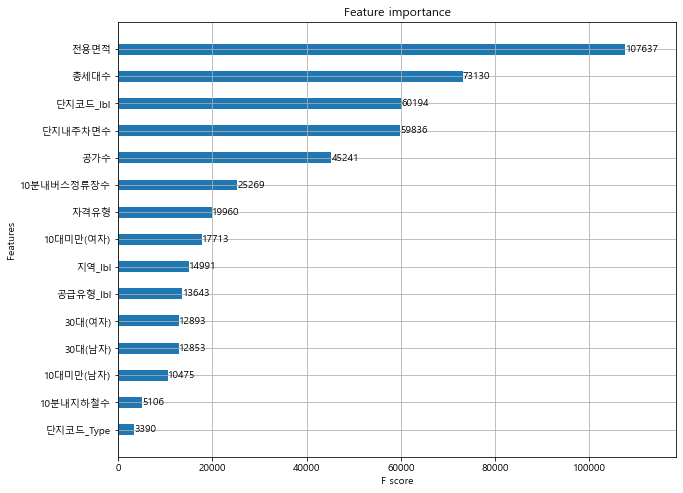

In [70]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_reg, ax=ax , max_num_features=20,height=0.4)


# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl',
        '단지코드_Type']
lable_name = 'log_등록차량수'

* 최종 혼합 모델의 MAE: 0.03205725448554007
* XGBM 모델의 MAE: 0.01486607906707985
* LGBM 모델의 MAE: 0.05449243366413449
* CATM 모델의 MAE: 0.03481886431042245 
* 실제 점수 : 94.04934


# 임대건물 구분 넣으니깐...
# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
        '단지코드_Type']
lable_name = 'log_등록차량수'

* 최종 혼합 모델의 MAE: 0.03567008604962118
* XGBM 모델의 MAE: 0.014330334463868983
* LGBM 모델의 MAE: 0.06334990017907874
* CATM 모델의 MAE: 0.038222412372448396

# log_단지내주차면수 로 변경
# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', 'log_단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl',
        '단지코드_Type']
lable_name = 'log_등록차량수'

* 최종 혼합 모델의 MAE: 0.0319842263933502
* XGBM 모델의 MAE: 0.014659369120077419
* LGBM 모델의 MAE: 0.05449243366413449
* CATM 모델의 MAE: 0.03481886431042245

# 임대건물구분_lbl, log_단지내주차면수 로 변경후
# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', 'log_단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
        '단지코드_Type']
lable_name = 'log_등록차량수'

* 최종 혼합 모델의 MAE: 0.035655662244789756
* XGBM 모델의 MAE: 0.014303995685397359
* LGBM 모델의 MAE: 0.06334990017907874
* CATM 모델의 MAE: 0.038222412372448396

* 점수 :96.1138824151	 ...더 안좋아짐..뭐가문제지?

# log_등록차량수 > 등록차량수 : 결과 좋지 않음! log 씌우는걸로!

# sel = [ 'qcut_총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
        '단지코드_Type']
lable_name = 'log_등록차량수'


* 최종 혼합 모델의 MAE: 0.03747598080959757
* XGBM 모델의 MAE: 0.013667399958141143
* LGBM 모델의 MAE: 0.07181323101083253
* CATM 모델의 MAE: 0.03769290603493843

>100.2699413689 점수가 왜 오를까..?

# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
   '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
  '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl',
    '단지코드_Type']
lable_name = 'log_등록차량수'

* 최종 혼합 모델의 MAE: 0.03205725448554007
* XGBM 모델의 MAE: 0.01486607906707985
* LGBM 모델의 MAE: 0.05449243366413449
* CATM 모델의 MAE: 0.03481886431042245
* 실제 점수 : 94.04934

* lgbm이 줄어드는 방향으로 해보자!!!!


# 현재 상태 -----------------------------------------------------
# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
   '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
  '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl',
    '단지코드_Type']
lable_name = 'log_등록차량수'
# 최종 혼합 모델의 MAE: 0.03205725448554007
* XGBM 모델의 MAE: 0.01486607906707985
* LGBM 모델의 MAE: 0.05449243366413449
* CATM 모델의 MAE: 0.03481886431042245


# learning_rate = 0.1로 변경
최종 혼합 모델의 MAE: 0.02481445731303656
XGBM 모델의 MAE: 0.014530671472410795
LGBM 모델의 MAE: 0.03474698733146343
CATM 모델의 MAE: 0.03078569357421404

# learning_rate = 0.1로 변경, estimator = 20000
최종 혼합 모델의 MAE: 0.01640719305118939
XGBM 모델의 MAE: 0.014489622514227026
LGBM 모델의 MAE: 0.014862862361406586
CATM 모델의 MAE: 0.023948652927971638

점수 108.294991863

# learning_rate = 0.08로 변경, estimator = 20000
* 최종 혼합 모델의 MAE: 0.016774409605429152
* XGBM 모델의 MAE: 0.014711936537051199
LGBM 모델의 MAE: 0.0167275993129547
CATM 모델의 MAE: 0.02418390913794919

# estimator = 20000
최종 혼합 모델의 MAE: 0.018982819747037142
XGBM 모델의 MAE: 0.014792148517779826
LGBM 모델의 MAE: 0.021189408378179616
CATM 모델의 MAE: 0.02476954304695063


# estimator = 20000
최종 혼합 모델의 MAE: 0.018982819747037142
XGBM 모델의 MAE: 0.014792148517779826
LGBM 모델의 MAE: 0.021189408378179616
CATM 모델의 MAE: 0.02476954304695063


# estimator = 20000, learning_rate = 0.01
최종 혼합 모델의 MAE: 0.03555191788903568
XGBM 모델의 MAE: 0.014243267999500688
LGBM 모델의 MAE: 0.063563839318874
CATM 모델의 MAE: 0.03670883254111923

> 점수 : 94.0657412471 learning_Rate 낮추니깐 점수 더 안좋넹~


# 최종모델 만들기

In [71]:
model_last = XGBRegressor(n_estimators=20000, learning_rate=0.01, 
                       colsample_bytree=0.5, subsample=0.8)
model_last.fit(X_train, y_train)
pred = model_last.predict(test_X)
pred[0:10]

array([6.4955773, 6.492791 , 6.48916  , 6.48916  , 6.4877534, 6.4871674,
       6.4963064, 6.4963064, 7.120976 , 7.120976 ], dtype=float32)

In [72]:
test_df['등록차량수'] = np.expm1(pred)
test_df['단지별차량수평균'] = test_df.groupby("단지코드")['등록차량수'].transform(np.mean)
test_new = test_df.drop_duplicates(['단지코드'], keep='first').reset_index()
test_new

,index,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,...,단지코드_Type,환산보증금,주차면수대비총세대수비율,거주율,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수,등록차량수,단지별차량수평균
0,2869,C1072,754,39.79,116.0,14.0,8,22830000,189840,0.0,...,3.0,23019940,1.103953,0.981432,6.527958,6.626718,4.762174,2.708050,661.206421,658.699524
1,2877,C1128,1354,39.79,368.0,9.0,8,22830000,189840,0.0,...,3.0,23019940,1.113487,0.993353,7.104144,7.211557,5.910797,2.302585,1236.657715,1259.726562
2,2886,C1332,1297,39.99,282.0,11.0,8,28598000,203050,0.0,...,3.0,28801150,1.166367,0.991519,7.014814,7.168580,5.645447,2.484907,1141.446045,1137.212891
3,2894,C1563,1974,39.73,214.0,15.0,1,30040000,206380,0.0,...,3.0,30246480,1.163915,0.992401,7.436617,7.588324,5.370638,2.772589,1812.109375,1806.718262
4,2905,C1721,663,39.46,155.0,20.0,1,26435000,180230,0.0,...,3.0,26615330,1.157068,0.969834,6.352629,6.498282,5.049856,3.044522,614.914734,613.827637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,3851,C1633,178,26.96,88.0,22.0,1,10305000,146780,0.0,...,3.0,10451880,1.059524,0.876404,5.129899,5.187386,4.488636,3.135494,109.738014,104.510559
143,3854,C2451,395,59.18,23.0,2.0,1,50000000,450000,0.0,...,3.0,50450100,0.912240,0.994937,6.073045,5.981414,3.178054,1.098612,585.293396,587.800293
144,3858,C2292,906,21.92,336.0,22.0,8,8738000,131580,0.0,...,3.0,8869680,1.000000,0.975717,6.810142,6.810142,5.820083,3.135494,993.372620,968.612488
145,3863,C2551,674,21.99,160.0,18.0,8,8768000,123360,0.0,...,3.0,8891460,1.000000,0.973294,6.514713,6.514713,5.081404,2.944439,630.959839,622.556458


In [73]:
add_dat = {'code':['C2675', 'C2335', 'C1327'],
           'num':['0', '0', '0']}
add_df = pd.DataFrame(add_dat)

In [74]:
sub_df = test_new[ ['단지코드', '단지별차량수평균']]
sub_df.columns = ['code', 'num']
sub_df = pd.concat([sub_df, add_df]).reset_index()
sub_df = sub_df.drop(['index'], axis=1)
sub_df

,code,num
0,C1072,658.7
1,C1128,1259.73
2,C1332,1137.21
3,C1563,1806.72
4,C1721,613.828
...,...,...
145,C2551,622.556
146,C1229,187.12
147,C2675,0
148,C2335,0


In [75]:
sub_df.to_csv('34th_xgboost_0730.csv', index=False)
sub_df.head()

,code,num
0,C1072,658.7
1,C1128,1259.73
2,C1332,1137.21
3,C1563,1806.72
4,C1721,613.828


# 점수 :  94.0657412471